# Sentiment Analysis of Tweets from the 2019 Indonesian Presidential Election

### Business Understanding

The sentiment analysis of tweets related to the 2019 Indonesian presidential election is a critical task for understanding public opinion and gauging the political climate. By analyzing tweets, which are rich in real-time reactions and opinions, we can uncover insights into voter sentiments, key concerns, and trending topics. These insights are invaluable for political strategists, campaign managers, social scientists, and policymakers to make informed decisions and tailor their strategies accordingly.

### Problem Statement

Given a dataset of tweets related to the 2019 Indonesian presidential election, our objective is to build a machine learning model that can accurately predict the sentiment of each tweet. The sentiment will be classified into categories such as positive, negative, and neutral. The primary metric for evaluating the model's performance will be accuracy. This metric is chosen for its straightforward interpretation and its ability to provide a clear measure of how well the model correctly classifies sentiments.

### Business Objective

The primary business objective is to develop a robust and accurate predictive model for tweet sentiment analysis during the 2019 Indonesian presidential election. This model will aid stakeholders in making data-driven decisions regarding campaign strategies, public engagement, and communication efforts. By leveraging the predictive capabilities of machine learning, we aim to:

1. Enhance the understanding of public opinion and voter sentiment.
2. Identify key issues and topics driving public discourse.
3. Enable better decision-making for political campaigns and public relations.

### Business Metrics

To ensure the success of our predictive model and its alignment with business goals, we will focus on the following business metrics:

1. **Accuracy of Sentiment Classification**: The degree to which the predicted sentiments align with actual sentiments, helping stakeholders understand public opinion accurately.
2. **Campaign Effectiveness**: The impact of improved understanding of voter sentiment on the effectiveness of campaign strategies and voter engagement.
3. **Public Perception**: The level of positive reception and trust among the public towards the campaign based on their responses and interactions on social media.

### Machine Learning Metrics

To evaluate and optimize our machine learning model, we will focus on the following metrics:

1. **Accuracy**: As our primary evaluation metric, accuracy provides a clear measure of how well the model correctly classifies the sentiments of tweets.
2. **Precision and Recall**: These metrics will help us understand the model's performance in terms of correctly identifying positive, negative, and neutral sentiments.

### Model Development

To achieve our objective, we will develop and compare two types of models:

1. **Random Forest Classifier**: As a baseline model, the Random Forest classifier will be used for its simplicity and effectiveness in handling classification tasks.
2. **Deep Learning Model (LSTM)**: Leveraging Long Short-Term Memory (LSTM) networks, we will build a more advanced model capable of capturing the sequential nature of text data, aiming to improve the prediction accuracy.

The next steps will involve data collection, preprocessing, feature extraction, model training, and evaluation. Post model evaluation, we will interpret the results, analyze feature importance, and deploy the model for real-time sentiment analysis.

---

## Penggunaan FastText

### Langkah 1: Download Model FastText

1. Unduh model FastText berbahasa Indonesia dari tautan berikut:
   [FastText Indonesian Model](https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.bin.gz)
   
   Total ukuran file yang akan diunduh adalah sekitar 4 GB. Simpan file yang diunduh dengan nama `cc.id.300.bin.gz` di direktori yang sama dengan notebook ini.

### Langkah 2: Ekstrak File

2. Ekstrak file yang telah diunduh menggunakan skrip Python berikut:

   ```python
   import gzip
   import shutil

   # Ekstrak file gzip
   with gzip.open('cc.id.300.bin.gz', 'rb') as f_in:
       with open('cc.id.300.bin', 'wb') as f_out:
           shutil.copyfileobj(f_in, f_out)
   ```

---

## Data Preparation

In [380]:
# Importing libraries for data preparation and visualization
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing warnings to ignore them
import warnings
warnings.filterwarnings("ignore")

# Importing libraries for pickle, json, and joblib files
import pickle
import json
import joblib
import copy

# Importing train_test_split for data splitting
from sklearn.model_selection import train_test_split

In [381]:
# Read Data
#Add shortcut of this shared folder first to your drive
# from google.colab import drive
# drive.mount('/content/drive')


In [382]:
# path="/content/drive/MyDrive/NLP Indonesia AI/Project - 1/tweet.csv"
path = "dataset/1_raw_dataset/tweet.csv"
df = pd.read_csv(path)

In [383]:
#df = pd.read_csv('tweet.csv')
#df

In [384]:
df = df.drop(columns=['Unnamed: 0'])

In [385]:
df

sentimen                                              tweet
0     negatif  Kata @prabowo Indonesia tidak dihargai bangsa ...
1      netral  Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2      netral  Di era Jokowi, ekonomi Indonesia semakin baik....
3     positif  Bagi Sumatera Selatan, Asian Games berdampak p...
4     negatif  Negara kita ngutang buat bngun infrastruktur y...
...       ...                                                ...
1810   netral  Negarawan sejati sll bangga dan mengedepankan ...
1811   netral  1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812   netral  Mari bangun bangsa dgn mendukung perekonomian ...
1813   netral  Bantu majukan perekonomian bangsa bersama Pak ...
1814   netral  Pak @jokowi mengubah cara pandang ekonomi. Kin...

[1815 rows x 2 columns]

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


## Data Definition

The dataset consists of 1815 entries, each representing a tweet related to the 2019 Indonesian presidential election. The dataset is structured with two columns: `sentimen` and `tweet`. Each column serves a specific purpose in the analysis of tweet sentiments during the election period.

#### Columns

1. **sentimen**
   - **Description**: This column contains the sentiment label for each tweet, indicating the overall tone or emotion expressed in the tweet.
   - **Data Type**: `object`
   - **Unique Values**: The sentiment can be one of the following three categories:
     - **positif**: Indicates that the tweet expresses a positive sentiment or favorable opinion.
     - **negatif**: Indicates that the tweet expresses a negative sentiment or unfavorable opinion.
     - **netral**: Indicates that the tweet expresses a neutral sentiment, without a strong positive or negative opinion.

2. **tweet**
   - **Description**: This column contains the text of the tweet. Each tweet is a piece of social media content written by an individual, reflecting their opinion, reaction, or commentary related to the 2019 Indonesian presidential election.
   - **Data Type**: `object`
   - **Content**: The text content varies in length and structure, as it is user-generated data from Twitter, encompassing a wide range of expressions, terminologies, and styles.

### Explanation of Columns

1. **sentimen**
   - The `sentimen` column is crucial for the sentiment analysis task. It provides the ground truth labels that the machine learning models will learn from during training. By categorizing each tweet into one of the three sentiment classes (positif, negatif, netral), this column enables the supervised learning process, allowing models to identify patterns and features associated with each sentiment category.

2. **tweet**
   - The `tweet` column serves as the primary source of textual data for analysis. This text data will be processed and transformed into numerical features that the machine learning models can work with. The content of each tweet reflects real-time public opinion and reactions during the election, making it a rich source of information for understanding voter sentiment and discourse. The diverse nature of the text data requires careful preprocessing, including tasks such as tokenization, stopword removal, and handling of special characters or hashtags, to prepare it for effective model training.

By analyzing the relationship between the `sentimen` labels and the `tweet` text, the objective is to develop a predictive model that can accurately classify the sentiment of new, unseen tweets, thus providing valuable insights into public opinion during the election period.

## Cek Duplikat Data

In [387]:
df.duplicated().sum()

0

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


## Cek Missing Value

In [389]:
df.isnull().sum()

sentimen    0
tweet       0
dtype: int64

In [390]:
df.sentimen.value_counts()

positif    612
netral     607
negatif    596
Name: sentimen, dtype: int64

## Data Splitting

In [391]:
# Separate the features (X) and the target variable (y)
X = df.drop(columns="sentimen")
y = df["sentimen"]

In [392]:
# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=123)

In [393]:
X_train

tweet
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...
...                                                 ...
877   Makasih ya Allah.. skenario MU begitu Agung. E...
1662  Sandi sebut ia tidak akan mengambil gajinya ji...
800   Demokrat minta Prabowo hargai kontribusi Presi...
865   Pancasila harga mati bravo pak presiden @jokow...
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...

[1270 rows x 1 columns]

In [394]:
y_train.value_counts()

positif    428
netral     425
negatif    417
Name: sentimen, dtype: int64

In [395]:
# Split the training data into training and validation sets
X_test, X_valid, y_test, y_valid = train_test_split(X_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=42,
                                                    stratify=y_test)

In [396]:
X_test

tweet
1300  permasalahan di bawah tentu tak hanya pure kes...
1590  Ini yg di gembar gembor si jae ekonomi meroket...
1729  Bangga dengan mental gembelnya.  Tidak ada keb...
921   Apa saja kabar menarik dalam sepekan ini? Ya k...
463   Saham sdh dijual,aset banyak berkurang & sekar...
...                                                 ...
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...
817   Antek asing, PKI, ekonomi amburadul. harga2 na...
492   Gimana mau main Mobile legend kalo paket aja n...

[272 rows x 1 columns]

In [397]:
y_test.value_counts()

positif    92
netral     91
negatif    89
Name: sentimen, dtype: int64

In [398]:
X_valid

tweet
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...
1225  Rezim @jokowi adalah mandataris world bank, me...
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...
692   ga boleh suuzon mba hehe hargai dong hasil ker...
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...
...                                                 ...
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...
202      Gaji karyawan yang terkatung-katung apa kabar?
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...

[273 rows x 1 columns]

In [399]:
y_valid.value_counts()

positif    92
netral     91
negatif    90
Name: sentimen, dtype: int64

## EDA

In [400]:
# Combine X_train, y_train into one DataFrame
train_set = pd.concat([X_train, y_train], axis=1)
train_set

tweet sentimen
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif
...                                                 ...      ...
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral
865   Pancasila harga mati bravo pak presiden @jokow...  positif
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral

[1270 rows x 2 columns]

## Cek Emoticon

In [401]:
!pip install emoji demoji ftfy


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [402]:
# Extract emoji
import emoji
import demoji
import ftfy

In [403]:
# Dictionary emotikon
emoticons_dict = {
    "😃": "senang",
    "😊": "senang",
    "😂": "tertawa",
    "😢": "menangis",
    "😡": "marah",
    "😍": "cinta",
    "😎": "keren",
    "😞": "sedih",
    "😄": "tertawa",
    "😉": "menyeringai",
    "😭": "menangis keras",
    "😜": "menggoda",
    "😒": "tidak senang",
    "😔": "tertekan",
    "😇": "baik hati",
    "😋": "lezat",
    "😱": "ketakutan",
    "😠": "marah",
    "😴": "mengantuk",
    "😅": "keringat dingin",
    "😆": "tertawa terbahak",
    "😘": "cium",
    "😗": "cium",
    "😙": "cium",
    "😚": "cium",
    "😐": "datar",
    "😑": "tidak senang",
    "😶": "tidak bicara",
    "🙄": "putar mata",
    "😏": "sinis",
    "😣": "frustrasi",
    "😥": "lega",
    "😮": "terkejut",
    "😯": "terkejut",
    "😪": "mengantuk",
    "😫": "lelah",
    "😴": "tidur",
    "😌": "lega",
    "😛": "menjulurkan lidah",
    "😜": "menjulurkan lidah",
    "😝": "menjulurkan lidah",
    "😒": "tidak senang",
    "😓": "keringat dingin",
    "😔": "sedih",
    "😕": "bingung",
    "😲": "terkejut",
    "😷": "sakit",
    "😺": "kucing senang",
    "😸": "kucing senang",
    "😹": "kucing tertawa",
    "😻": "kucing cinta",
    "😼": "kucing sinis",
    "😽": "kucing cium",
    "🙀": "kucing terkejut",
    "😿": "kucing sedih",
    "😾": "kucing marah",
    "👍": "jempol",
    "👎": "jempol turun",
    "👌": "ok",
    "✌": "damai",
    "👋": "halo",
    "👏": "tepuk tangan",
    "👐": "tangan terbuka",
    "🙏": "berdoa",
    "👊": "tinju",
    "✊": "angkat tinju",
    "🤛": "tinju kiri",
    "🤜": "tinju kanan",
    "🤞": "menyilangkan jari",
    "✋": "tangan terbuka",
    "🤚": "tangan terbuka",
    "🖐": "tangan terbuka",
    "🖖": "salute vulcan"
}

# cek emotikon dalam teks
def count_emotikon(text, emoticons_dict):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    if emojis:
      for j in emojis:
        list_of_emoji.append(j['emoji'])
    return len(emojis)

# cek emotikon dalam teks
def extract_emotikon(text):
    text = ftfy.fix_text(text)
    emojis = emoji.emoji_list(text)
    emojis_str = ""
    if emojis:
      return " ".join([i['emoji'] for i in emojis])
    else:
      return ""

list_of_emoji = []
train_set["count_emoji"] = train_set["tweet"].apply(lambda x: count_emotikon(x, emoticons_dict))

In [404]:
set(list_of_emoji)

{'☺',
 '✊',
 '✌',
 '✌️',
 '❤️',
 '⭐',
 '🇮🇩',
 '🇲🇨',
 '🏆',
 '👆',
 '👆🏻',
 '👇',
 '👈🏻',
 '👉',
 '👊',
 '👍',
 '👍🏻',
 '👍🏿',
 '👏',
 '👧',
 '💕',
 '💪',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😇',
 '😊',
 '😋',
 '😍',
 '😎',
 '😑',
 '😓',
 '😘',
 '😚',
 '😜',
 '😢',
 '😪',
 '😬',
 '😭',
 '😶',
 '🙂',
 '🙄',
 '🙈',
 '🙎',
 '🙏',
 '🙏🏽',
 '🤒',
 '🤔',
 '🤕',
 '🤗',
 '🤣',
 '🤦\u200d♀️',
 '🤦🏻\u200d♂️',
 '🤧',
 '🤪',
 '🤭',
 '🤲'}

In [405]:
train_set["extract_emoji"] = train_set["tweet"].apply(lambda x: extract_emotikon(x))

In [406]:
train_set[train_set["extract_emoji"]!=""]

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
256   16rb kl anda bl di agen langsung,,malah dapet ...   netral            1   
673   Kamu terlalu baik pak uno dan pak prabowo, kom...  positif            2   
1584  Jadi cuma bisa kerja ART dan pengin gaji besar...  negatif            1   
249   Anda sehat?pangkalan itu harga udah di tentuka...  positif            1   
...                                                 ...      ...          ...   
1704  Sandi: TPS itu singkatan Tusuk Prabowo Sandi M...  negatif            1   
1049  Janji manis para pilpres  â¤ï¸  PKS menang :...  positif            2   
0     Kata @prabowo Indonesia tidak dihargai bangsa ...  negatif            2   
965   Pak @prabowo dan Bang @sandiuno niat gak ambil...  positif            2   
1604  Terlampau optimis,jadi sombong takabur..,makan...  negatif            1   

     extract_emoji  
499              😭  
256              🙏  
673          👆🏻 👆🏻  
1584             😪  
249              😂  
...            ...  
1704             😶  
1049          ❤️ 😂  
0              👇 😜  
965      🤦‍♀️ 🤦‍♀️  
1604             🤔  

[136 rows x 4 columns]

In [407]:
len(set(list_of_emoji))

61

In [408]:
list_of_emoji

['😭',
 '🙏',
 '👆🏻',
 '👆🏻',
 '😪',
 '😂',
 '😂',
 '😁',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😍',
 '🇲🇨',
 '👆',
 '👇',
 '😓',
 '😄',
 '👆🏻',
 '👈🏻',
 '😀',
 '😀',
 '😂',
 '🙏',
 '😚',
 '🙏',
 '😅',
 '😂',
 '😂',
 '😂',
 '👍',
 '👍',
 '👍',
 '😊',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤪',
 '🤪',
 '🤕',
 '🤒',
 '🤧',
 '😪',
 '👍',
 '🤣',
 '🙏',
 '🙏',
 '🙏',
 '👉',
 '👊',
 '👏',
 '👏',
 '😢',
 '👍🏻',
 '😎',
 '😅',
 '🤭',
 '🤭',
 '😍',
 '😍',
 '🤔',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😅',
 '😭',
 '😂',
 '😂',
 '😂',
 '🙏',
 '😂',
 '😂',
 '😀',
 '😀',
 '😀',
 '😀',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '😂',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '🤣',
 '👉',
 '✊',
 '👉',
 '🤣',
 '😆',
 '😂',
 '😂',
 '😂',
 '👍',
 '😎',
 '😆',
 '🤣',
 '👍🏻',
 '👍🏻',
 '😃',
 '👉',
 '😂',
 '👉',
 '😊',
 '☺',
 '💪',
 '🇮🇩',
 '😂',
 '😁',
 '😇',
 '😇',
 '💕',
 '💕',
 '😍',
 '😍',
 '👆',
 '👆',
 '😭',
 '🙏',
 '🤗',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '😜',
 '🙏',
 '🤔',
 '🤔',
 '✌',
 '✌',
 '👍',
 '👍',
 '👍',
 '⭐',
 '⭐',
 '⭐',
 '😁',
 '👍🏿',
 '🙂',
 '🙏',
 '🙏',
 '🙏',
 '😂',
 '😂',
 '😂',
 '😋',
 '😂',


In [409]:
ftfy.fix_text("16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomiðŸ™\x8f")

'16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomi🙏'

In [410]:
train_set.loc[256,"tweet"]

'16rb kl anda bl di agen langsung,,malah dapet 15rb...  Kl gas 18rb itu dr agen ,ke konsumen .....artinya orang jualan ya pasti cr untung,,itu namane perputaran roda ekonomiðŸ™\x8f'

In [411]:
pd.DataFrame({"emoji":list_of_emoji}).to_csv("list_emoji.csv")

## Cek URL

In [412]:
def find_longest_word(tweet):
    words = tweet.split()
    longest_word = max(words, key=len)
    return longest_word

train_set['longest_word'] = train_set['tweet'].apply(find_longest_word)

train_set

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  
499              😭                      https://youtu.be/qlB7vg4I-ToÂ  
1674                                                    ekosistemnya.  
1753                                             #GueKapokPilihJokowi  
1353                                                        derivatif  
1164                https://twitter.com/jokowi/status/111726879691...  
...            ...                                                ...  
877                                        pic.twitter.com/yPk54WbPFh  
1662                                       pic.twitter.com/e97rQlRlRi  
800                                            http://bit.ly/2KBo254Â  
865                                        pic.twitter.com/knQYLidaeC  
1254                https://twitter.com/detikcom/status/1117096753...  

[1270 rows x 5 columns]

In [413]:
# Pola regex untuk URL
url_pattern = r'https?://\S+|pic.twitter.com/\S+'

# menampilkan baris yang memiliki url
rows_with_url = train_set[train_set['tweet'].str.contains(url_pattern, regex=True)]

# ekstraksi url dari tweet
def extract_url(teks):
    urls = re.findall(url_pattern, teks)
    return ', '.join(urls) if urls else None

# add kolom url dalam tabel
rows_with_url['urls'] = rows_with_url['tweet'].apply(extract_url)

# sanity check
rows_with_url

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
946   Pertumbuhan ekonomi harus diimbangi dengan pem...  positif            0   
1494  Ardy merespon pernyataan yang dilontarkan capr...   netral            0   
947   Prabowo-Sandi Komitmen Jika Terpilih Sebagai K...   netral            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1164                https://twitter.com/jokowi/status/111726879691...   
946                                        pic.twitter.com/SGv0Izr459   
1494                                          https://bit.ly/2P9hitDÂ   
947                 https://www.gardaindonews.com/prabowo-sandi-ko...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                                   urls  
499                       https://youtu.be/qlB7vg4I-ToÂ  
1164  https://twitter.com/jokowi/status/111726879691...  
946                          pic.twitter.com/SGv0Izr459  
1494                            https://bit.ly/2P9hitDÂ  
947   https://www.gardaindonews.com/prabowo-sandi-ko...  
...                                                 ...  
877                          pic.twitter.com/yPk54WbPFh  
1662                         pic.twitter.com/e97rQlRlRi  
800                              http://bit.ly/2KBo254Â  
865                          pic.twitter.com/knQYLidaeC  
1254  https://twitter.com/detikcom/status/1117096753...  

[404 rows x 6 columns]

## Cek Username

In [414]:
# Pola regex untuk username
username_pattern = r'@\w+'

# cek teks yang sesuai pattern regex username
rows_with_username = train_set[train_set['tweet'].str.contains(username_pattern, regex=True)]

# ekstrak username dari teks
def extract_username(teks):
    usernames = re.findall(username_pattern, teks)
    return ', '.join(usernames) if usernames else None

# add kolom 'usernames' ke DataFrame
rows_with_username['usernames'] = rows_with_username['tweet'].apply(extract_username)

In [415]:
rows_with_username

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
986   Anak muda sekarang banyak yang sudah berkecimp...  positif            0   
911   Pak Wowo dalam debat mengatakan, orientasi eko...   netral            0   
1701  Paslon 01 Bapak @Jokowi dan Abah @KHMarufAmin_...   netral            0   
...                                                 ...      ...          ...   
965   Pak @prabowo dan Bang @sandiuno niat gak ambil...  positif            2   
105   @KHMarufAmin_ Untuk Indonesia Maju #PilihOrang...   netral            0   
525   Memang @sandiuno itu tdk memahami apapun tenta...  negatif            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1164                https://twitter.com/jokowi/status/111726879691...   
986                                           #JokowiMenangTotalDebat   
911                                           https://bit.ly/2PbAB5SÂ   
1701                                       pic.twitter.com/7piSAMDGJC   
...            ...                                                ...   
965      🤦‍♀️ 🤦‍♀️                         ðŸ¤¦â€â™€ï¸ðŸ¤¦â€â™€ï¸   
105                                               #PilihJelasIslamnya   
525                                                   negara.Termasuk   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                              usernames  
499   @jokowi, @prabowo, @Chilli_Pari, @sandiuno, @k...  
1164                                            @Jokowi  
986                                             @jokowi  
911                                             @jokowi  
1701                             @Jokowi, @KHMarufAmin_  
...                                                 ...  
965                                 @prabowo, @sandiuno  
105                                       @KHMarufAmin_  
525                                           @sandiuno  
865                                             @jokowi  
1254                                @sandiuno, @prabowo  

[316 rows x 6 columns]

## Cek Punctuation

In [416]:
# Pola regex untuk punctuation
punctuation_pattern = r'[^\w\s@]'

# cek tweet apakah ada punctuation
rows_with_punctuation = train_set[train_set['tweet'].str.contains(punctuation_pattern, regex=True)]

# ekstraksi punctuation
def extract_punctuation(teks):
    punctuations = re.findall(punctuation_pattern, teks)
    return ', '.join(punctuations) if punctuations else None

# add kolom 'punctuations' ke DataFrame
rows_with_punctuation['punctuations'] = rows_with_punctuation['tweet'].apply(extract_punctuation)

In [417]:
rows_with_punctuation

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1753                                             #GueKapokPilihJokowi   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                           punctuations  
499               ,, ., :, /, /, ., /, -, ˜, ­, :, (, (  
1674                       ., ,, ., ,, ,, ,, ., ,, (, )  
1753                                            &, ., #  
1353                                      ,, ,, ,, ., .  
1164  ,, ,, ,, ,, ,, ., ., ., €, :, /, /, ., /, /, /...  
...                                                 ...  
877               ., ., ., &, ., ., ,, ,, ., #, ., ., /  
1662                                ., ., #, #, ., ., /  
800                                       :, /, /, ., /  
865                                             ., ., /  
1254                       ., :, /, /, ., /, /, /, €, ¦  

[1234 rows x 6 columns]

## Cek Hashtag

In [418]:
# Pola regex untuk hashtag
hashtag_pattern = r'#\w+'

# cek hashtag
rows_with_hashtag = train_set[train_set['tweet'].str.contains(hashtag_pattern, regex=True)]

# ekstrak hashtag dari teks
def extract_hashtag(teks):
    hashtags = re.findall(hashtag_pattern, teks)
    return ', '.join(hashtags) if hashtags else None

rows_with_hashtag['hashtags'] = rows_with_hashtag['tweet'].apply(extract_hashtag)

rows_with_hashtag

tweet sentimen  count_emoji  \
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
986   Anak muda sekarang banyak yang sudah berkecimp...  positif            0   
1494  Ardy merespon pernyataan yang dilontarkan capr...   netral            0   
911   Pak Wowo dalam debat mengatakan, orientasi eko...   netral            0   
1701  Paslon 01 Bapak @Jokowi dan Abah @KHMarufAmin_...   netral            0   
...                                                 ...      ...          ...   
965   Pak @prabowo dan Bang @sandiuno niat gak ambil...  positif            2   
105   @KHMarufAmin_ Untuk Indonesia Maju #PilihOrang...   netral            0   
133   KPU di bawah pemerintah rezim yg berkuasa skar...  negatif            0   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   

     extract_emoji                                       longest_word  \
1753                                             #GueKapokPilihJokowi   
986                                           #JokowiMenangTotalDebat   
1494                                          https://bit.ly/2P9hitDÂ   
911                                           https://bit.ly/2PbAB5SÂ   
1701                                       pic.twitter.com/7piSAMDGJC   
...            ...                                                ...   
965      🤦‍♀️ 🤦‍♀️                         ðŸ¤¦â€â™€ï¸ðŸ¤¦â€â™€ï¸   
105                                               #PilihJelasIslamnya   
133                 https://www.facebook.com/1742490484/posts/1020...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   

                                               hashtags  
1753                               #GueKapokPilihJokowi  
986                             #JokowiMenangTotalDebat  
1494                                #PrabowoSalahkanSBY  
911                                 #PrabowoSalahkanSBY  
1701                            #JokowiMenangTotalDebat  
...                                                 ...  
965                                        #YourTurnBro  
105   #PilihOrangBaik, #PilihJelasIslamnya, #PilihBa...  
133                                  #2019GantiPresiden  
877                             #17April2019PeoplePower  
1662                         #DebatCapres, #Pilpres2019  

[382 rows x 6 columns]

## Cek Alfanumerik

In [419]:
# Pola regex untuk non-alfanumerik
non_alnum_pattern = r'\W+'

# cek non alfanumerik
rows_with_non_alnum = train_set[train_set['tweet'].str.contains(non_alnum_pattern, regex=True)]

# ekstraksi non alfanumeric
def extract_non_alnum(teks):
    non_alnums = re.findall(non_alnum_pattern, teks)
    return ', '.join(non_alnums) if non_alnums else None

# add kolom 'non_alphanumeric' ke DataFrame
rows_with_non_alnum['non_alphanumeric'] = rows_with_non_alnum['tweet'].apply(extract_non_alnum)

In [420]:
rows_with_non_alnum

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1753                                             #GueKapokPilihJokowi   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                       non_alphanumeric  
499   , ,  ,  , .  @,  @,  @,  @,  @,  @,   , ://, ....  
1674   ,  ,  ,  , . ,  ,  ,  ,  ,  ,  ,  ,  , , ,  ,...  
1753                     ,  ,  ,  ,  ,  ,  & ,  , .,  #  
1353   ,  ,  ,  ,  ,  ,  ,  ,  , , ,  ,  ,  ,  , , ,...  
1164   ,   @,  , , , , ,  ,  ,  ,  ,  ,  ,  ,  , ,, ...  
...                                                 ...  
877    ,  , .. ,  ,  ,  , . ,  ,  ,  ,  ,  ,  ,  ,  ...  
1662   ,  ,  ,  ,  ,  ,  ,  ,  ,  ,  , . ,  ,  ,  , ...  
800                ,  ,  ,  ,  ,  ,  ,   , ://, ., /,    
865                       ,  ,  ,  ,  ,  @,   , ., ., /  
1254   @,  ,  ,  @,  ,  ,  ,  ,  , .  , ://, ., /, /...  

[1270 rows x 6 columns]

## Cek Special Characters

In [421]:
# Pola regex untuk special characters
special_char_pattern = r'[^a-zA-Z0-9\s]'

# cek special characters
rows_with_special_char = train_set[train_set['tweet'].str.contains(special_char_pattern, regex=True)]

# ekstrak special character
def extract_special_char(teks):
    special_chars = re.findall(special_char_pattern, teks)
    return ', '.join(special_chars) if special_chars else None

# add kolom 'special_characters' ke DataFrame
rows_with_special_char['special_characters'] = rows_with_special_char['tweet'].apply(extract_special_char)

# sanity check
rows_with_special_char

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1753                                             #GueKapokPilihJokowi   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                     special_characters  
499   ,, ., @, @, @, _, @, @, @, :, /, /, ., /, -, Â...  
1674                       ., ,, ., ,, ,, ,, ., ,, (, )  
1753                                            &, ., #  
1353                                      ,, ,, ,, ., .  
1164  @, ,, ,, ,, ,, ,, ., ., ., â, €, œ, :, /, /, ....  
...                                                 ...  
877               ., ., ., &, ., ., ,, ,, ., #, ., ., /  
1662                                ., ., #, #, ., ., /  
800                                    :, /, /, ., /, Â  
865                                          @, ., ., /  
1254           @, @, ., :, /, /, ., /, /, /, Â, â, €, ¦  

[1235 rows x 6 columns]

# Cek Numerik

In [422]:
# Pola regex untuk numerik
numeric_pattern = r'\d+'

# cek numerik
rows_with_numeric = train_set[train_set['tweet'].str.contains(numeric_pattern, regex=True)]

# ekstraksi numerik
def extract_numeric(teks):
    numerics = re.findall(numeric_pattern, teks)
    return ', '.join(numerics) if numerics else None

# add kolom 'numerical' ke DataFrame
rows_with_numeric['numerical'] = rows_with_numeric['tweet'].apply(extract_numeric)

# sanity check
rows_with_numeric

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
256   16rb kl anda bl di agen langsung,,malah dapet ...   netral            1   
...                                                 ...      ...          ...   
133   KPU di bawah pemerintah rezim yg berkuasa skar...  negatif            0   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
256              🙏                                    langsung,,malah   
...            ...                                                ...   
133                 https://www.facebook.com/1742490484/posts/1020...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
1254                https://twitter.com/detikcom/status/1117096753...   

                                numerical  
499                                  7, 4  
1674                                    1  
1353                                    2  
1164        1945, 1117268796916396034, 19  
256                            16, 15, 18  
...                                   ...  
133   2019, 1742490484, 10205609169225534  
877                          17, 2019, 54  
1662                             2019, 97  
800                                2, 254  
1254                  1117096753759686657  

[756 rows x 6 columns]

## Cek Double Space

In [423]:
# Pola regex untuk spasi ganda
double_space_pattern = r'\s\s+'

# cek double space
rows_with_double_space = train_set[train_set['tweet'].str.contains(double_space_pattern, regex=True)]

# ekstraksi double space
def extract_double_space(teks):
    double_spaces = re.findall(double_space_pattern, teks)
    return ', '.join(double_spaces) if double_spaces else None

# add kolom 'double_spaces' ke DataFrame
rows_with_double_space['double_spaces'] = rows_with_double_space['tweet'].apply(extract_double_space)

# sanity check
rows_with_double_space

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
256   16rb kl anda bl di agen langsung,,malah dapet ...   netral            1   
946   Pertumbuhan ekonomi harus diimbangi dengan pem...  positif            0   
...                                                 ...      ...          ...   
133   KPU di bawah pemerintah rezim yg berkuasa skar...  negatif            0   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
256              🙏                                    langsung,,malah   
946                                        pic.twitter.com/SGv0Izr459   
...            ...                                                ...   
133                 https://www.facebook.com/1742490484/posts/1020...   
877                                        pic.twitter.com/yPk54WbPFh   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

         double_spaces  
499     ,   ,     ,     
1353                    
1164              ,     
256                     
946                     
...                ...  
133          ,    ,     
877                     
800                     
865                     
1254                    

[581 rows x 6 columns]

## Cek Stopwords

In [424]:
import nltk
from collections import Counter
from nltk.corpus import stopwords

# download stopword
nltk.download('stopwords')

# Stopwords indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

# ekstrak stopwords
def extract_stopwords(teks):
    words = teks.split()
    stopwords_in_text = [word for word in words if word.lower() in stopwords_indonesia]
    return ', '.join(stopwords_in_text) if stopwords_in_text else None

# cek teks dan tambahkan kolom stopwords
train_set['stopwords'] = train_set['tweet'].apply(extract_stopwords)

# cek mengandung stopwords yang tidak null
rows_with_stopwords = train_set[train_set['stopwords'].notnull()]

# sanity check
rows_with_stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1753                                             #GueKapokPilihJokowi   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                              stopwords  
499                               ini, dan, sering, dan  
1674  Anda, kecil, pak, mau, bukan, soal, tapi, bany...  
1753                                              untuk  
1353           ini, yang, itu, bukan, bisa, cuma, kapan  
1164  Pak, dan, harus, dan, kita, Sudah, dan, tidak,...  
...                                                 ...  
877                     begitu, para, kini, tepat, beri  
1662  sebut, ia, tidak, akan, jika, ia, sebagai, Sed...  
800                                               minta  
865                                                 pak  
1254                            Pak, dan, pak, ke, saya  

[1244 rows x 6 columns]

In [425]:
# count kemunculan stopwords
all_stopwords = ' '.join(rows_with_stopwords['stopwords'].dropna()).split(', ')
stopwords_counter = Counter(all_stopwords)

# cek stopwords terbanyak muncul dalam tweet
most_common_stopwords = stopwords_counter.most_common()
print("\nStopwords terbanyak dalam tweet train_set:")
for word, count in most_common_stopwords:
    print(f"{word}: {count}")


Stopwords terbanyak dalam tweet train_set:
dan: 362
di: 260
yang: 153
itu: 149
akan: 148
tidak: 138
ini: 135
pak: 118
dari: 98
bisa: 92
untuk: 92
jadi: 82
ke: 80
ada: 79
saya: 76
kita: 72
mau: 71
bukan: 69
tapi: 66
dengan: 65
Pak: 63
sudah: 59
lebih: 57
sama: 55
juga: 53
dalam: 49
mereka: 45
hanya: 43
dia: 43
seperti: 41
kalau: 40
saat: 39
apa: 38
semua: 38
adalah: 38
karena: 38
kami: 38
banyak: 37
sangat: 37
anda: 36
cuma: 34
tak: 34
menjadi: 34
masih: 33
pada: 33
kan: 32
jika: 32
tahun: 29
oleh: 29
soal: 28
harus: 28
lagi: 28
bahwa: 28
sebagai: 27
satu: 27
buat: 26
pernah: 25
sebelum: 24
para: 24
atau: 24
Mau: 24
pasti: 24
ingin: 24
jelas: 23
punya: 23
pun: 23
Dan: 23
sekarang: 22
malah: 22
selama: 22
baru: 21
baik: 21
telah: 21
memang: 21
bapak: 21
saja: 21
masalah: 20
mampu: 20
hal: 19
Akan: 19
Dia: 19
masa: 19
terus: 18
besar: 18
bagi: 18
Tapi: 18
kepada: 18
dulu: 17
kalian: 17
sampai: 17
tanpa: 17
memberikan: 17
perlu: 16
Jika: 16
secara: 15
Tak: 15
belum: 15
mana: 15
kok: 15
me

## Cek Slang

In [426]:
# read dictionary bahasa_gaul_indonesia.txt
slang_set = set()
with open('bahasa_gaul_indonesia.txt', 'r') as file:
    for line in file:
        slang = line.strip().split('\t')[0].lower()
        slang_set.add(slang)

In [427]:
# jadikan lowercase
train_set['tweet_lower'] = train_set['tweet'].str.lower()

# ekstrak slang teks
def extract_slang(teks):
    words = teks.split()
    slang_in_text = [word for word in words if word in slang_set]
    return ', '.join(slang_in_text) if slang_in_text else None

# cek slang pada tweet dan ketika ada slang maka akan ditambahkan kolom slang_words
train_set['slang_words'] = train_set['tweet_lower'].apply(extract_slang)

# cek slangwords tanpa null
rows_with_slang = train_set[train_set['slang_words'].notnull()]

# sanity check
rows_with_slang

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
256   16rb kl anda bl di agen langsung,,malah dapet ...   netral            1   
1494  Ardy merespon pernyataan yang dilontarkan capr...   netral            0   
...                                                 ...      ...          ...   
1714  Pak prabowo sama pak sandiaga jangan cuma gaji...  negatif            0   
133   KPU di bawah pemerintah rezim yg berkuasa skar...  negatif            0   
525   Memang @sandiuno itu tdk memahami apapun tenta...  negatif            0   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1353                                                        derivatif   
256              🙏                                    langsung,,malah   
1494                                          https://bit.ly/2P9hitDÂ   
...            ...                                                ...   
1714                                                     pemerintahan   
133                 https://www.facebook.com/1742490484/posts/1020...   
525                                                   negara.Termasuk   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   

                                              stopwords  \
499                               ini, dan, sering, dan   
1674  Anda, kecil, pak, mau, bukan, soal, tapi, bany...   
1353           ini, yang, itu, bukan, bisa, cuma, kapan   
256                                anda, di, itu, pasti   
1494  yang, saat, soal, yang, merupakan, semua, term...   
...                                                 ...   
1714  Pak, sama, pak, jangan, cuma, juga, sama, jauh...   
133                                   di, bawah, Kenapa   
525                       Memang, itu, tentang, memberi   
877                     begitu, para, kini, tepat, beri   
1662  sebut, ia, tidak, akan, jika, ia, sebagai, Sed...   

                                            tweet_lower  \
499   pak, liat ini pak.  @jokowi @prabowo @chilli_p...   
1674  scope berpikir anda kecil sekali. yg pak jokow...   
1353  mbak ini ekonomi yang ditopik jokowi pas itu e...   
256   16rb kl anda bl di agen langsung,,malah dapet ...   
1494  ardy merespon pernyataan yang dilontarkan capr...   
...                                                 ...   
1714  pak prabowo sama pak sandiaga jangan cuma gaji...   
133   kpu di bawah pemerintah rezim yg berkuasa skar...   
525   memang @sandiuno itu tdk memahami apapun tenta...   
877   makasih ya allah.. skenario mu begitu agung. e...   
1662  sandi sebut ia tidak akan mengambil gajinya ji...   

                                        slang_words  
499   liat, yg, bikin, bikin, nangis, banget, cabut  
1674                anda, yg, mau, yg, mau, tau, dr  
1353              pas, itu, yg, udah, udh, ato, klw  
256        kl, anda, bl, dapet, kl, itu, dr, ya, cr  
1494                                            tdk  
...                                             ...  
1714                                  dimana2, kalo  
133                                      yg, yg, yg  
525                          itu, tdk, org, yg, kpd  
877                       makasih, ya, utk, yg, dlm  
1662                                         ia, ia  

[926 rows x 8 columns]

## Class Distribution

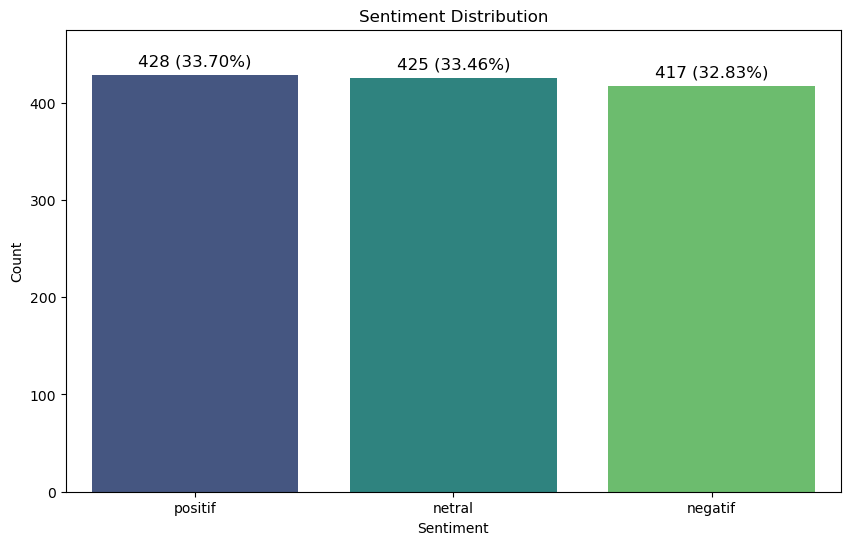

In [428]:
# Calculate value counts and percentages
value_counts = train_set['sentimen'].value_counts()
percentages = train_set['sentimen'].value_counts(normalize=True) * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=plot_data.index, y='Count', data=plot_data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.ylim(0, 475)

# Add counts and percentages on top of bars
for i in range(len(plot_data)):
    count = plot_data['Count'][i]
    percentage = plot_data['Percentage'][i]
    plt.text(i, count + 10, f'{count} ({percentage:.2f}%)', ha='center', fontsize=12)

plt.show()

## Mencari baris dengan jumlah kata pada tweet yang paling panjang

In [429]:
def count_words(tweet):
    return len(tweet.split())

In [430]:
train_set['word_count'] = train_set['tweet'].apply(count_words)
train_set

tweet sentimen  count_emoji  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   netral            1   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  negatif            0   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   netral            0   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  positif            0   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  positif            0   
...                                                 ...      ...          ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...  positif            0   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   netral            0   
800   Demokrat minta Prabowo hargai kontribusi Presi...   netral            0   
865   Pancasila harga mati bravo pak presiden @jokow...  positif            0   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   netral            0   

     extract_emoji                                       longest_word  \
499              😭                      https://youtu.be/qlB7vg4I-ToÂ   
1674                                                    ekosistemnya.   
1753                                             #GueKapokPilihJokowi   
1353                                                        derivatif   
1164                https://twitter.com/jokowi/status/111726879691...   
...            ...                                                ...   
877                                        pic.twitter.com/yPk54WbPFh   
1662                                       pic.twitter.com/e97rQlRlRi   
800                                            http://bit.ly/2KBo254Â   
865                                        pic.twitter.com/knQYLidaeC   
1254                https://twitter.com/detikcom/status/1117096753...   

                                              stopwords  \
499                               ini, dan, sering, dan   
1674  Anda, kecil, pak, mau, bukan, soal, tapi, bany...   
1753                                              untuk   
1353           ini, yang, itu, bukan, bisa, cuma, kapan   
1164  Pak, dan, harus, dan, kita, Sudah, dan, tidak,...   
...                                                 ...   
877                     begitu, para, kini, tepat, beri   
1662  sebut, ia, tidak, akan, jika, ia, sebagai, Sed...   
800                                               minta   
865                                                 pak   
1254                            Pak, dan, pak, ke, saya   

                                            tweet_lower  \
499   pak, liat ini pak.  @jokowi @prabowo @chilli_p...   
1674  scope berpikir anda kecil sekali. yg pak jokow...   
1753  prabowo sandi menyerahkan gajinya untuk anak y...   
1353  mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  pak dhe  @jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   makasih ya allah.. skenario mu begitu agung. e...   
1662  sandi sebut ia tidak akan mengambil gajinya ji...   
800   demokrat minta prabowo hargai kontribusi presi...   
865   pancasila harga mati bravo pak presiden @jokow...   
1254  pak @sandiuno dan pak @prabowo gajinya kirim k...   

                                        slang_words  word_count  
499   liat, yg, bikin, bikin, nangis, banget, cabut          34  
1674                anda, yg, mau, yg, mau, tau, dr          42  
1753                                           None          11  
1353              pas, itu, yg, udah, udh, ato, klw          37  
1164                                           None          34  
...                                             ...         ...  
877                       makasih, ya, utk, yg, dlm          40  
1662                                         ia, ia          22  
800                                            None           9  
865                                            None           8  
1254                                           None     

In [431]:
train_set_sorted = train_set.sort_values(by='word_count', ascending=False)
train_set_sorted

tweet sentimen  count_emoji  \
888   Argumen Jokowi sangat make sense drpd yg satu ...  positif            0   
890   Dr ini aja kita" dah bisa ambil kesimpulan klo...  negatif            0   
1072  Bahas ekonomi sekelas 02 dan wakilnya .Gak fah...  negatif            0   
648   Boss.. ga usah ngomong soal yg ente ga kuasain...  negatif            0   
538   Lah kalian yg mulai kata nya klo gak milih jok...  negatif            0   
...                                                 ...      ...          ...   
1405           Ahaha dikuliahin pakde ekonomi makro....  positif            0   
115   madura prabowo harga mati ðŸ‘†ðŸ»ðŸ‘ˆðŸ»ðŸ˜€...  positif            4   
1639         faktanya??? pertumbuhan ekonomi gak naik2!  negatif            0   
802           BUMN benteng ekonomi negara...   #Prabowo   netral            0   
116                         prabowo harga mati. . titik  positif            0   

     extract_emoji              longest_word  \
888                              perusahaan.   
890                             @Fahrihamzah   
1072                               pandangan   
648                            pengangguran,   
538                              pembangunan   
...            ...                       ...   
1405                              dikuliahin   
115      👆🏻 👈🏻 😀 😀  ðŸ‘†ðŸ»ðŸ‘ˆðŸ»ðŸ˜€ðŸ˜€   
1639                             faktanya???   
802                                negara...   
116                                  prabowo   

                                              stopwords  \
888   sangat, satu, itu, setiap, kata, di, ini, di, ...   
890             ini, bisa, itu, Cuma, dong, ingin, sana   
1072  dan, antara, memang, jelas, jelas, Padahal, un...   
648   usah, soal, Mau, soal, apalagi, siapa, buat, b...   
538   Lah, kalian, mulai, kata, naik, Kalian, dari, ...   
...                                                 ...   
1405                                               None   
115                                                None   
1639                                               None   
802                                                None   
116                                                None   

                                            tweet_lower  \
888   argumen jokowi sangat make sense drpd yg satu ...   
890   dr ini aja kita" dah bisa ambil kesimpulan klo...   
1072  bahas ekonomi sekelas 02 dan wakilnya .gak fah...   
648   boss.. ga usah ngomong soal yg ente ga kuasain...   
538   lah kalian yg mulai kata nya klo gak milih jok...   
...                                                 ...   
1405           ahaha dikuliahin pakde ekonomi makro....   
115   madura prabowo harga mati ðÿ‘†ðÿ»ðÿ‘ˆðÿ»ðÿ˜€...   
1639         faktanya??? pertumbuhan ekonomi gak naik2!   
802           bumn benteng ekonomi negara...   #prabowo   
116                         prabowo harga mati. . titik   

                                            slang_words  word_count  
888   make, drpd, yg, itu, ketauan, yg, itu, tdk, sk...          52  
890   dr, aja, dah, klo, jg, y, itu, y, jg, hrus, do...          52  
1072    yg, sdh, sdh, kalo, dapet, aja, udah, nipu, tdk          50  
648   ga, usah, ngomong, yg, ente, ga, ente, mau, aj...          49  
538   yg, klo, gak, gak, pas, lwt, jga, yg, emang, d...          49  
...                                                 ...         ...  
1405                                              ahaha           5  
115                                                None           5  
1639                                                gak           5  
802                                                None           5  
116                                                None           5  

[1270 rows x 9 columns]

In [432]:
train_set_sorted.loc[888, 'tweet']

'Argumen Jokowi sangat make sense drpd yg satu itu setiap debat kata si A di daerah ini si B di daerah itu, ini sangat ketauan yg satu itu tdk paham ekonomi negara. Dan skrg minta rakyat milih dia yg hanya paham ekonomi sebatas perusahaan. Jgn membodoi warga dgn kata2 ibu ini itu.'

In [433]:
train_set_sorted.loc[890, 'tweet']

'Dr ini aja kita" dah bisa ambil kesimpulan klo ulama" jg ustad" y itu berbayar dn mulut y disogok smua. Cuma @prabowo jg hrus dong byr gaji" karyawan y,jgn hny krn ingin jd RI 1 suap orang sana sini, smntara bkas karyawan y kelaparan dgn anak istri y. Tul g @Fahrihamzah @fadlizon'

In [434]:
train_set_sorted.loc[115, 'tweet']

'madura prabowo harga mati ðŸ‘†ðŸ\x8f»ðŸ‘ˆðŸ\x8f»ðŸ˜€ðŸ˜€'

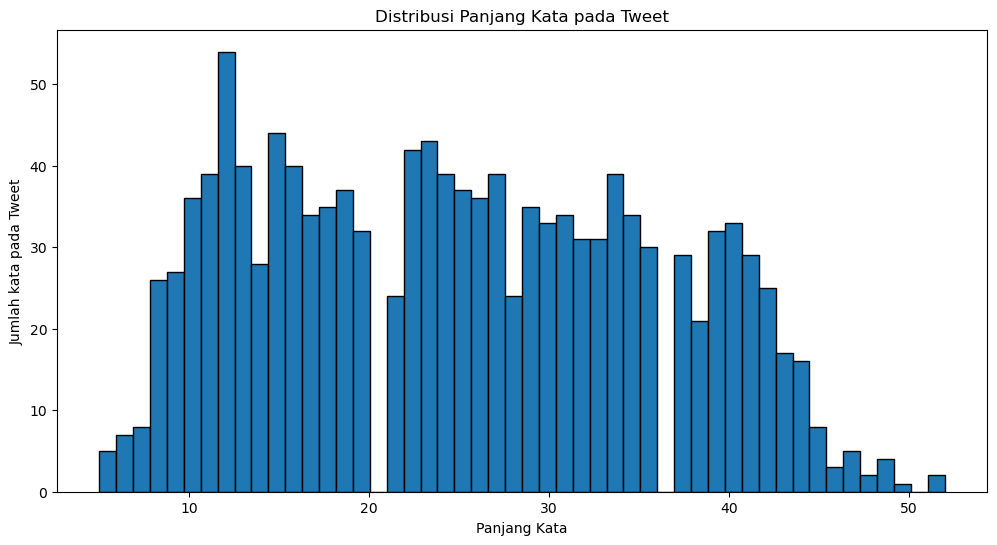

In [435]:
plt.figure(figsize=(12, 6))
plt.hist(train_set_sorted['word_count'], bins=50, edgecolor='black')
plt.title('Distribusi Panjang Kata pada Tweet')
plt.xlabel('Panjang Kata')
plt.ylabel('Jumlah kata pada Tweet')
plt.show()

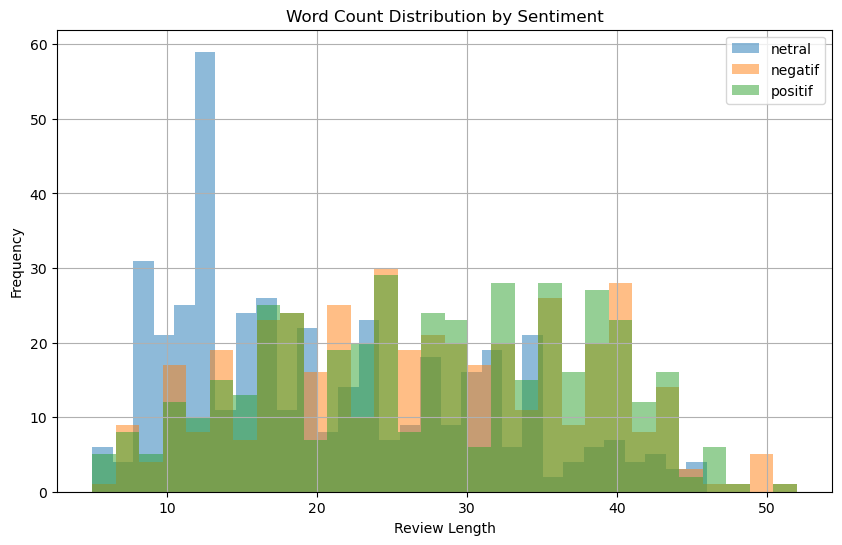

In [436]:
# Compare the review lengths across different sentiment categories
plt.figure(figsize=(10, 6))
for sentiment_category in train_set['sentimen'].unique():
    subset = train_set[train_set['sentimen'] == sentiment_category]
    plt.hist(subset['word_count'], bins=30, alpha=0.5, label=sentiment_category)

plt.title('Word Count Distribution by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

## Wordcloud

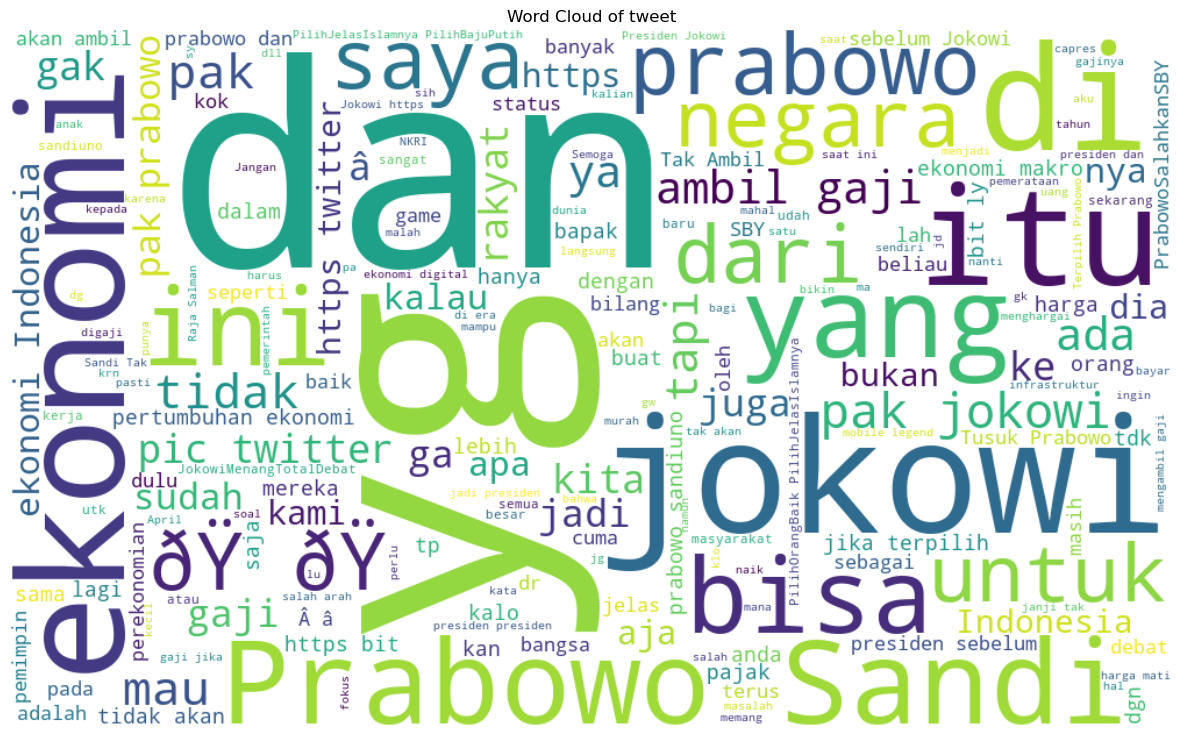

In [437]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the reviews into a single string
all_reviews = ' '.join(train_set['tweet'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate(all_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of tweet')
plt.axis('off')
plt.show()

In [438]:
import pandas as pd
from collections import Counter

# Combine all the reviews into a single string
all_reviews = ' '.join(train_set['tweet'].dropna())

# Split the words from the string and count their occurrences
word_counts = Counter(all_reviews.split())

# Get the top 20 most common words
top_20_words = word_counts.most_common(20)

# Display the top 20 most common words
print("Top 20 most common words:")
for word, count in top_20_words:
    print(f"{word}: {count}")

Top 20 most common words:
dan: 485
ekonomi: 466
yg: 442
di: 350
Jokowi: 231
Prabowo: 227
â€¦: 217
itu: 207
yang: 194
tidak: 172
akan: 172
pak: 168
gaji: 164
ini: 161
bisa: 148
harga: 146
prabowo: 135
Indonesia: 133
@jokowi: 131
untuk: 126


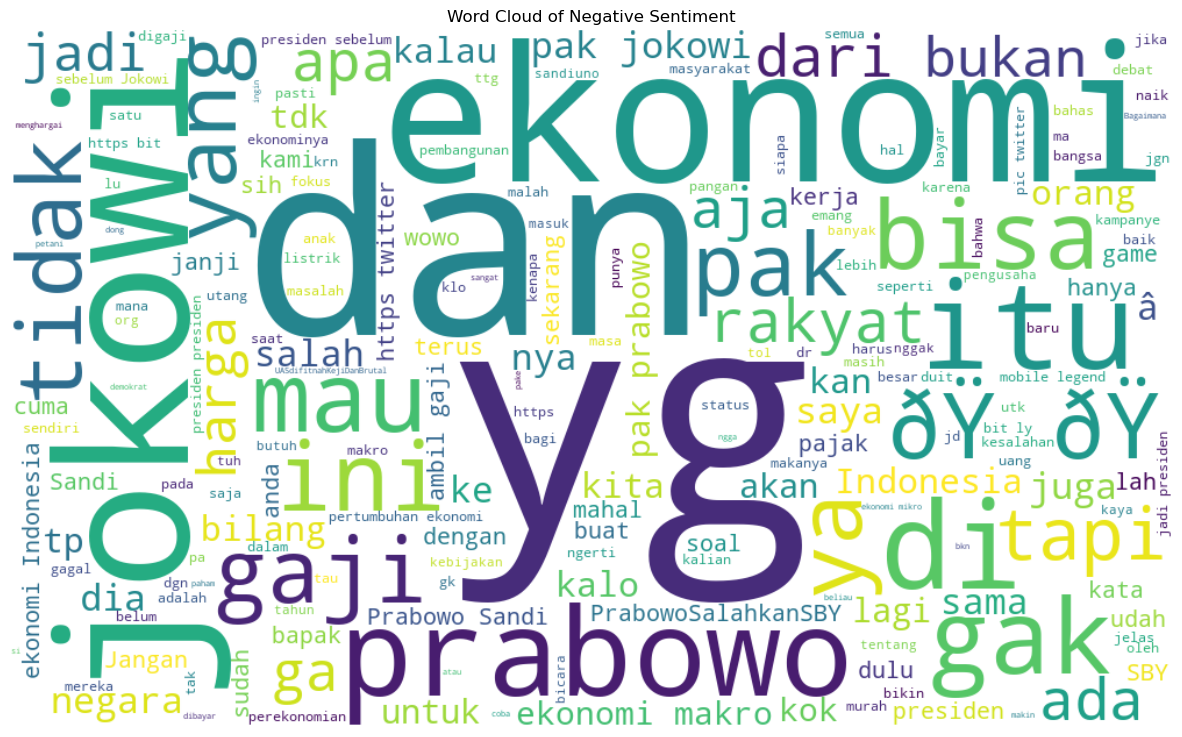

In [439]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews with 'Negative' sentiment
negative_reviews = ' '.join(train_set[train_set['sentimen'] == 'negatif']['tweet'].dropna())

# Generate the word cloud
wordcloud_negative = WordCloud(width=1000, height=600, background_color='white').generate(negative_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud of Negative Sentiment')
plt.axis('off')
plt.show()

In [440]:
import pandas as pd
from collections import Counter

# Combine all the negative reviews into a single string
negative_reviews = ' '.join(train_set[train_set['sentimen'] == 'negatif']['tweet'].dropna())

# Split the words from the string and count their occurrences
negative_word_counts = Counter(negative_reviews.split())

# Get the top 20 most common words in negative reviews
top_20_negative_words = negative_word_counts.most_common(20)

# Display the top 20 most common words in negative reviews
print("Top 20 most common words in negative tweet:")
for word, count in top_20_negative_words:
    print(f"{word}: {count}")


Top 20 most common words in negative tweet:
yg: 191
ekonomi: 186
dan: 123
di: 105
itu: 86
pak: 72
bisa: 63
gak: 63
prabowo: 61
mau: 56
Prabowo: 55
jokowi: 54
tidak: 54
ga: 53
dari: 52
Jokowi: 51
yang: 50
gaji: 50
harga: 50
jadi: 50


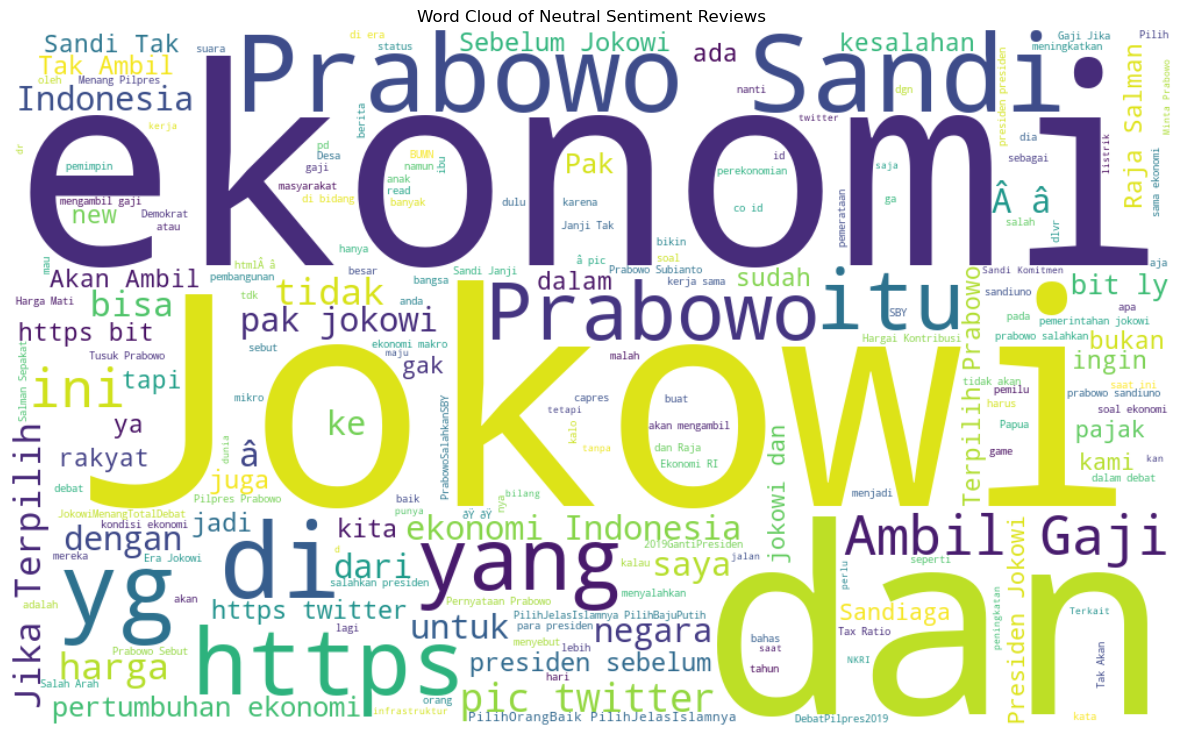

In [441]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter reviews with 'Neutral' sentiment
neutral_reviews = ' '.join(train_set[train_set['sentimen'] == 'netral']['tweet'].dropna())

# Generate the word cloud
wordcloud_neutral = WordCloud(width=1000, height=600, background_color='white').generate(neutral_reviews)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud of Neutral Sentiment Reviews')
plt.axis('off')
plt.show()


In [442]:
import pandas as pd
from collections import Counter

# Combine all the neutral reviews into a single string
neutral_reviews = ' '.join(train_set[train_set['sentimen'] == 'positif']['tweet'].dropna())

# Split the words from the string and count their occurrences
neutral_word_counts = Counter(neutral_reviews.split())

# Get the top 20 most common words in neutral reviews
top_20_neutral_words = neutral_word_counts.most_common(20)

# Display the top 20 most common words in neutral reviews
print("Top 20 most common words in neutral reviews:")
for word, count in top_20_neutral_words:
    print(f"{word}: {count}")

Top 20 most common words in neutral reviews:
dan: 223
yg: 169
ekonomi: 143
di: 126
akan: 94
yang: 80
gaji: 79
itu: 77
Jokowi: 77
pak: 74
ini: 65
untuk: 64
Prabowo: 63
tidak: 60
@prabowo: 58
bisa: 54
harga: 54
jokowi: 53
Pak: 53
prabowo: 52


# Data Preprocessing

## Replace Emoticon

In [443]:
emoticon_dict = {
    "☺": " senyum",
    "✊": " kepalan tangan",
    "✌": " peace",
    "✌️": " peace",
    "❤️": " cinta",
    "⭐": " bintang",
    "🇮🇩": " bendera Indonesia",
    "🇲🇨": " bendera Indonesia",
    "🏆": " piala",
    "👆": " tunjuk ke atas",
    "👆🏻": " tunjuk ke atas",
    "👇": " tunjuk ke bawah",
    "👈🏻": " tunjuk ke kiri",
    "👉": " tunjuk ke kanan",
    "👊": " kepalan tangan",
    "👍": " jempol",
    "👍🏻": " jempol",
    "👍🏿": " jempol",
    "👏": " tepuk tangan",
    "👧": " anak perempuan",
    "💕": " cinta",
    "💪": " berotot",
    "😀": " senyum lebar",
    "😁": " senyum lebar",
    "😂": " tertawa",
    "😃": " senang",
    "😄": " senang",
    "😅": " tertawa",
    "😆": " tertawa",
    "😇": " malaikat",
    "😊": " senang",
    "😋": " menjilat bibir",
    "😍": " jatuh cinta",
    "😎": " keren",
    "😑": " datar",
    "😓": " keringat",
    "😘": " ciuman",
    "😚": " ciuman",
    "😜": " nakal",
    "😢": " menangis",
    "😪": " mengantuk",
    "😬": " senyum canggung",
    "😭": " menangis",
    "😶": " diam",
    "🙂": " senyum",
    "🙄": " melirik",
    "🙈": " tidak melihat",
    "🙎": " cemberut",
    "🙏": " berdoa",
    "🙏🏽": " berdoa",
    "🤒": " sakit",
    "🤔": " berpikir",
    "🤕": " sakit",
    "🤗": " pelukan",
    "🤣": " tertawa terbahak-bahak",
    "🤦": " menepuk dahi (wanita)",
    "🤦🏻": " menepuk dahi (pria)",
    "🤧": " bersin",
    "🤪": " gila",
    "🤭": " menutup mulut",
    "🤲": " tangan terbuka",
    "😃": " senang",
    "😊": " senang",
    "😂": " tertawa",
    "😢": " menangis",
    "😡": " marah",
    "😍": " cinta",
    "😎": " keren",
    "😞": " sedih",
    "😄": " tertawa",
    "😉": " menyeringai",
    "😭": " menangis keras",
    "😜": " menggoda",
    "😒": " tidak senang",
    "😔": " tertekan",
    "😇": " baik hati",
    "😋": " lezat",
    "😱": " ketakutan",
    "😠": " marah",
    "😴": " mengantuk",
    "😅": " keringat dingin",
    "😆": " tertawa terbahak",
    "😘": " cium",
    "😗": " cium",
    "😙": " cium",
    "😚": " cium",
    "😐": " datar",
    "😑": " tidak senang",
    "😶": " tidak bicara",
    "🙄": " putar mata",
    "😏": " sinis",
    "😣": " frustrasi",
    "😥": " lega",
    "😮": " terkejut",
    "😯": " terkejut",
    "😪": " mengantuk",
    "😫": " lelah",
    "😴": " tidur",
    "😌": " lega",
    "😛": " menjulurkan lidah",
    "😜": " menjulurkan lidah",
    "😝": " menjulurkan lidah",
    "😒": " tidak senang",
    "😓": " keringat dingin",
    "😔": " sedih",
    "😕": " bingung",
    "😲": " terkejut",
    "😷": " sakit",
    "😺": " kucing senang",
    "😸": " kucing senang",
    "😹": " kucing tertawa",
    "😻": " kucing cinta",
    "😼": " kucing sinis",
    "😽": " kucing cium",
    "🙀": " kucing terkejut",
    "😿": " kucing sedih",
    "😾": " kucing marah",
    "👍": " jempol",
    "👎": " jempol turun",
    "👌": " ok",
    "✌": " damai",
    "👋": " halo",
    "👏": " tepuk tangan",
    "👐": " tangan terbuka",
    "🙏": " berdoa",
    "👊": " tinju",
    "✊": " angkat tinju",
    "🤛": " tinju kiri",
    "🤜": " tinju kanan",
    "🤞": " menyilangkan jari",
    "✋": " tangan terbuka",
    "🤚": " tangan terbuka",
    "🖐": " tangan terbuka",
    "🖖": " salute vulcan"
}

In [444]:
# Extract emoji
import emoji
import demoji
import ftfy

In [445]:
# konversi special characters yang mengindikasikan emoji menjadi emoji
X_train['tweet'] = X_train['tweet'].apply(ftfy.fix_text)
X_test['tweet'] = X_test['tweet'].apply(ftfy.fix_text)
X_valid['tweet'] = X_valid['tweet'].apply(ftfy.fix_text)

In [446]:
# Sanity check
df_sample = X_train.head(10)

In [447]:
df_sample["tweet"].tolist()

['Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-To\xa0   Tolong digajih team yg bikin film dokumenter sekeren ini😭  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((',
 'Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)',
 'Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi',
 'Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk.   Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya.',
 'Pak Dhe  @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita Pancasila, NK

In [448]:
# ganti emotikon dengan teks tertentu
def replace_emoticons(text):
    for emoticon, value in emoticon_dict.items():
        text = text.replace(emoticon, value)
    return text

# implementasi ganti emotikon dengan teks tertentu
X_train['tweet_non_emoticon'] = X_train['tweet'].apply(replace_emoticons)
X_test['tweet_non_emoticon'] = X_test['tweet'].apply(replace_emoticons)
X_valid['tweet_non_emoticon'] = X_valid['tweet'].apply(replace_emoticons)

In [449]:
df_sample = X_train.head(10)

In [450]:
df_sample["tweet_non_emoticon"].tolist()

['Pak, liat ini pak.  @jokowi @prabowo @Chilli_Pari @sandiuno @kaesangp @LuhutBinsar  https://youtu.be/qlB7vg4I-To\xa0   Tolong digajih team yg bikin film dokumenter sekeren ini menangis keras  Bikin nangis dan ngerasa bersalah banget sering lupa cabut casan dan matiin lampu :((',
 'Scope berpikir Anda kecil sekali. Yg pak jokowi mau tekankan bukan soal main gamenya, tapi ekosistemnya. Pemain ML, DOTA, FF, PUBG banyak sekali yg berbasis di Indo. Pak Jokowi mau tau apa tanggapan pak Prabowo soal potensi dr ekonomi kreatif ini, (1)',
 'Prabowo Sandi menyerahkan gajinya untuk anak yatim & kaum duafa.aamiin #GueKapokPilihJokowi',
 'Mbak ini ekonomi yang ditopik jokowi pas itu ekonomi makro, yg dibahas udah derivatif ketiga, udh rata2 laju inflasi uang, bukan sekedar rakyat bisa beli spp ato gk.   Klw mikirnya cuma sandang pangan papan Indonesia kapan majunya.',
 'Pak Dhe  @Jokowi mengingatkan, perbedaan, keragaman dan kebhinekaan Indonesia harus dijaga dan dirawat bersama,Dasar negara kita

In [451]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...  
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...  
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  
...                                                 ...  
877   Makasih ya Allah.. skenario MU begitu Agung. E...  
1662  Sandi sebut ia tidak akan mengambil gajinya ji...  
800   Demokrat minta Prabowo hargai kontribusi Presi...  
865   Pancasila harga mati bravo pak presiden @jokow...  
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...  

[1270 rows x 2 columns]

In [452]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  
1300  permasalahan di bawah tentu tak hanya pure kes...  
1590  Ini yg di gembar gembor si jae ekonomi meroket...  
1729  Bangga dengan mental gembelnya.  Tidak ada keb...  
921   Apa saja kabar menarik dalam sepekan ini? Ya k...  
463   Saham sdh dijual,aset banyak berkurang & sekar...  
...                                                 ...  
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...  
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...  
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...  
817   Antek asing, PKI, ekonomi amburadul. harga2 na...  
492   Gimana mau main Mobile legend kalo paket aja n...  

[272 rows x 2 columns]

In [453]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...  
1225  Rezim @jokowi adalah mandataris world bank, me...  
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...  
692   ga boleh suuzon mba hehe hargai dong hasil ker...  
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...  
...                                                 ...  
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...  
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...  
202      Gaji karyawan yang terkatung-katung apa kabar?  
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...  
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...  

[273 rows x 2 columns]

## Remove https, pictwitter, bitly

In [454]:
# Sanity check
df_sample = X_train['tweet_non_emoticon'].iloc[40:60]
df_sample

1696    Jangan kan gaji,jiwa raga pun diserahkan untuk...
1462    setuju. bang sandi emg paham betul soal ekonom...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil, atau semua fas...
1133    Prabowo-Sandi: Tak akan ambil gajinya sepersen...
1331    E-sport emang bisnis besar, tapi lo perhatiin ...
736     Pak Jokowi diwarisi ekonomi yg bobrok, sdh lum...
556     Semoga Pak Prabowo jadi Presiden.. agar ekonom...
735      tertawa tertawa tertawa yang lebih lucunya, s...
1080    Prabowo-Sandi Ingin Pangkas Pajak Pekerja agar...
71      #PilihOrangBaik#PilihJelasIslamnya #PilihBajuP...
510     Sebetulnya Pak Prabowo mau bilang, Lu jadi pre...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana. cinta  Mau cari ...
858     RT Harian_Jogja "Kecewa, Demokrat Minta Prabow...
1793    Soalnya kalau pak Prabowo jadi presiden, dinas...
1405          

In [455]:
df_sample.tolist()

['Jangan kan gaji,jiwa raga pun diserahkan untuk rakyat indonesiaa....ingat kalimat gusdur "orang yang paling ikhlas buat indonesia yaa PRABOWO.....',
 'setuju. bang sandi emg paham betul soal ekonomi, Pak Prabowo paham betul masalah Pertahanan dan Keamanan. PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil, atau semua fasilitas negara juga tak diambil??, Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak @sandiuno, tapi kalau semuanya tidak anda ambil, baru saya akui anda itu hebat...',
 'Prabowo-Sandi: Tak akan ambil gajinya sepersen pun jika terpilih.   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa.  Sungguh mulia hati pemimpin kita ini.. Allahu Akbar..!    https://kumparan.com/@kumparannews/prabowo-sandi-tak-akan-ambil-gaji-sepeser-pun-jika-terpilih-1qsh5p8Xjqe\xa0…',
 'E-sport emang bisnis besar, tapi lo perhatiin juga negara developer game e-sport itu rata2 pondasi ekonomi kerakyatan negaranya udah bagus

In [456]:
# hapus url
X_train['tweet_non_url'] = X_train['tweet_non_emoticon'].str.replace(r'https?://\S+|pic.twitter.com/\S+', '', regex=True)
X_valid['tweet_non_url'] = X_valid['tweet_non_emoticon'].str.replace(r'https?://\S+|pic.twitter.com/\S+', '', regex=True)
X_test['tweet_non_url'] = X_test['tweet_non_emoticon'].str.replace(r'https?://\S+|pic.twitter.com/\S+', '', regex=True)

In [457]:
# Sanity check
df_sample = X_train['tweet_non_url'].iloc[40:60]
df_sample

1696    Jangan kan gaji,jiwa raga pun diserahkan untuk...
1462    setuju. bang sandi emg paham betul soal ekonom...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil, atau semua fas...
1133    Prabowo-Sandi: Tak akan ambil gajinya sepersen...
1331    E-sport emang bisnis besar, tapi lo perhatiin ...
736     Pak Jokowi diwarisi ekonomi yg bobrok, sdh lum...
556     Semoga Pak Prabowo jadi Presiden.. agar ekonom...
735      tertawa tertawa tertawa yang lebih lucunya, s...
1080    Prabowo-Sandi Ingin Pangkas Pajak Pekerja agar...
71      #PilihOrangBaik#PilihJelasIslamnya #PilihBajuP...
510     Sebetulnya Pak Prabowo mau bilang, Lu jadi pre...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana. cinta  Mau cari ...
858     RT Harian_Jogja "Kecewa, Demokrat Minta Prabow...
1793    Soalnya kalau pak Prabowo jadi presiden, dinas...
1405          

In [458]:
df_sample.tolist()

['Jangan kan gaji,jiwa raga pun diserahkan untuk rakyat indonesiaa....ingat kalimat gusdur "orang yang paling ikhlas buat indonesia yaa PRABOWO.....',
 'setuju. bang sandi emg paham betul soal ekonomi, Pak Prabowo paham betul masalah Pertahanan dan Keamanan. PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil, atau semua fasilitas negara juga tak diambil??, Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak @sandiuno, tapi kalau semuanya tidak anda ambil, baru saya akui anda itu hebat...',
 'Prabowo-Sandi: Tak akan ambil gajinya sepersen pun jika terpilih.   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa.  Sungguh mulia hati pemimpin kita ini.. Allahu Akbar..!    \xa0…',
 'E-sport emang bisnis besar, tapi lo perhatiin juga negara developer game e-sport itu rata2 pondasi ekonomi kerakyatan negaranya udah bagus.dan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya. 

In [459]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...  
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...  
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...  
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...  
...                                                 ...  
877   Makasih ya Allah.. skenario MU begitu Agung. E...  
1662  Sandi sebut ia tidak akan mengambil gajinya ji...  
800   Demokrat minta Prabowo hargai kontribusi Presi...  
865   Pancasila harga mati bravo pak presiden @jokowi    
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...  

[1270 rows x 3 columns]

In [460]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...  
1225  Rezim @jokowi adalah mandataris world bank, me...  
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...  
692   ga boleh suuzon mba hehe hargai dong hasil ker...  
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...  
...                                                 ...  
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...  
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...  
202      Gaji karyawan yang terkatung-katung apa kabar?  
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...  
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...  

[273 rows x 3 columns]

In [461]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  
1300  permasalahan di bawah tentu tak hanya pure kes...  
1590  Ini yg di gembar gembor si jae ekonomi meroket...  
1729  Bangga dengan mental gembelnya.  Tidak ada keb...  
921   Apa saja kabar menarik dalam sepekan ini? Ya k...  
463   Saham sdh dijual,aset banyak berkurang & sekar...  
...                                                 ...  
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...  
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...  
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...  
817   Antek asing, PKI, ekonomi amburadul. harga2 na...  
492   Gimana mau main Mobile legend kalo paket aja n...  

[272 rows x 3 columns]

## Remove @ pada username, # pada hastag, Punctuation, dan Special Characters

In [462]:
# Sanity check
df_sample = X_train['tweet_non_url'].iloc[40:60]
df_sample

1696    Jangan kan gaji,jiwa raga pun diserahkan untuk...
1462    setuju. bang sandi emg paham betul soal ekonom...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil, atau semua fas...
1133    Prabowo-Sandi: Tak akan ambil gajinya sepersen...
1331    E-sport emang bisnis besar, tapi lo perhatiin ...
736     Pak Jokowi diwarisi ekonomi yg bobrok, sdh lum...
556     Semoga Pak Prabowo jadi Presiden.. agar ekonom...
735      tertawa tertawa tertawa yang lebih lucunya, s...
1080    Prabowo-Sandi Ingin Pangkas Pajak Pekerja agar...
71      #PilihOrangBaik#PilihJelasIslamnya #PilihBajuP...
510     Sebetulnya Pak Prabowo mau bilang, Lu jadi pre...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana. cinta  Mau cari ...
858     RT Harian_Jogja "Kecewa, Demokrat Minta Prabow...
1793    Soalnya kalau pak Prabowo jadi presiden, dinas...
1405          

In [463]:
df_sample.tolist()

['Jangan kan gaji,jiwa raga pun diserahkan untuk rakyat indonesiaa....ingat kalimat gusdur "orang yang paling ikhlas buat indonesia yaa PRABOWO.....',
 'setuju. bang sandi emg paham betul soal ekonomi, Pak Prabowo paham betul masalah Pertahanan dan Keamanan. PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil, atau semua fasilitas negara juga tak diambil??, Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak @sandiuno, tapi kalau semuanya tidak anda ambil, baru saya akui anda itu hebat...',
 'Prabowo-Sandi: Tak akan ambil gajinya sepersen pun jika terpilih.   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa.  Sungguh mulia hati pemimpin kita ini.. Allahu Akbar..!    \xa0…',
 'E-sport emang bisnis besar, tapi lo perhatiin juga negara developer game e-sport itu rata2 pondasi ekonomi kerakyatan negaranya udah bagus.dan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya. 

In [464]:
def remove_special_character(text):
    # Mengganti special characters dan punctuation dengan string kosong
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [465]:
# Menghapus special characters dari kolom 'tweet'
X_train['tweet_non_special_characters'] = X_train['tweet_non_url'].apply(remove_special_character)
X_test['tweet_non_special_characters'] = X_test['tweet_non_url'].apply(remove_special_character)
X_valid['tweet_non_special_characters'] = X_valid['tweet_non_url'].apply(remove_special_character)

In [466]:
# Sanity check
df_sample = X_train['tweet_non_special_characters'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta  Mau cari k...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [467]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa  Sungguh mulia hati pemimpin kita ini Allahu Akbar    \xa0',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata2 pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak

In [468]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...  
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...  
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...  
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...  
...                                                 ...  
877   Makasih ya Allah skenario MU begitu Agung Engk...  
1662  Sandi sebut ia tidak akan mengambil gajinya ji...  
800   Demokrat minta Prabowo hargai kontribusi Presi...  
865    Pancasila harga mati bravo pak presiden jokowi    
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...  

[1270 rows x 4 columns]

In [469]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  
1300  permasalahan di bawah tentu tak hanya pure kes...  
1590  Ini yg di gembar gembor si jae ekonomi meroket...  
1729  Bangga dengan mental gembelnya  Tidak ada keba...  
921   Apa saja kabar menarik dalam sepekan ini Ya ki...  
463   Saham sdh dijualaset banyak berkurang  sekaran...  
...                                                 ...  
1705  PrabowoSandi tak akan ambil gaji jika terpilih...  
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...  
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...  
817   Antek asing PKI ekonomi amburadul harga2 naik ...  
492   Gimana mau main Mobile legend kalo paket aja n...  

[272 rows x 4 columns]

In [470]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...  
1225  Rezim jokowi adalah mandataris world bank meng...  
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...  
692   ga boleh suuzon mba hehe hargai dong hasil ker...  
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...  
...                                                 ...  
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...  
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...  
202        Gaji karyawan yang terkatungkatung apa kabar  
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...  
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...  

[273 rows x 4 columns]

## Remove Numeric

In [471]:
# Sanity check
df_sample = X_train['tweet_non_special_characters'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta  Mau cari k...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [472]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa  Sungguh mulia hati pemimpin kita ini Allahu Akbar    \xa0',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata2 pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak

In [473]:
# menghapus numerik
def remove_numeric_characters(text):
    # Menghapus karakter numerik dengan regex
    cleaned_text = re.sub(r'\d+', '', text)
    return cleaned_text

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_train
X_train['tweet_non_numeric'] = X_train['tweet_non_special_characters'].apply(remove_numeric_characters)

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_test
X_test['tweet_non_numeric'] = X_test['tweet_non_special_characters'].apply(remove_numeric_characters)

# Menghapus karakter numerik dari kolom tweet_non_special_characters di X_valid
X_valid['tweet_non_numeric'] = X_valid['tweet_non_special_characters'].apply(remove_numeric_characters)

In [474]:
# Sanity check
df_sample = X_train['tweet_non_numeric'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta  Mau cari k...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [475]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa  Sungguh mulia hati pemimpin kita ini Allahu Akbar    \xa0',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak 

In [476]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...  
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...  
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...  
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...  
...                                                 ...  
877   Makasih ya Allah skenario MU begitu Agung Engk...  
1662  Sandi sebut ia tidak akan mengambil gajinya ji...  
800   Demokrat minta Prabowo hargai kontribusi Presi...  
865    Pancasila harga mati bravo pak presiden jokowi    
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...  

[1270 rows x 5 columns]

In [477]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  
1300  permasalahan di bawah tentu tak hanya pure kes...  
1590  Ini yg di gembar gembor si jae ekonomi meroket...  
1729  Bangga dengan mental gembelnya  Tidak ada keba...  
921   Apa saja kabar menarik dalam sepekan ini Ya ki...  
463   Saham sdh dijualaset banyak berkurang  sekaran...  
...                                                 ...  
1705  PrabowoSandi tak akan ambil gaji jika terpilih...  
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...  
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...  
817   Antek asing PKI ekonomi amburadul harga naik r...  
492   Gimana mau main Mobile legend kalo paket aja n...  

[272 rows x 5 columns]

In [478]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...  
1225  Rezim jokowi adalah mandataris world bank meng...  
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...  
692   ga boleh suuzon mba hehe hargai dong hasil ker...  
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...  
...                                                 ...  
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...  
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...  
202        Gaji karyawan yang terkatungkatung apa kabar  
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...  
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...  

[273 rows x 5 columns]

## Remove Double Space

In [479]:
# Sanity check
df_sample = X_train['tweet_non_numeric'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta  Mau cari k...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [480]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih   Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa  Sungguh mulia hati pemimpin kita ini Allahu Akbar    \xa0',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak 

In [481]:
# hapus double space
def remove_double_space(text):
    # Menghapus double space dengan regex
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text

# Menghapus double space dari kolom tweet_non_numeric di X_train
X_train['tweet_non_double_space'] = X_train['tweet_non_numeric'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_test
X_test['tweet_non_double_space'] = X_test['tweet_non_numeric'].apply(remove_double_space)

# Menghapus double space dari kolom tweet_non_numeric di X_valid
X_valid['tweet_non_double_space'] = X_valid['tweet_non_numeric'].apply(remove_double_space)

In [482]:
# Sanity check
df_sample = X_train['tweet_non_double_space'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta Mau cari ke...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [483]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa Sungguh mulia hati pemimpin kita ini Allahu Akbar ',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak Jokowi diw

In [484]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  
499   Pak liat ini pak jokowi prabowo ChilliPari san...  
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...  
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...  
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...  
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...  
...                                                 ...  
877   Makasih ya Allah skenario MU begitu Agung Engk...  
1662  Sandi sebut ia tidak akan mengambil

In [485]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  
1300  permasalahan di bawah tentu tak hanya pure kes...  
1590  Ini yg di gembar gembor si jae ekonomi meroket...  
1729  Bangga dengan mental gembelnya Tidak ada keban...  
921   Apa saja kabar menarik dalam sepekan ini Ya ki...  
463   Saham sdh dijualaset banyak berkurang sekarang...  
...                                                 ...  
1705  PrabowoSandi tak akan ambil gaji jika terpilih...  
49    PilihOrangBaik PilihJelasIslamnya P

In [486]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...  
1225  Rezim jokowi adalah mandataris world bank meng...  
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...  
692   ga boleh suuzon mba hehe hargai dong hasil ker...  
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata   
...                                                 ...  
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...  
1430  Tutup Debat Prabowo Sindir Jokowi S

## Convert to Lower Case

In [487]:
# Sanity check
df_sample = X_train['tweet_non_double_space'].iloc[40:60]
df_sample

1696    Jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    Gaji pokok saja yg tak diambil atau semua fasi...
1133    PrabowoSandi Tak akan ambil gajinya sepersen p...
1331    Esport emang bisnis besar tapi lo perhatiin ju...
736     Pak Jokowi diwarisi ekonomi yg bobrok sdh luma...
556     Semoga Pak Prabowo jadi Presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    PrabowoSandi Ingin Pangkas Pajak Pekerja agar ...
71      PilihOrangBaikPilihJelasIslamnya PilihBajuPuti...
510     Sebetulnya Pak Prabowo mau bilang Lu jadi pres...
1708    Katanya tadi tidak akan menerima gaji jika dia...
653     Pilihlah pemimpin yang siap berkorban dan waka...
1448    Closing Yang Cetar Membahana cinta Mau cari ke...
858     RT HarianJogja Kecewa Demokrat Minta Prabowo H...
1793    Soalnya kalau pak Prabowo jadi presiden dinast...
1405          

In [488]:
df_sample.tolist()

['Jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa PRABOWO',
 'setuju bang sandi emg paham betul soal ekonomi Pak Prabowo paham betul masalah Pertahanan dan Keamanan PAS pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'Gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil Kalau cuma gaji pokok Ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'PrabowoSandi Tak akan ambil gajinya sepersen pun jika terpilih Gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa Sungguh mulia hati pemimpin kita ini Allahu Akbar ',
 'Esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya Contoh PRC Taiwan Singapore dll',
 'Pak Jokowi diw

In [489]:
# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_train
X_train['tweet_lowercase'] = X_train['tweet_non_double_space'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_test
X_test['tweet_lowercase'] = X_test['tweet_non_double_space'].str.lower()

# Mengubah isi kolom tweet_non_double_space menjadi lowercase di X_valid
X_valid['tweet_lowercase'] = X_valid['tweet_non_double_space'].str.lower()

In [490]:
# Sanity check
df_sample = X_train['tweet_lowercase'].iloc[40:60]
df_sample

1696    jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    gaji pokok saja yg tak diambil atau semua fasi...
1133    prabowosandi tak akan ambil gajinya sepersen p...
1331    esport emang bisnis besar tapi lo perhatiin ju...
736     pak jokowi diwarisi ekonomi yg bobrok sdh luma...
556     semoga pak prabowo jadi presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    prabowosandi ingin pangkas pajak pekerja agar ...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     sebetulnya pak prabowo mau bilang lu jadi pres...
1708    katanya tadi tidak akan menerima gaji jika dia...
653     pilihlah pemimpin yang siap berkorban dan waka...
1448    closing yang cetar membahana cinta mau cari ke...
858     rt harianjogja kecewa demokrat minta prabowo h...
1793    soalnya kalau pak prabowo jadi presiden dinast...
1405          

In [491]:
df_sample.tolist()

['jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa prabowo',
 'setuju bang sandi emg paham betul soal ekonomi pak prabowo paham betul masalah pertahanan dan keamanan pas pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil kalau cuma gaji pokok ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'prabowosandi tak akan ambil gajinya sepersen pun jika terpilih gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa sungguh mulia hati pemimpin kita ini allahu akbar ',
 'esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya contoh prc taiwan singapore dll',
 'pak jokowi diw

In [492]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  \
499   Pak liat ini pak jokowi prabowo ChilliPari san...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan m

In [493]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya Tidak ada keban...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang sekarang...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIs

In [494]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  \
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata    
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir 

## Replace bahasa Slang

In [495]:
# Sanity check
df_sample = X_train['tweet_lowercase'].iloc[40:60]
df_sample

1696    jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi emg paham betul soal ekonomi...
1496    gaji pres hanya cukup unt beli tusuk gigi buat...
1263    gaji pokok saja yg tak diambil atau semua fasi...
1133    prabowosandi tak akan ambil gajinya sepersen p...
1331    esport emang bisnis besar tapi lo perhatiin ju...
736     pak jokowi diwarisi ekonomi yg bobrok sdh luma...
556     semoga pak prabowo jadi presiden agar ekonomi ...
735      tertawa tertawa tertawa yang lebih lucunya sa...
1080    prabowosandi ingin pangkas pajak pekerja agar ...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     sebetulnya pak prabowo mau bilang lu jadi pres...
1708    katanya tadi tidak akan menerima gaji jika dia...
653     pilihlah pemimpin yang siap berkorban dan waka...
1448    closing yang cetar membahana cinta mau cari ke...
858     rt harianjogja kecewa demokrat minta prabowo h...
1793    soalnya kalau pak prabowo jadi presiden dinast...
1405          

In [496]:
df_sample.tolist()

['jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas buat indonesia yaa prabowo',
 'setuju bang sandi emg paham betul soal ekonomi pak prabowo paham betul masalah pertahanan dan keamanan pas pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi buat prabowo',
 'gaji pokok saja yg tak diambil atau semua fasilitas negara juga tak diambil kalau cuma gaji pokok ja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak anda ambil baru saya akui anda itu hebat',
 'prabowosandi tak akan ambil gajinya sepersen pun jika terpilih gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa sungguh mulia hati pemimpin kita ini allahu akbar ',
 'esport emang bisnis besar tapi lo perhatiin juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya udah bagusdan kebanyakan dari mereka nggak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya contoh prc taiwan singapore dll',
 'pak jokowi diw

In [497]:
import nltk
from nltk.tokenize import word_tokenize
# read kamus slang
def read_slang_dict(filename):
    slang_dict = {}
    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            slang, baku = line.strip().split('\t')
            slang_dict[slang] = baku
    return slang_dict

# read kamus slang
slang_dict = read_slang_dict('bahasa_gaul_indonesia.txt')

# ganti kata slang dengan bahasa baku sesuai dictionary pada bahasa_gaul_indonesia
def replace_slang(tweet):
    # Tokenize tweet menjadi kata-kata
    words = word_tokenize(tweet)
    # Mengganti kata slang dengan kata baku jika ada di dictionary pada bahasa_gaul_indonesia
    translated_words = [slang_dict[word.lower()] if word.lower() in slang_dict else word for word in words]
    # gabungkan kata menjadi satu teks
    translated_tweet = ' '.join(translated_words)
    return translated_tweet


In [498]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [499]:
# ganti kata slang menjadi bahasa baku sesuai dengan dictionary pada bahasa_gaul_indonesia
X_train['tweet_non_slang'] = X_train['tweet_lowercase'].apply(replace_slang)
X_valid['tweet_non_slang'] = X_valid['tweet_lowercase'].apply(replace_slang)
X_test['tweet_non_slang'] = X_test['tweet_lowercase'].apply(replace_slang)

In [500]:
# Sanity check
df_sample = X_train['tweet_non_slang'].iloc[40:60]
df_sample

1696    jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi memang paham benar soal ekon...
1496    gaji pres hanya cukup unt beli tusuk gigi memb...
1263    gaji pokok saja yang tidak diambil atau semua ...
1133    prabowosandi tidak akan ambil gajinya sepersen...
1331    esport memang bisnis besar tapi kamu perhatika...
736     pak jokowi diwarisi ekonomi yang bobrok sudah ...
556     semoga pak prabowo jadi presiden agar ekonomi ...
735     tertawa tertawa tertawa yang lebih lucunya san...
1080    prabowosandi ingin pangkas pajak pekerja agar ...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     sebetulnya pak prabowo mau katakan kamu jadi p...
1708    katanya tadi tidak akan menerima gaji jika dia...
653     pilihlah pemimpin yang siap berkorban dan waka...
1448    closing yang cetar membahana cinta mau mencari...
858     rt harianjogja kecewa demokrat minta prabowo h...
1793    soalnya kalau pak prabowo jadi presiden dinast...
1405          

In [501]:
df_sample.tolist()

['jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas membuat indonesia ya prabowo',
 'setuju bang sandi memang paham benar soal ekonomi pak prabowo paham benar masalah pertahanan dan keamanan saat pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi membuat prabowo',
 'gaji pokok saja yang tidak diambil atau semua fasilitas negara juga tidak diambil kalau cuma gaji pokok saja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak kamu ambil baru saya akui kamu itu hebat',
 'prabowosandi tidak akan ambil gajinya sepersen pun jika terpilih gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa sungguh mulia hati pemimpin kita ini allahu akbar',
 'esport memang bisnis besar tapi kamu perhatikan juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya sudah bagusdan kebanyakan dari mereka tidak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya contoh prc taiwan singapore

In [502]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  \
499   Pak liat ini pak jokowi prabowo ChilliPari san...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan m

In [503]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  \
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata    
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir 

In [504]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya Tidak ada keban...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang sekarang...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIs

## Remove Stopwords

In [505]:
# Sanity check
df_sample = X_train['tweet_non_slang'].iloc[40:60]
df_sample

1696    jangan kan gajijiwa raga pun diserahkan untuk ...
1462    setuju bang sandi memang paham benar soal ekon...
1496    gaji pres hanya cukup unt beli tusuk gigi memb...
1263    gaji pokok saja yang tidak diambil atau semua ...
1133    prabowosandi tidak akan ambil gajinya sepersen...
1331    esport memang bisnis besar tapi kamu perhatika...
736     pak jokowi diwarisi ekonomi yang bobrok sudah ...
556     semoga pak prabowo jadi presiden agar ekonomi ...
735     tertawa tertawa tertawa yang lebih lucunya san...
1080    prabowosandi ingin pangkas pajak pekerja agar ...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     sebetulnya pak prabowo mau katakan kamu jadi p...
1708    katanya tadi tidak akan menerima gaji jika dia...
653     pilihlah pemimpin yang siap berkorban dan waka...
1448    closing yang cetar membahana cinta mau mencari...
858     rt harianjogja kecewa demokrat minta prabowo h...
1793    soalnya kalau pak prabowo jadi presiden dinast...
1405          

In [506]:
df_sample.tolist()

['jangan kan gajijiwa raga pun diserahkan untuk rakyat indonesiaaingat kalimat gusdur orang yang paling ikhlas membuat indonesia ya prabowo',
 'setuju bang sandi memang paham benar soal ekonomi pak prabowo paham benar masalah pertahanan dan keamanan saat pokoknya',
 'gaji pres hanya cukup unt beli tusuk gigi membuat prabowo',
 'gaji pokok saja yang tidak diambil atau semua fasilitas negara juga tidak diambil kalau cuma gaji pokok saja cuma berapalah sebulannya pak sandiuno tapi kalau semuanya tidak kamu ambil baru saya akui kamu itu hebat',
 'prabowosandi tidak akan ambil gajinya sepersen pun jika terpilih gaji yang mereka terima akan berikan ke kaum yatim dan dhuafa sungguh mulia hati pemimpin kita ini allahu akbar',
 'esport memang bisnis besar tapi kamu perhatikan juga negara developer game esport itu rata pondasi ekonomi kerakyatan negaranya sudah bagusdan kebanyakan dari mereka tidak terlalu membutuhkan dukungan pemerintah sudah bisa membesarkan dirinya contoh prc taiwan singapore

In [507]:
import nltk
from nltk.corpus import stopwords

# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')

# pakai stopword bahasa indonesia dari NLTK
stopwords_indonesia = stopwords.words('indonesian')

# pengecualian kata tidak dan semakin pada stopwords
stopwords_indonesia = [word for word in stopwords_indonesia if word.lower() not in ['tidak', 'semakin']]

# hapus stopwords dari teks
def remove_stopwords(text):
    words = text.split()
    cleaned_words = [word for word in words if word.lower() not in stopwords_indonesia]
    return ' '.join(cleaned_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [508]:
# hapus stopwords dari teks
X_train['tweet_non_stopwords'] = X_train['tweet_non_slang'].apply(remove_stopwords)
X_valid['tweet_non_stopwords'] = X_valid['tweet_non_slang'].apply(remove_stopwords)
X_test['tweet_non_stopwords'] = X_test['tweet_non_slang'].apply(remove_stopwords)

In [509]:
# Sanity check
df_sample = X_train['tweet_non_stopwords'].iloc[40:60]
df_sample

1696    gajijiwa raga diserahkan rakyat indonesiaainga...
1462    setuju bang sandi paham ekonomi prabowo paham ...
1496                gaji pres unt beli tusuk gigi prabowo
1263    gaji pokok tidak diambil fasilitas negara tida...
1133    prabowosandi tidak ambil gajinya sepersen terp...
1331    esport bisnis perhatikan negara developer game...
736     jokowi diwarisi ekonomi bobrok lumayan bukansa...
556     semoga prabowo presiden ekonomi maju dunia per...
735     tertawa tertawa tertawa lucunya sandi prabowo ...
1080    prabowosandi pangkas pajak pekerja tax ratio y...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     prabowo presiden mbak polos pertmbuhan ekonomi...
1708    tidak menerima gaji diamanahkan menjabat tidak...
653     pilihlah pemimpin berkorban wakafkan hartanya ...
1448    closing cetar membahana cinta mencari kerja ga...
858     rt harianjogja kecewa demokrat prabowo hargai ...
1793    prabowo presiden dinasti cendana bangun kekuas...
1405          

In [510]:
df_sample.tolist()

['gajijiwa raga diserahkan rakyat indonesiaaingat kalimat gusdur orang ikhlas indonesia ya prabowo',
 'setuju bang sandi paham ekonomi prabowo paham pertahanan keamanan pokoknya',
 'gaji pres unt beli tusuk gigi prabowo',
 'gaji pokok tidak diambil fasilitas negara tidak diambil gaji pokok sebulannya sandiuno tidak ambil akui hebat',
 'prabowosandi tidak ambil gajinya sepersen terpilih gaji terima kaum yatim dhuafa sungguh mulia hati pemimpin allahu akbar',
 'esport bisnis perhatikan negara developer game esport pondasi ekonomi kerakyatan negaranya bagusdan kebanyakan tidak membutuhkan dukungan pemerintah membesarkan contoh prc taiwan singapore lain-lain',
 'jokowi diwarisi ekonomi bobrok lumayan bukansalahbapak senyum lebar',
 'semoga prabowo presiden ekonomi maju dunia perawat',
 'tertawa tertawa tertawa lucunya sandi prabowo diajarin ekonomi makro mukidi ngajari ikan berenang tertawa tertawa tertawa',
 'prabowosandi pangkas pajak pekerja tax ratio yourturnbro prabowo sandiuno',
 'pi

In [511]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  \
499   Pak liat ini pak jokowi prabowo ChilliPari san...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan m

In [512]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  \
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata    
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir 

In [513]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya Tidak ada keban...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang sekarang...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIs

# Stemming

In [514]:
!pip install Sastrawi


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [515]:
# Sanity check
df_sample = X_train['tweet_non_stopwords'].iloc[40:60]
df_sample

1696    gajijiwa raga diserahkan rakyat indonesiaainga...
1462    setuju bang sandi paham ekonomi prabowo paham ...
1496                gaji pres unt beli tusuk gigi prabowo
1263    gaji pokok tidak diambil fasilitas negara tida...
1133    prabowosandi tidak ambil gajinya sepersen terp...
1331    esport bisnis perhatikan negara developer game...
736     jokowi diwarisi ekonomi bobrok lumayan bukansa...
556     semoga prabowo presiden ekonomi maju dunia per...
735     tertawa tertawa tertawa lucunya sandi prabowo ...
1080    prabowosandi pangkas pajak pekerja tax ratio y...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     prabowo presiden mbak polos pertmbuhan ekonomi...
1708    tidak menerima gaji diamanahkan menjabat tidak...
653     pilihlah pemimpin berkorban wakafkan hartanya ...
1448    closing cetar membahana cinta mencari kerja ga...
858     rt harianjogja kecewa demokrat prabowo hargai ...
1793    prabowo presiden dinasti cendana bangun kekuas...
1405          

In [516]:
df_sample.tolist()

['gajijiwa raga diserahkan rakyat indonesiaaingat kalimat gusdur orang ikhlas indonesia ya prabowo',
 'setuju bang sandi paham ekonomi prabowo paham pertahanan keamanan pokoknya',
 'gaji pres unt beli tusuk gigi prabowo',
 'gaji pokok tidak diambil fasilitas negara tidak diambil gaji pokok sebulannya sandiuno tidak ambil akui hebat',
 'prabowosandi tidak ambil gajinya sepersen terpilih gaji terima kaum yatim dhuafa sungguh mulia hati pemimpin allahu akbar',
 'esport bisnis perhatikan negara developer game esport pondasi ekonomi kerakyatan negaranya bagusdan kebanyakan tidak membutuhkan dukungan pemerintah membesarkan contoh prc taiwan singapore lain-lain',
 'jokowi diwarisi ekonomi bobrok lumayan bukansalahbapak senyum lebar',
 'semoga prabowo presiden ekonomi maju dunia perawat',
 'tertawa tertawa tertawa lucunya sandi prabowo diajarin ekonomi makro mukidi ngajari ikan berenang tertawa tertawa tertawa',
 'prabowosandi pangkas pajak pekerja tax ratio yourturnbro prabowo sandiuno',
 'pi

In [517]:
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import word_tokenize

# Donwload punkt
nltk.download('punkt')

# Definisi sastrawi untuk stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [518]:
# stemming teks dengan Sastrawi
def stemming_indonesian(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# stemming teks dengan Sastrawi
X_train['tweet_stemming'] = X_train['tweet_non_stopwords'].apply(stemming_indonesian)
X_valid['tweet_stemming'] = X_valid['tweet_non_stopwords'].apply(stemming_indonesian)
X_test['tweet_stemming'] = X_test['tweet_non_stopwords'].apply(stemming_indonesian)

In [519]:
df_sample = X_train['tweet_stemming'].iloc[40:60]
df_sample

1696    gajijiwa raga serah rakyat indonesiaaingat kal...
1462    tuju bang sandi paham ekonomi prabowo paham ta...
1496                gaji pres unt beli tusuk gigi prabowo
1263    gaji pokok tidak ambil fasilitas negara tidak ...
1133    prabowosandi tidak ambil gaji persen pilih gaj...
1331    esport bisnis perhati negara developer game es...
736     jokowi waris ekonomi bobrok lumayan bukansalah...
556         moga prabowo presiden ekonomi maju dunia awat
735     tertawa tertawa tertawa lucu sandi prabowo dia...
1080    prabowosandi pangkas pajak kerja tax ratio you...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     prabowo presiden mbak polos pertmbuhan ekonomi...
1708    tidak terima gaji amanah jabat tidak singkron ...
653     pilih pimpin korban wakaf harta bangsa indones...
1448    closing cetar bahana cinta cari kerja gampang ...
858     rt harianjogja kecewa demokrat prabowo harga k...
1793    prabowo presiden dinasti cendana bangun kuasa ...
1405          

In [520]:
df_sample.tolist()

['gajijiwa raga serah rakyat indonesiaaingat kalimat gusdur orang ikhlas indonesia ya prabowo',
 'tuju bang sandi paham ekonomi prabowo paham tahan aman pokok',
 'gaji pres unt beli tusuk gigi prabowo',
 'gaji pokok tidak ambil fasilitas negara tidak ambil gaji pokok bulan sandiuno tidak ambil aku hebat',
 'prabowosandi tidak ambil gaji persen pilih gaji terima kaum yatim dhuafa sungguh mulia hati pimpin allahu akbar',
 'esport bisnis perhati negara developer game esport pondasi ekonomi rakyat negara bagusdan banyak tidak butuh dukung perintah besar contoh prc taiwan singapore lain',
 'jokowi waris ekonomi bobrok lumayan bukansalahbapak senyum lebar',
 'moga prabowo presiden ekonomi maju dunia awat',
 'tertawa tertawa tertawa lucu sandi prabowo diajarin ekonomi makro mukidi ngajari ikan renang tertawa tertawa tertawa',
 'prabowosandi pangkas pajak kerja tax ratio yourturnbro prabowo sandiuno',
 'pilihorangbaikpilihjelasislamnya pilihbajuputih presiden jokowi bangun spbu setelag kabupat

In [521]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  \
499   Pak liat ini pak jokowi prabowo ChilliPari san...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan m

In [522]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  \
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata    
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir 

In [523]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya Tidak ada keban...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang sekarang...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIs

## Tokenize

In [524]:
df_sample = X_train['tweet_stemming'].iloc[40:60]
df_sample

1696    gajijiwa raga serah rakyat indonesiaaingat kal...
1462    tuju bang sandi paham ekonomi prabowo paham ta...
1496                gaji pres unt beli tusuk gigi prabowo
1263    gaji pokok tidak ambil fasilitas negara tidak ...
1133    prabowosandi tidak ambil gaji persen pilih gaj...
1331    esport bisnis perhati negara developer game es...
736     jokowi waris ekonomi bobrok lumayan bukansalah...
556         moga prabowo presiden ekonomi maju dunia awat
735     tertawa tertawa tertawa lucu sandi prabowo dia...
1080    prabowosandi pangkas pajak kerja tax ratio you...
71      pilihorangbaikpilihjelasislamnya pilihbajuputi...
510     prabowo presiden mbak polos pertmbuhan ekonomi...
1708    tidak terima gaji amanah jabat tidak singkron ...
653     pilih pimpin korban wakaf harta bangsa indones...
1448    closing cetar bahana cinta cari kerja gampang ...
858     rt harianjogja kecewa demokrat prabowo harga k...
1793    prabowo presiden dinasti cendana bangun kuasa ...
1405          

In [525]:
df_sample.tolist()

['gajijiwa raga serah rakyat indonesiaaingat kalimat gusdur orang ikhlas indonesia ya prabowo',
 'tuju bang sandi paham ekonomi prabowo paham tahan aman pokok',
 'gaji pres unt beli tusuk gigi prabowo',
 'gaji pokok tidak ambil fasilitas negara tidak ambil gaji pokok bulan sandiuno tidak ambil aku hebat',
 'prabowosandi tidak ambil gaji persen pilih gaji terima kaum yatim dhuafa sungguh mulia hati pimpin allahu akbar',
 'esport bisnis perhati negara developer game esport pondasi ekonomi rakyat negara bagusdan banyak tidak butuh dukung perintah besar contoh prc taiwan singapore lain',
 'jokowi waris ekonomi bobrok lumayan bukansalahbapak senyum lebar',
 'moga prabowo presiden ekonomi maju dunia awat',
 'tertawa tertawa tertawa lucu sandi prabowo diajarin ekonomi makro mukidi ngajari ikan renang tertawa tertawa tertawa',
 'prabowosandi pangkas pajak kerja tax ratio yourturnbro prabowo sandiuno',
 'pilihorangbaikpilihjelasislamnya pilihbajuputih presiden jokowi bangun spbu setelag kabupat

In [526]:
import nltk
nltk.download('punkt')

# word tokenization
def tokenize_text(text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [527]:
# add kolom baru 'tweet_tokenize' ke X_train
X_train['tweet_tokenize'] = X_train['tweet_stemming'].apply(tokenize_text)

# add kolom baru 'tweet_tokenize' ke X_test
X_test['tweet_tokenize'] = X_test['tweet_stemming'].apply(tokenize_text)

# add kolom baru 'tweet_tokenize' ke X_valid
X_valid['tweet_tokenize'] = X_valid['tweet_stemming'].apply(tokenize_text)

In [528]:
X_train

tweet  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                     tweet_non_emoticon  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokow...   
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                                          tweet_non_url  \
499   Pak, liat ini pak.  @jokowi @prabowo @Chilli_P...   
1674  Scope berpikir Anda kecil sekali. Yg pak jokow...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  @Jokowi mengingatkan, perbedaan, kera...   
...                                                 ...   
877   Makasih ya Allah.. skenario MU begitu Agung. E...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865   Pancasila harga mati bravo pak presiden @jokowi     
1254  Pak @sandiuno dan pak @prabowo Gajinya kirim k...   

                           tweet_non_special_characters  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                      tweet_non_numeric  \
499   Pak liat ini pak  jokowi prabowo ChilliPari sa...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe  Jokowi mengingatkan perbedaan keragam...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan mengambil gajinya ji...   
800   Demokrat minta Prabowo hargai kontribusi Presi...   
865    Pancasila harga mati bravo pak presiden jokowi     
1254  Pak sandiuno dan pak prabowo Gajinya kirim ke ...   

                                 tweet_non_double_space  \
499   Pak liat ini pak jokowi prabowo ChilliPari san...   
1674  Scope berpikir Anda kecil sekali Yg pak jokowi...   
1753  Prabowo Sandi menyerahkan gajinya untuk anak y...   
1353  Mbak ini ekonomi yang ditopik jokowi pas itu e...   
1164  Pak Dhe Jokowi mengingatkan perbedaan keragama...   
...                                                 ...   
877   Makasih ya Allah skenario MU begitu Agung Engk...   
1662  Sandi sebut ia tidak akan m

In [529]:
df_sample = X_train['tweet_tokenize'].iloc[40:60]
df_sample

1696    [gajijiwa, raga, serah, rakyat, indonesiaainga...
1462    [tuju, bang, sandi, paham, ekonomi, prabowo, p...
1496        [gaji, pres, unt, beli, tusuk, gigi, prabowo]
1263    [gaji, pokok, tidak, ambil, fasilitas, negara,...
1133    [prabowosandi, tidak, ambil, gaji, persen, pil...
1331    [esport, bisnis, perhati, negara, developer, g...
736     [jokowi, waris, ekonomi, bobrok, lumayan, buka...
556     [moga, prabowo, presiden, ekonomi, maju, dunia...
735     [tertawa, tertawa, tertawa, lucu, sandi, prabo...
1080    [prabowosandi, pangkas, pajak, kerja, tax, rat...
71      [pilihorangbaikpilihjelasislamnya, pilihbajupu...
510     [prabowo, presiden, mbak, polos, pertmbuhan, e...
1708    [tidak, terima, gaji, amanah, jabat, tidak, si...
653     [pilih, pimpin, korban, wakaf, harta, bangsa, ...
1448    [closing, cetar, bahana, cinta, cari, kerja, g...
858     [rt, harianjogja, kecewa, demokrat, prabowo, h...
1793    [prabowo, presiden, dinasti, cendana, bangun, ...
1405          

In [530]:
df_sample.tolist()

[['gajijiwa',
  'raga',
  'serah',
  'rakyat',
  'indonesiaaingat',
  'kalimat',
  'gusdur',
  'orang',
  'ikhlas',
  'indonesia',
  'ya',
  'prabowo'],
 ['tuju',
  'bang',
  'sandi',
  'paham',
  'ekonomi',
  'prabowo',
  'paham',
  'tahan',
  'aman',
  'pokok'],
 ['gaji', 'pres', 'unt', 'beli', 'tusuk', 'gigi', 'prabowo'],
 ['gaji',
  'pokok',
  'tidak',
  'ambil',
  'fasilitas',
  'negara',
  'tidak',
  'ambil',
  'gaji',
  'pokok',
  'bulan',
  'sandiuno',
  'tidak',
  'ambil',
  'aku',
  'hebat'],
 ['prabowosandi',
  'tidak',
  'ambil',
  'gaji',
  'persen',
  'pilih',
  'gaji',
  'terima',
  'kaum',
  'yatim',
  'dhuafa',
  'sungguh',
  'mulia',
  'hati',
  'pimpin',
  'allahu',
  'akbar'],
 ['esport',
  'bisnis',
  'perhati',
  'negara',
  'developer',
  'game',
  'esport',
  'pondasi',
  'ekonomi',
  'rakyat',
  'negara',
  'bagusdan',
  'banyak',
  'tidak',
  'butuh',
  'dukung',
  'perintah',
  'besar',
  'contoh',
  'prc',
  'taiwan',
  'singapore',
  'lain'],
 ['jokowi',
  

In [531]:
X_test

tweet  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                     tweet_non_emoticon  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                          tweet_non_url  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya.  Tidak ada keb...   
921   Apa saja kabar menarik dalam sepekan ini? Ya k...   
463   Saham sdh dijual,aset banyak berkurang & sekar...   
...                                                 ...   
1705  Prabowo-Sandi tak akan ambil gaji jika terpili...   
49    #PilihOrangBaik #PilihJelasIslamnya #PilihBaju...   
1025  #JokowiMenangTotalDebat Jokowi juga ingin mema...   
817   Antek asing, PKI, ekonomi amburadul. harga2 na...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                           tweet_non_special_characters  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga2 naik ...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                      tweet_non_numeric  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya  Tidak ada keba...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang  sekaran...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIslamnya PilihBajuPut...   
1025  JokowiMenangTotalDebat Jokowi juga ingin memas...   
817   Antek asing PKI ekonomi amburadul harga naik r...   
492   Gimana mau main Mobile legend kalo paket aja n...   

                                 tweet_non_double_space  \
1300  permasalahan di bawah tentu tak hanya pure kes...   
1590  Ini yg di gembar gembor si jae ekonomi meroket...   
1729  Bangga dengan mental gembelnya Tidak ada keban...   
921   Apa saja kabar menarik dalam sepekan ini Ya ki...   
463   Saham sdh dijualaset banyak berkurang sekarang...   
...                                                 ...   
1705  PrabowoSandi tak akan ambil gaji jika terpilih...   
49    PilihOrangBaik PilihJelasIs

In [532]:
X_valid

tweet  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                     tweet_non_emoticon  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                          tweet_non_url  \
109   @Dinikurnia21 17 April Coblos Jokowi-Ma'ruf. #...   
1225  Rezim @jokowi adalah mandataris world bank, me...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih?? Mau lo dibego2in lag...   
1430  Tutup Debat, Prabowo Sindir Jokowi Soal Dana D...   
202      Gaji karyawan yang terkatung-katung apa kabar?   
625   Tak Dukung Jokowi Lagi, Dahlan Iskan Kini Ada ...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                           tweet_non_special_characters  \
109   Dinikurnia21 17 April Coblos JokowiMaruf Pilih...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibego2in lagi ...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                      tweet_non_numeric  \
109   Dinikurnia  April Coblos JokowiMaruf PilihOran...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisa...   
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir Jokowi Soal Dana De...   
202        Gaji karyawan yang terkatungkatung apa kabar   
625   Tak Dukung Jokowi Lagi Dahlan Iskan Kini Ada d...   
273   Presiden Jokowi dan Raja Salman Sepakat Tingka...   

                                 tweet_non_double_space  \
109   Dinikurnia April Coblos JokowiMaruf PilihOrang...   
1225  Rezim jokowi adalah mandataris world bank meng...   
617   Saya kadang pengin nyumbang kaum dhuafa tp ang...   
692   ga boleh suuzon mba hehe hargai dong hasil ker...   
1433  Jokowi Jagokan Kawasan Khusus Ekonomi Pariwisata    
...                                                 ...   
784   Lo kok pilih jokowi sih Mau lo dibegoin lagi G...   
1430  Tutup Debat Prabowo Sindir 

In [533]:
## Label Encoder

from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder pada y train
label_encoder.fit(y_train)

# transform label
y_train_encoded = label_encoder.transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
y_test_encoded = label_encoder.transform(y_test)

# cek hasil encoding
print("Mapping Label ke Angka:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label}: {encoded_label}")

Mapping Label ke Angka:
negatif: 0
netral: 1
positif: 2


## Save Data

In [535]:
X_train.to_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv', index=False)
X_valid.to_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv', index=False)
X_test.to_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv', index=False)

In [536]:
with open('dataset/2_data_processed/y_train_encoded.pkl', 'wb') as file:
    pickle.dump(y_train_encoded, file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'wb') as file:
    pickle.dump(y_valid_encoded, file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'wb') as file:
    pickle.dump(y_test_encoded, file)

## Vectorize

## TFIDF

In [537]:
import pandas as pd

In [538]:
# read data clean
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [539]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [540]:
# pilih kolom tweet_stemming dari masing masing tabel
X_train_clean = X_train['tweet_non_stopwords']
X_valid_clean = X_valid['tweet_non_stopwords']
X_test_clean = X_test['tweet_non_stopwords']

In [541]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [542]:
tfidf_vectorizer = TfidfVectorizer()

In [543]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)

In [544]:
from joblib import dump

# save model TF-IDF
dump(tfidf_vectorizer, 'model/tfidf_vectorizer_nonstem.joblib')

['model/tfidf_vectorizer_nonstem.joblib']

In [545]:
from joblib import load

# Load model TF-IDF
tfidf_vectorizer = load('model/tfidf_vectorizer_nonstem.joblib')

# transform set data dari load model tfidf yang telah disimpan
X_train_tfidf = tfidf_vectorizer.transform(X_train_clean)
X_valid_tfidf = tfidf_vectorizer.transform(X_valid_clean)
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

## RandomForest

In [546]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [547]:
# insialisasi model random forest untuk klasifikasi
random_forest = RandomForestClassifier(n_estimators = 100,
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6,
                                       min_samples_leaf=8,
                                       random_state = 123)

In [548]:
# fit random forest model klasifikasi
random_forest.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=123)

In [549]:
# score accuracy pada data train
random_forest.score(X_train_tfidf, y_train)

0.637007874015748

In [550]:
y_pred_rf = random_forest.predict(X_test_tfidf)

In [551]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.56      0.51      0.53        89
           1       0.48      0.57      0.52        91
           2       0.55      0.50      0.52        92

    accuracy                           0.53       272
   macro avg       0.53      0.53      0.53       272
weighted avg       0.53      0.53      0.53       272



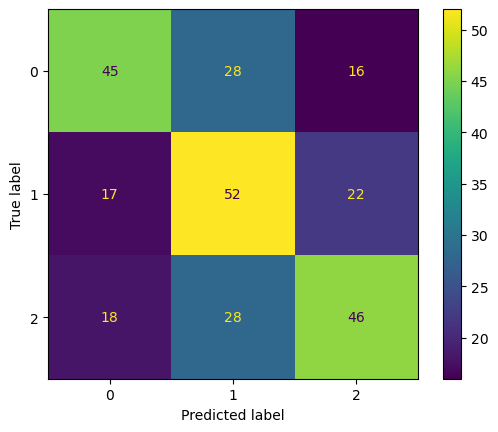

In [552]:
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=unique_labels)
plt.show()

In [553]:
#score accuracy pada data test
random_forest.score(X_test_tfidf, y_test)

0.5257352941176471

In [554]:
y_pred_rf_valid = random_forest.predict(X_valid_tfidf)

In [555]:
print(classification_report(y_valid, y_pred_rf_valid))

              precision    recall  f1-score   support

           0       0.59      0.49      0.53        90
           1       0.52      0.62      0.57        91
           2       0.54      0.53      0.54        92

    accuracy                           0.55       273
   macro avg       0.55      0.55      0.54       273
weighted avg       0.55      0.55      0.54       273



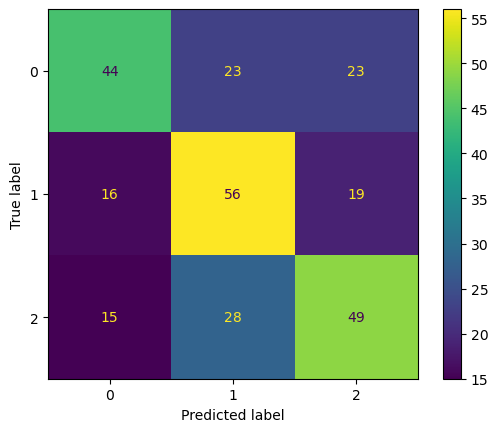

In [556]:
unique_labels = np.unique(y_valid)
ConfusionMatrixDisplay.from_predictions(y_valid, y_pred_rf_valid, display_labels=unique_labels)
plt.show()

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 11, 'criterion': 'entropy'}
Data test
              precision    recall  f1-score   support

           0       0.58      0.60      0.59        89
           1       0.56      0.63      0.59        91
           2       0.58      0.49      0.53        92

    accuracy                           0.57       272
   macro avg       0.57      0.57      0.57       272
weighted avg       0.57      0.57      0.57       272



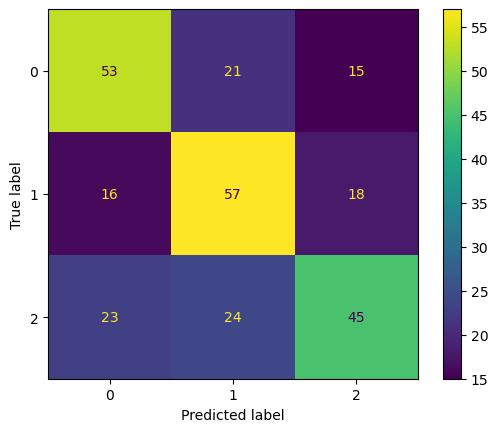

Data Valid
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        90
           1       0.59      0.68      0.63        91
           2       0.67      0.53      0.59        92

    accuracy                           0.63       273
   macro avg       0.63      0.63      0.63       273
weighted avg       0.63      0.63      0.62       273



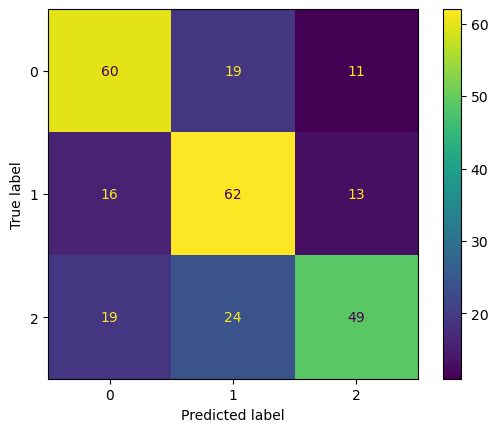

Training Data Score: 0.7283464566929134
Validation Data Score: 0.6263736263736264
Testing Data Score: 0.5698529411764706


In [557]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Parameter eksperimen
random_param = {
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'n_estimators': [50, 100, 200],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

# menggunakan randomizedsearch cv untuk cross validation
random_forestcls = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=123),
                                      param_distributions=random_param,
                                      n_iter=50,
                                      cv=5,
                                      scoring="accuracy",
                                      random_state=123)

# fit pada data train
random_forestcls.fit(X_train_tfidf, y_train)

# cek parameter terbaik
best_params = random_forestcls.best_params_
print("Best parameters found: ", best_params)

# buat model dengan definisi best params
random_forestcls_cv = RandomForestClassifier(
    max_depth=best_params["max_depth"],
    criterion=best_params["criterion"],
    n_estimators=best_params["n_estimators"],
    min_samples_leaf=best_params["min_samples_leaf"],
    min_samples_split=best_params["min_samples_split"],
    random_state=123
)

# Fit model pada data train
random_forestcls_cv.fit(X_train_tfidf, y_train)

# cek predict pada data test
print("Data test")
predict_randomcls_cv = random_forestcls_cv.predict(X_test_tfidf)
print(classification_report(y_test, predict_randomcls_cv))

# Plot confusion matrix
unique_labels = np.unique(y_test)
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels=unique_labels)
plt.show()

# cek predict pada data valid
print("Data Valid")
predict_randomcls_cv_valid = random_forestcls_cv.predict(X_valid_tfidf)
print(classification_report(y_valid, predict_randomcls_cv_valid))

# Plot confusion matrix
unique_labels = np.unique(y_valid)
ConfusionMatrixDisplay.from_predictions(y_valid, predict_randomcls_cv_valid, display_labels=unique_labels)
plt.show()

# Evaluasi model
print(f"Training Data Score: {random_forestcls_cv.score(X_train_tfidf, y_train)}")
print(f"Validation Data Score: {random_forestcls_cv.score(X_valid_tfidf, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_tfidf, y_test)}")

In [558]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [559]:
# Konversi sparse matrix ke dense array
X_train_dense = X_train_tfidf.toarray()
X_valid_dense = X_valid_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [560]:
# Membuat model
model = Sequential()
model.add(Dense(128, input_dim=X_train_tfidf.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

In [561]:
# Fit model
history = model.fit(X_train_dense, y_train_encoded,
                    validation_data=(X_valid_dense, y_valid_encoded),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
40/40 [==============================] - 2s 15ms/step - loss: 1.0983 - accuracy: 0.3441 - val_loss: 1.0977 - val_accuracy: 0.3626
Epoch 2/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0975 - accuracy: 0.3575 - val_loss: 1.0971 - val_accuracy: 0.3846
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0951 - accuracy: 0.3882 - val_loss: 1.0963 - val_accuracy: 0.3956
Epoch 4/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0927 - accuracy: 0.4142 - val_loss: 1.0952 - val_accuracy: 0.3956
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0897 - accuracy: 0.4323 - val_loss: 1.0935 - val_accuracy: 0.4322
Epoch 6/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0842 - accuracy: 0.4654 - val_loss: 1.0911 - val_accuracy: 0.4615
Epoch 7/100
40/40 [==============================] - 0s 9ms/step - loss: 1.0767 - accuracy: 0.5071 - val_loss: 1.0875 - val_accuracy: 0.4762
Epoch 8/100


9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

     negatif       0.60      0.82      0.70        89
      netral       0.66      0.62      0.64        91
     positif       0.67      0.48      0.56        92

    accuracy                           0.64       272
   macro avg       0.64      0.64      0.63       272
weighted avg       0.64      0.64      0.63       272



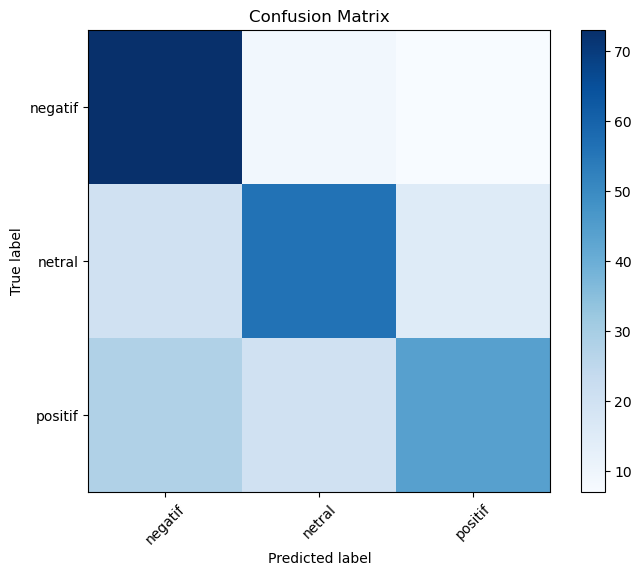

In [562]:
# evaluate model
y_pred = model.predict(X_test_dense)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

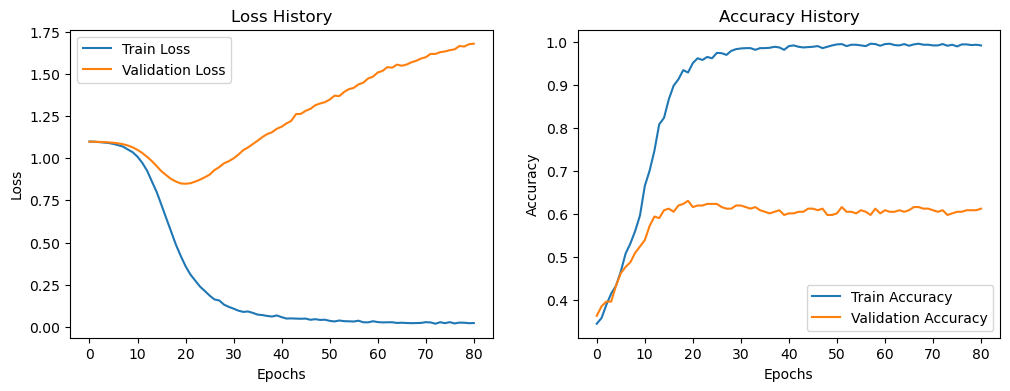

In [563]:
# Plotting loss dan accuracy
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss History')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy History')

    plt.show()

plot_history(history)

In [564]:
# cek skor accuracy train valid test
train_loss, train_accuracy = model.evaluate(X_train_dense, y_train_encoded, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_dense, y_valid_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_dense, y_test_encoded, verbose=0)

print(f"Training Data Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Data Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Testing Data Accuracy: {test_accuracy * 100:.2f}%")

Training Data Accuracy: 97.72%
Validation Data Accuracy: 61.54%
Testing Data Accuracy: 63.60%


In [565]:
# save model
model_path = 'model/best_model_tfidf_non_stemming.h5'
model.save(model_path)

### TFIDF LSTM

In [566]:
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [567]:
# LSTM (timesteps = 1)
X_train_lstm = np.expand_dims(X_train_dense, axis=1)
X_valid_lstm = np.expand_dims(X_valid_dense, axis=1)
X_test_lstm = np.expand_dims(X_test_dense, axis=1)

In [568]:
# model LSTM
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax')) 

# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),  
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

# train model
history = model.fit(X_train_lstm, y_train_encoded,
                    epochs=300,  
                    validation_data=(X_valid_lstm, y_valid_encoded),
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/300
40/40 - 3s - loss: 1.0987 - accuracy: 0.3157 - val_loss: 1.0984 - val_accuracy: 0.3480 - 3s/epoch - 76ms/step
Epoch 2/300
40/40 - 1s - loss: 1.0987 - accuracy: 0.3331 - val_loss: 1.0983 - val_accuracy: 0.3553 - 953ms/epoch - 24ms/step
Epoch 3/300
40/40 - 1s - loss: 1.0984 - accuracy: 0.3449 - val_loss: 1.0982 - val_accuracy: 0.3810 - 969ms/epoch - 24ms/step
Epoch 4/300
40/40 - 1s - loss: 1.0980 - accuracy: 0.3339 - val_loss: 1.0981 - val_accuracy: 0.3626 - 975ms/epoch - 24ms/step
Epoch 5/300
40/40 - 1s - loss: 1.0979 - accuracy: 0.3386 - val_loss: 1.0979 - val_accuracy: 0.3919 - 972ms/epoch - 24ms/step
Epoch 6/300
40/40 - 1s - loss: 1.0974 - accuracy: 0.3693 - val_loss: 1.0976 - val_accuracy: 0.3993 - 975ms/epoch - 24ms/step
Epoch 7/300
40/40 - 1s - loss: 1.0970 - accuracy: 0.3685 - val_loss: 1.0972 - val_accuracy: 0.4029 - 971ms/epoch - 24ms/step
Epoch 8/300
40/40 - 1s - loss: 1.0964 - accuracy: 0.3701 - val_loss: 1.0967 - val_accuracy: 0.4029 - 977ms/epoch - 24ms/step
Epo

9/9 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

     negatif       0.61      0.75      0.67        89
      netral       0.67      0.58      0.62        91
     positif       0.59      0.53      0.56        92

    accuracy                           0.62       272
   macro avg       0.62      0.62      0.62       272
weighted avg       0.62      0.62      0.62       272



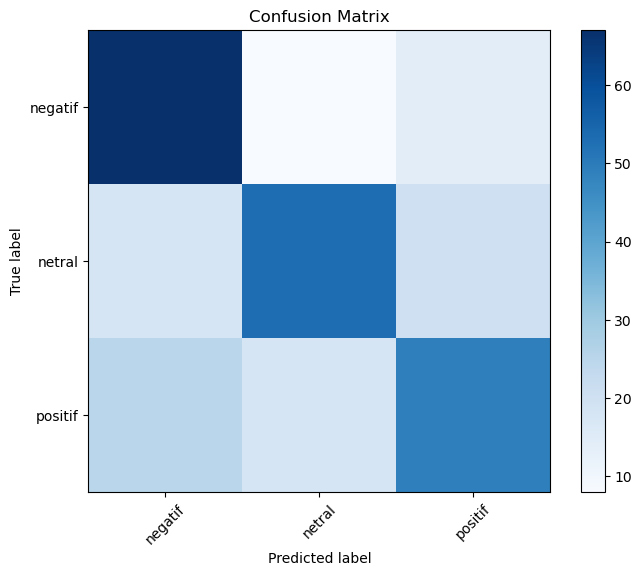

In [569]:
# Evaluasi model pada data test
y_pred = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

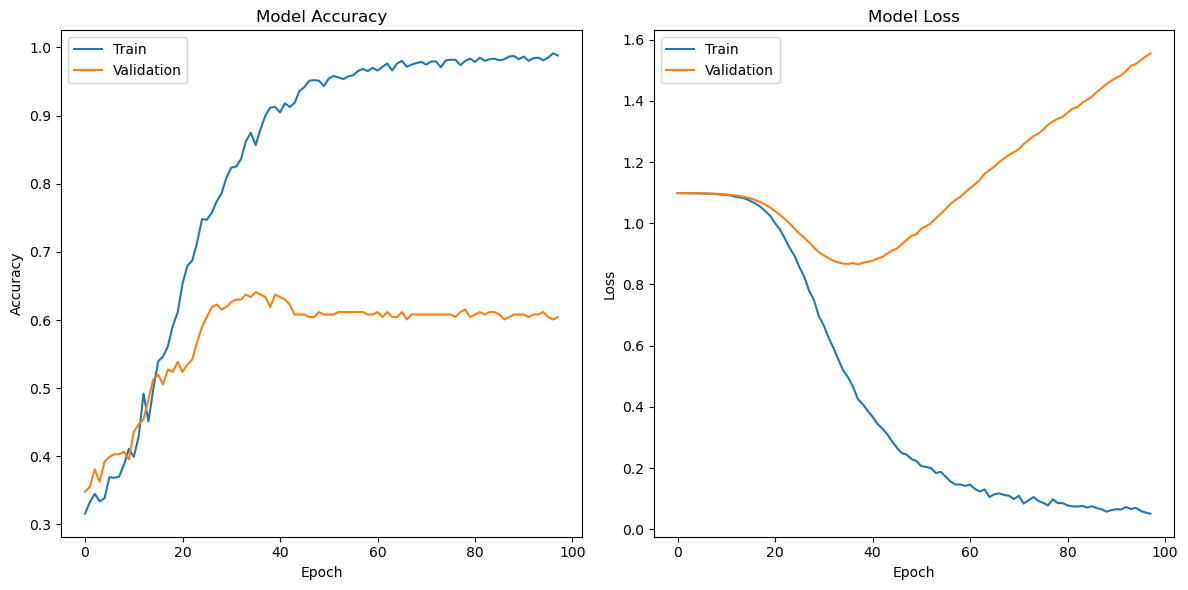

In [570]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [571]:
# Evaluate Accuracy
train_loss, train_accuracy = model.evaluate(X_train_lstm, y_train_encoded, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_lstm, y_valid_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_encoded, verbose=0)

print(f"Training Data Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Data Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Testing Data Accuracy: {test_accuracy * 100:.2f}%")

Training Data Accuracy: 96.93%
Validation Data Accuracy: 63.37%
Testing Data Accuracy: 62.13%


In [ ]:
#model.save('model/best_lstm_model_nonstemm.h5')

## TFIDF BiLSTM

In [572]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

In [573]:
# model BiLSTM
model = Sequential()
model.add(Bidirectional(LSTM(128, activation='relu'), input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train_encoded)), activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

# train model
history = model.fit(X_train_lstm, y_train_encoded,
                    epochs=300,
                    validation_data=(X_valid_lstm, y_valid_encoded),
                    callbacks=[early_stopping],
                    verbose=2)

Epoch 1/300
40/40 - 5s - loss: 1.0988 - accuracy: 0.3268 - val_loss: 1.0984 - val_accuracy: 0.3443 - 5s/epoch - 122ms/step
Epoch 2/300
40/40 - 2s - loss: 1.0987 - accuracy: 0.3165 - val_loss: 1.0983 - val_accuracy: 0.3810 - 2s/epoch - 43ms/step
Epoch 3/300
40/40 - 2s - loss: 1.0978 - accuracy: 0.4024 - val_loss: 1.0982 - val_accuracy: 0.4249 - 2s/epoch - 43ms/step
Epoch 4/300
40/40 - 2s - loss: 1.0975 - accuracy: 0.3898 - val_loss: 1.0980 - val_accuracy: 0.4212 - 2s/epoch - 42ms/step
Epoch 5/300
40/40 - 2s - loss: 1.0969 - accuracy: 0.4000 - val_loss: 1.0976 - val_accuracy: 0.4615 - 2s/epoch - 44ms/step
Epoch 6/300
40/40 - 2s - loss: 1.0962 - accuracy: 0.4299 - val_loss: 1.0972 - val_accuracy: 0.4615 - 2s/epoch - 44ms/step
Epoch 7/300
40/40 - 2s - loss: 1.0954 - accuracy: 0.4283 - val_loss: 1.0966 - val_accuracy: 0.5055 - 2s/epoch - 54ms/step
Epoch 8/300
40/40 - 2s - loss: 1.0944 - accuracy: 0.4205 - val_loss: 1.0958 - val_accuracy: 0.4542 - 2s/epoch - 55ms/step
Epoch 9/300
40/40 - 3s 

9/9 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

     negatif       0.58      0.78      0.67        89
      netral       0.66      0.54      0.59        91
     positif       0.61      0.53      0.57        92

    accuracy                           0.61       272
   macro avg       0.62      0.62      0.61       272
weighted avg       0.62      0.61      0.61       272



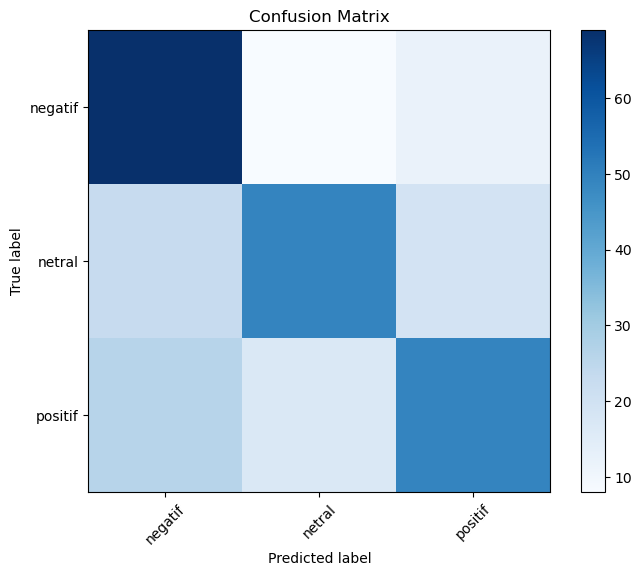

In [574]:
# Evaluasi model pada data test
y_pred = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification Report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

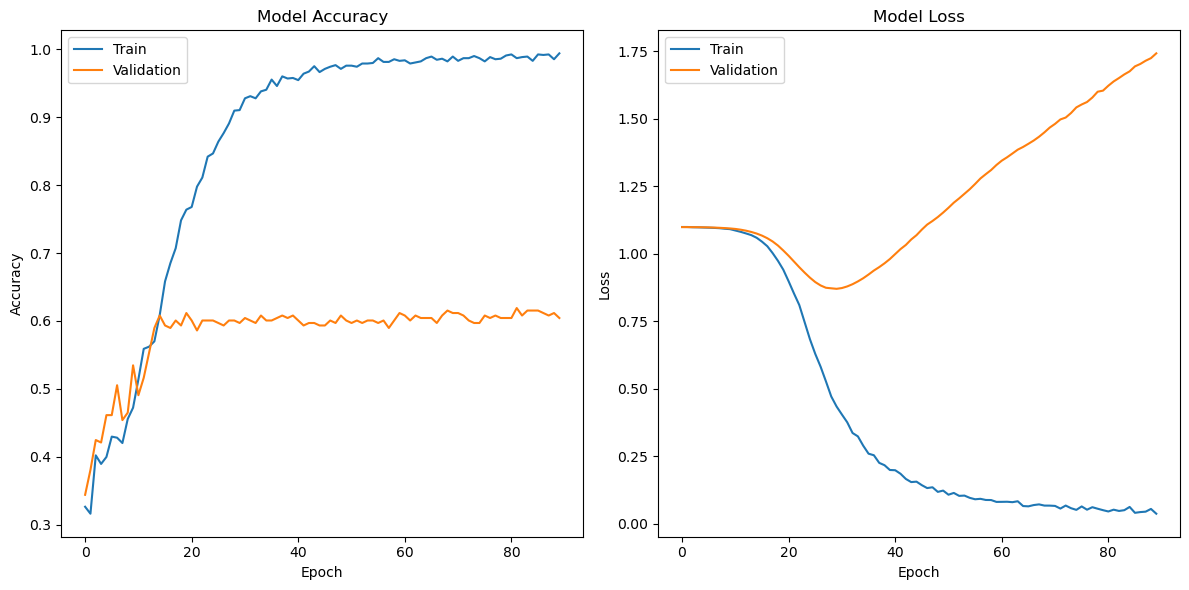

In [575]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [576]:
# Evaluasi accuracy train valid test
train_loss, train_accuracy = model.evaluate(X_train_lstm, y_train_encoded, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_lstm, y_valid_encoded, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test_encoded, verbose=0)

print(f"Training Data Accuracy: {train_accuracy * 100:.2f}%")
print(f"Validation Data Accuracy: {valid_accuracy * 100:.2f}%")
print(f"Testing Data Accuracy: {test_accuracy * 100:.2f}%")

Training Data Accuracy: 97.64%
Validation Data Accuracy: 59.71%
Testing Data Accuracy: 61.40%


In [ ]:
model.save('model/best_bilstm_model_nonstemm.h5')

## Word2Vec

## Skip Gram

In [577]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Pastikan Anda sudah mendownload tokenizer NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [578]:
# read data dari file CSV
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [579]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [580]:
X_train_clean = X_train['tweet_non_stopwords']
X_valid_clean = X_valid['tweet_non_stopwords']
X_test_clean = X_test['tweet_non_stopwords']

In [581]:
# Tokenisasi dan Padding
max_words = 1000
max_len = 150

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_clean)

X_train_sequences = tokenizer.texts_to_sequences(X_train_clean)
X_valid_sequences = tokenizer.texts_to_sequences(X_valid_clean)
X_test_sequences = tokenizer.texts_to_sequences(X_test_clean)

X_train_pad = pad_sequences(X_train_sequences, maxlen=max_len)
X_valid_pad = pad_sequences(X_valid_sequences, maxlen=max_len)
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_len)

In [582]:
# Tokenisasi data untuk Word2Vec
all_sentences = [word_tokenize(text) for text in X_train_clean]

# Training model Word2Vec dengan data train
word2vec_model = Word2Vec(vector_size=300, window=3, min_count=1, sg=1, workers=3)
word2vec_model.build_vocab(all_sentences)
word2vec_model.train(all_sentences, total_examples=word2vec_model.corpus_count, epochs=50)

(804078, 967000)

In [583]:
#  embedding matrix dari Word2Vec model
vocab_size = len(tokenizer.word_index) + 1  
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

In [584]:
# Membuat model RNN dengan LSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [585]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train model
history = model.fit(X_train_pad, to_categorical(y_train),
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_valid_pad, to_categorical(y_valid)),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 300)          1595400   
                                                                 
 bidirectional_2 (Bidirectio  (None, 150, 128)         186880    
 nal)                                                            
                                                                 
 dropout_39 (Dropout)        (None, 150, 128)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_46 (Dense)            (None, 256)               33024     
                                                                 
 dropout_40 (Dropout)        (None, 256)             

In [586]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_pad, to_categorical(y_test))
print(f'Test Accuracy: {accuracy:.4f}')

9/9 [==============================] - 1s 142ms/step - loss: 0.9065 - accuracy: 0.5772
Test Accuracy: 0.5772


In [587]:
# Prediksi pada data test
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)

# Classification Report dan Confusion Matrix
print(classification_report(y_test, y_pred))

9/9 [==============================] - 4s 82ms/step
              precision    recall  f1-score   support

           0       0.53      0.80      0.64        89
           1       0.66      0.46      0.54        91
           2       0.59      0.48      0.53        92

    accuracy                           0.58       272
   macro avg       0.59      0.58      0.57       272
weighted avg       0.59      0.58      0.57       272



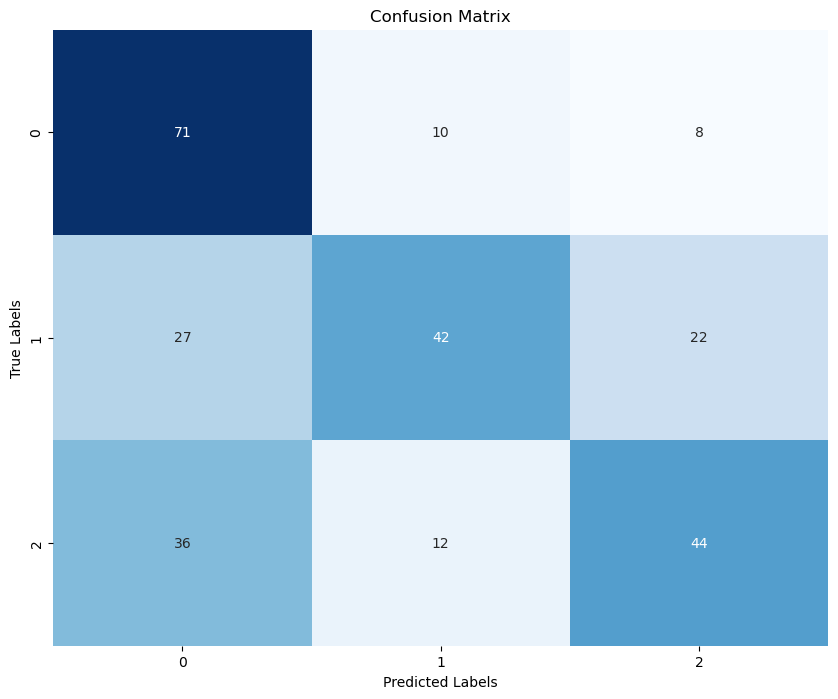

In [588]:
cm = confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

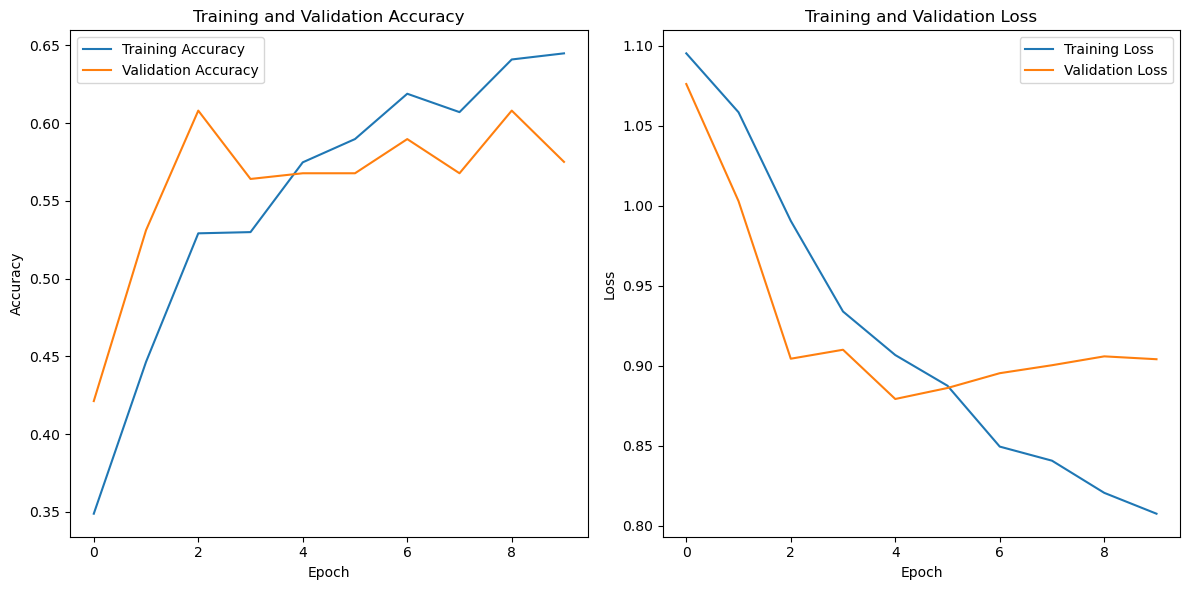

In [589]:
# Visualisasi history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [590]:
#  model RNN dengan BiLSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train model
history = model.fit(X_train_pad, to_categorical(y_train),
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_valid_pad, to_categorical(y_valid)),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 300)          1595400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 150, 128)         186880    
 nal)                                                            
                                                                 
 dropout_42 (Dropout)        (None, 150, 128)          0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dropout_43 (Dropout)        (None, 128)             

In [591]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_pad, to_categorical(y_test))
print(f'Test Accuracy: {accuracy:.4f}')

# Prediksi pada data test
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)

# Classification Report dan Confusion Matrix
print(classification_report(y_test, y_pred))

9/9 [==============================] - 1s 134ms/step - loss: 0.9516 - accuracy: 0.5478
Test Accuracy: 0.5478
9/9 [==============================] - 3s 103ms/step
              precision    recall  f1-score   support

           0       0.50      0.85      0.63        89
           1       0.69      0.38      0.49        91
           2       0.54      0.41      0.47        92

    accuracy                           0.55       272
   macro avg       0.58      0.55      0.53       272
weighted avg       0.58      0.55      0.53       272



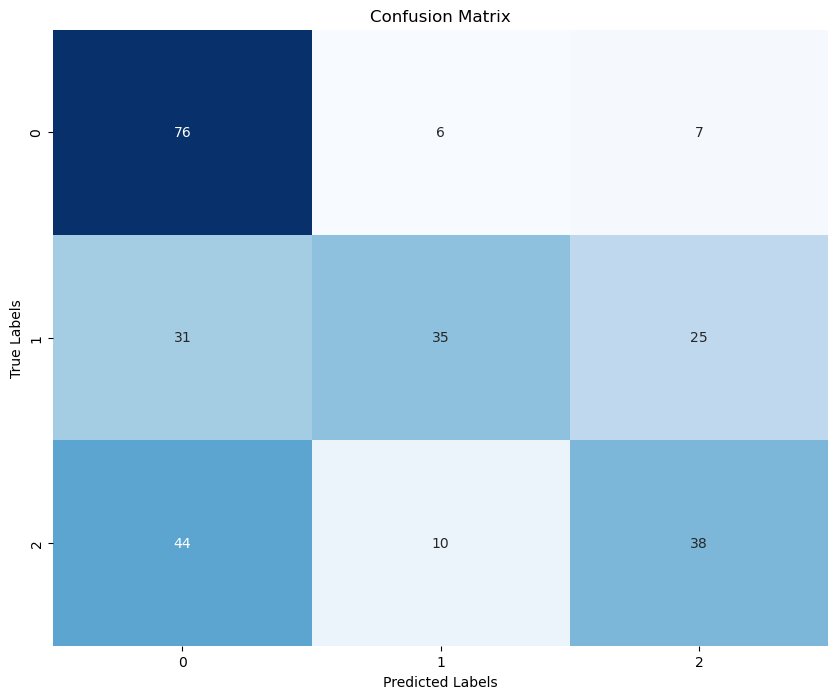

In [592]:
cm = confusion_matrix(y_test, y_pred)
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

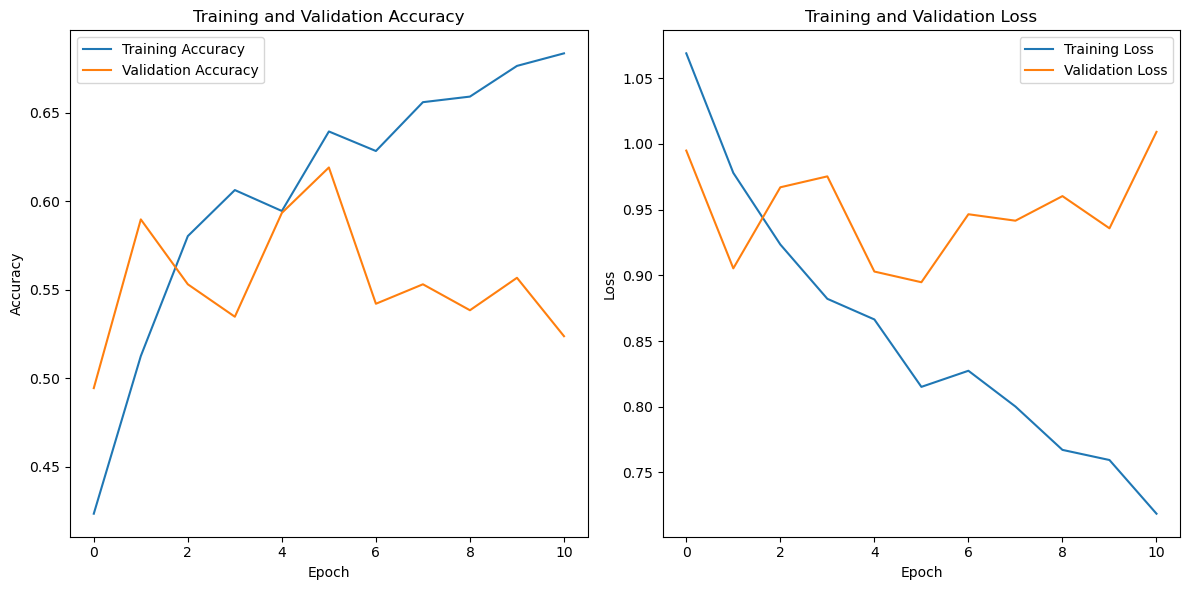

In [593]:
# Visualisasi history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [594]:
# Membuat model RNN dengan GRU
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=300, input_length=max_len, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(GRU(64, return_sequences=True)))  
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(64)))  
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train model
history = model.fit(X_train_pad, to_categorical(y_train),
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_valid_pad, to_categorical(y_valid)),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 300)          1595400   
                                                                 
 bidirectional_6 (Bidirectio  (None, 150, 128)         140544    
 nal)                                                            
                                                                 
 dropout_45 (Dropout)        (None, 150, 128)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dense_52 (Dense)            (None, 256)               33024     
                                                                 
 dropout_46 (Dropout)        (None, 256)             

In [595]:
# Evaluasi model pada data test
loss, accuracy = model.evaluate(X_test_pad, to_categorical(y_test))
print(f'Test Accuracy: {accuracy:.4f}')

9/9 [==============================] - 2s 234ms/step - loss: 0.9447 - accuracy: 0.5184
Test Accuracy: 0.5184


In [596]:
# Prediksi pada data test
y_pred = np.argmax(model.predict(X_test_pad), axis=-1)

# Classification Report dan Confusion Matrix
print(classification_report(y_test, y_pred))

9/9 [==============================] - 4s 184ms/step
              precision    recall  f1-score   support

           0       0.51      0.71      0.59        89
           1       0.53      0.48      0.51        91
           2       0.52      0.37      0.43        92

    accuracy                           0.52       272
   macro avg       0.52      0.52      0.51       272
weighted avg       0.52      0.52      0.51       272



[[63 17  9]
 [24 44 23]
 [36 22 34]]


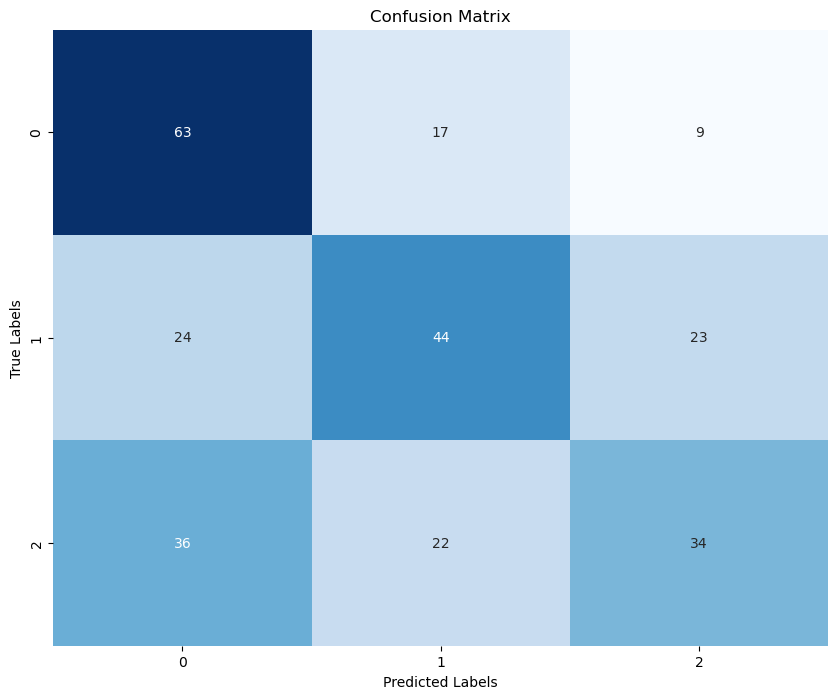

In [597]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


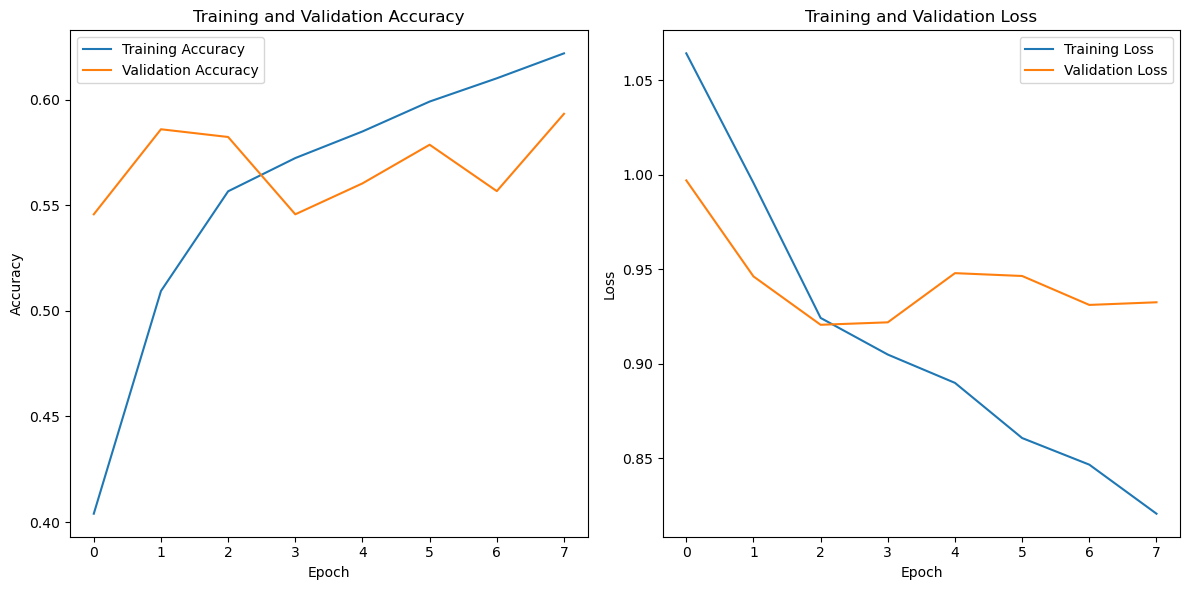

In [598]:
# Visualisasi history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## CBOW

In [601]:
# read data dari file CSV
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [603]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [604]:
X_train_clean = X_train['tweet_non_stopwords']
X_valid_clean = X_valid['tweet_non_stopwords']
X_test_clean = X_test['tweet_non_stopwords']

In [605]:
# Preprocess label into one-hot-encoder format
y_train_encoder = to_categorical(y_train)
y_valid_encoder = to_categorical(y_valid)
y_test_encoder = to_categorical(y_test)

In [606]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, GRU, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import gensim
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, LSTM, Dense, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [607]:
# conversi teks ke sequence
max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
#tok = Tokenizer()
tok.fit_on_texts(X_train_clean)
sequences = tok.texts_to_sequences(X_train_clean)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
valid_sequences = tok.texts_to_sequences(X_valid_clean)
valid_sequences_matrix = pad_sequences(valid_sequences, maxlen=max_len)

In [608]:
# WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 3

In [609]:
clean_data = X_train_clean.apply(gensim.utils.simple_preprocess)

In [610]:
clean_data

0       [lihat, jokowi, prabowo, chillipari, sandiuno,...
1       [scope, berpikir, jokowi, tekankan, main, game...
2       [prabowo, sandi, menyerahkan, gajinya, anak, y...
3       [mbak, ekonomi, ditopik, jokowi, ekonomi, makr...
4       [dhe, jokowi, perbedaan, keragaman, kebhinekaa...
                              ...                        
1265    [terima, kasih, iya, allah, skenario, mu, agun...
1266    [sandi, ya, tidak, mengambil, gajinya, ya, men...
1267    [demokrat, prabowo, hargai, kontribusi, presid...
1268    [pancasila, harga, mati, bravo, presiden, jokowi]
1269                  [sandiuno, prabowo, gajinya, kirim]
Name: tweet_non_stopwords, Length: 1270, dtype: object

In [611]:
model_cbow = Word2Vec(clean_data, vector_size= W2V_SIZE, min_count=W2V_MIN_COUNT, workers=8, window = W2V_WINDOW, sg = 0)

In [612]:
model_cbow.build_vocab(clean_data, progress_per=1000)
model_cbow.train(clean_data, total_examples=model_cbow.corpus_count, epochs=W2V_EPOCH)

(333506, 604224)

In [613]:
model_cbow.wv.most_similar("jokowi")

[('perekonomian', 0.977384626865387),
 ('pembangunan', 0.9641277194023132),
 ('menuding', 0.9556882381439209),
 ('bowo', 0.9416153430938721),
 ('khusus', 0.9364551305770874),
 ('kondisi', 0.9322530031204224),
 ('terlepas', 0.9319336414337158),
 ('dengerlah', 0.9307903051376343),
 ('arahnya', 0.9265117645263672),
 ('bertumpu', 0.9258384108543396)]

In [614]:
vocab_size = len(tok.word_index) + 1

In [615]:
print("Total words", vocab_size)

Total words 5318


In [616]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tok.word_index.items():
  if word in model_cbow.wv:
    embedding_matrix[i] = model_cbow.wv[word]
print(embedding_matrix.shape)

(5318, 300)


In [617]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=300, trainable=False)

In [618]:
# define RNN
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = embedding_layer
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [619]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.0001), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 300)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 300, 50)           50000     
                                                                 
 lstm_11 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout_48 (Dropout)        (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 771   

In [620]:
history = model.fit(sequences_matrix, y_train_encoder,batch_size=64, epochs=100,
          validation_data=(valid_sequences_matrix, y_valid_encoder), callbacks=[EarlyStopping(monitor='val_loss', min_delta=0.0001)])

Epoch 1/100
20/20 [==============================] - 6s 204ms/step - loss: 1.0981 - accuracy: 0.3614 - val_loss: 1.0983 - val_accuracy: 0.3553
Epoch 2/100
20/20 [==============================] - 4s 215ms/step - loss: 1.0977 - accuracy: 0.3835 - val_loss: 1.0978 - val_accuracy: 0.3663
Epoch 3/100
20/20 [==============================] - 5s 281ms/step - loss: 1.0972 - accuracy: 0.4000 - val_loss: 1.0973 - val_accuracy: 0.3736
Epoch 4/100
20/20 [==============================] - 5s 265ms/step - loss: 1.0968 - accuracy: 0.4142 - val_loss: 1.0968 - val_accuracy: 0.3810
Epoch 5/100
20/20 [==============================] - 5s 239ms/step - loss: 1.0959 - accuracy: 0.4386 - val_loss: 1.0962 - val_accuracy: 0.3700
Epoch 6/100
20/20 [==============================] - 6s 309ms/step - loss: 1.0953 - accuracy: 0.4402 - val_loss: 1.0955 - val_accuracy: 0.3773
Epoch 7/100
20/20 [==============================] - 6s 321ms/step - loss: 1.0946 - accuracy: 0.4425 - val_loss: 1.0947 - val_accuracy: 0.3883

In [621]:
test_sequences = tok.texts_to_sequences(X_test_clean)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [622]:
accr = model.evaluate(test_sequences_matrix, y_test_encoder)

9/9 [==============================] - 1s 77ms/step - loss: 0.9340 - accuracy: 0.5699


In [623]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.934
  Accuracy: 0.570


In [624]:
y_prediction = model.predict(test_sequences_matrix)

9/9 [==============================] - 1s 69ms/step


In [625]:
y_prediction

array([[0.36055487, 0.43930924, 0.20013595],
       [0.21192205, 0.20843911, 0.57963884],
       [0.21883072, 0.6118955 , 0.16927375],
       [0.25464305, 0.5018057 , 0.24355127],
       [0.43891862, 0.40677953, 0.15430187],
       [0.70599663, 0.07155687, 0.22244656],
       [0.35326973, 0.33565977, 0.31107053],
       [0.24572536, 0.288816  , 0.46545863],
       [0.13920411, 0.58397454, 0.27682132],
       [0.16537102, 0.550072  , 0.28455693],
       [0.40478602, 0.358124  , 0.23709002],
       [0.14583167, 0.22884752, 0.6253208 ],
       [0.9274146 , 0.01316235, 0.05942305],
       [0.5374138 , 0.15222201, 0.31036428],
       [0.19988626, 0.26745355, 0.5326601 ],
       [0.41479105, 0.36043674, 0.22477221],
       [0.15567593, 0.64886653, 0.19545758],
       [0.6017847 , 0.10113288, 0.29708242],
       [0.5251129 , 0.13999943, 0.3348876 ],
       [0.344706  , 0.37579113, 0.2795028 ],
       [0.13571987, 0.7289998 , 0.13528028],
       [0.20469613, 0.27207085, 0.52323306],
       [0.

In [626]:
from numpy import argmax
y_pred=argmax(y_prediction, axis=1)

In [627]:
y_test=argmax(y_test_encoder, axis=1)

In [628]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.53      0.58        89
           1       0.51      0.81      0.63        91
           2       0.62      0.37      0.46        92

    accuracy                           0.57       272
   macro avg       0.59      0.57      0.56       272
weighted avg       0.59      0.57      0.56       272



In [629]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[47 32 10]
 [ 6 74 11]
 [20 38 34]]


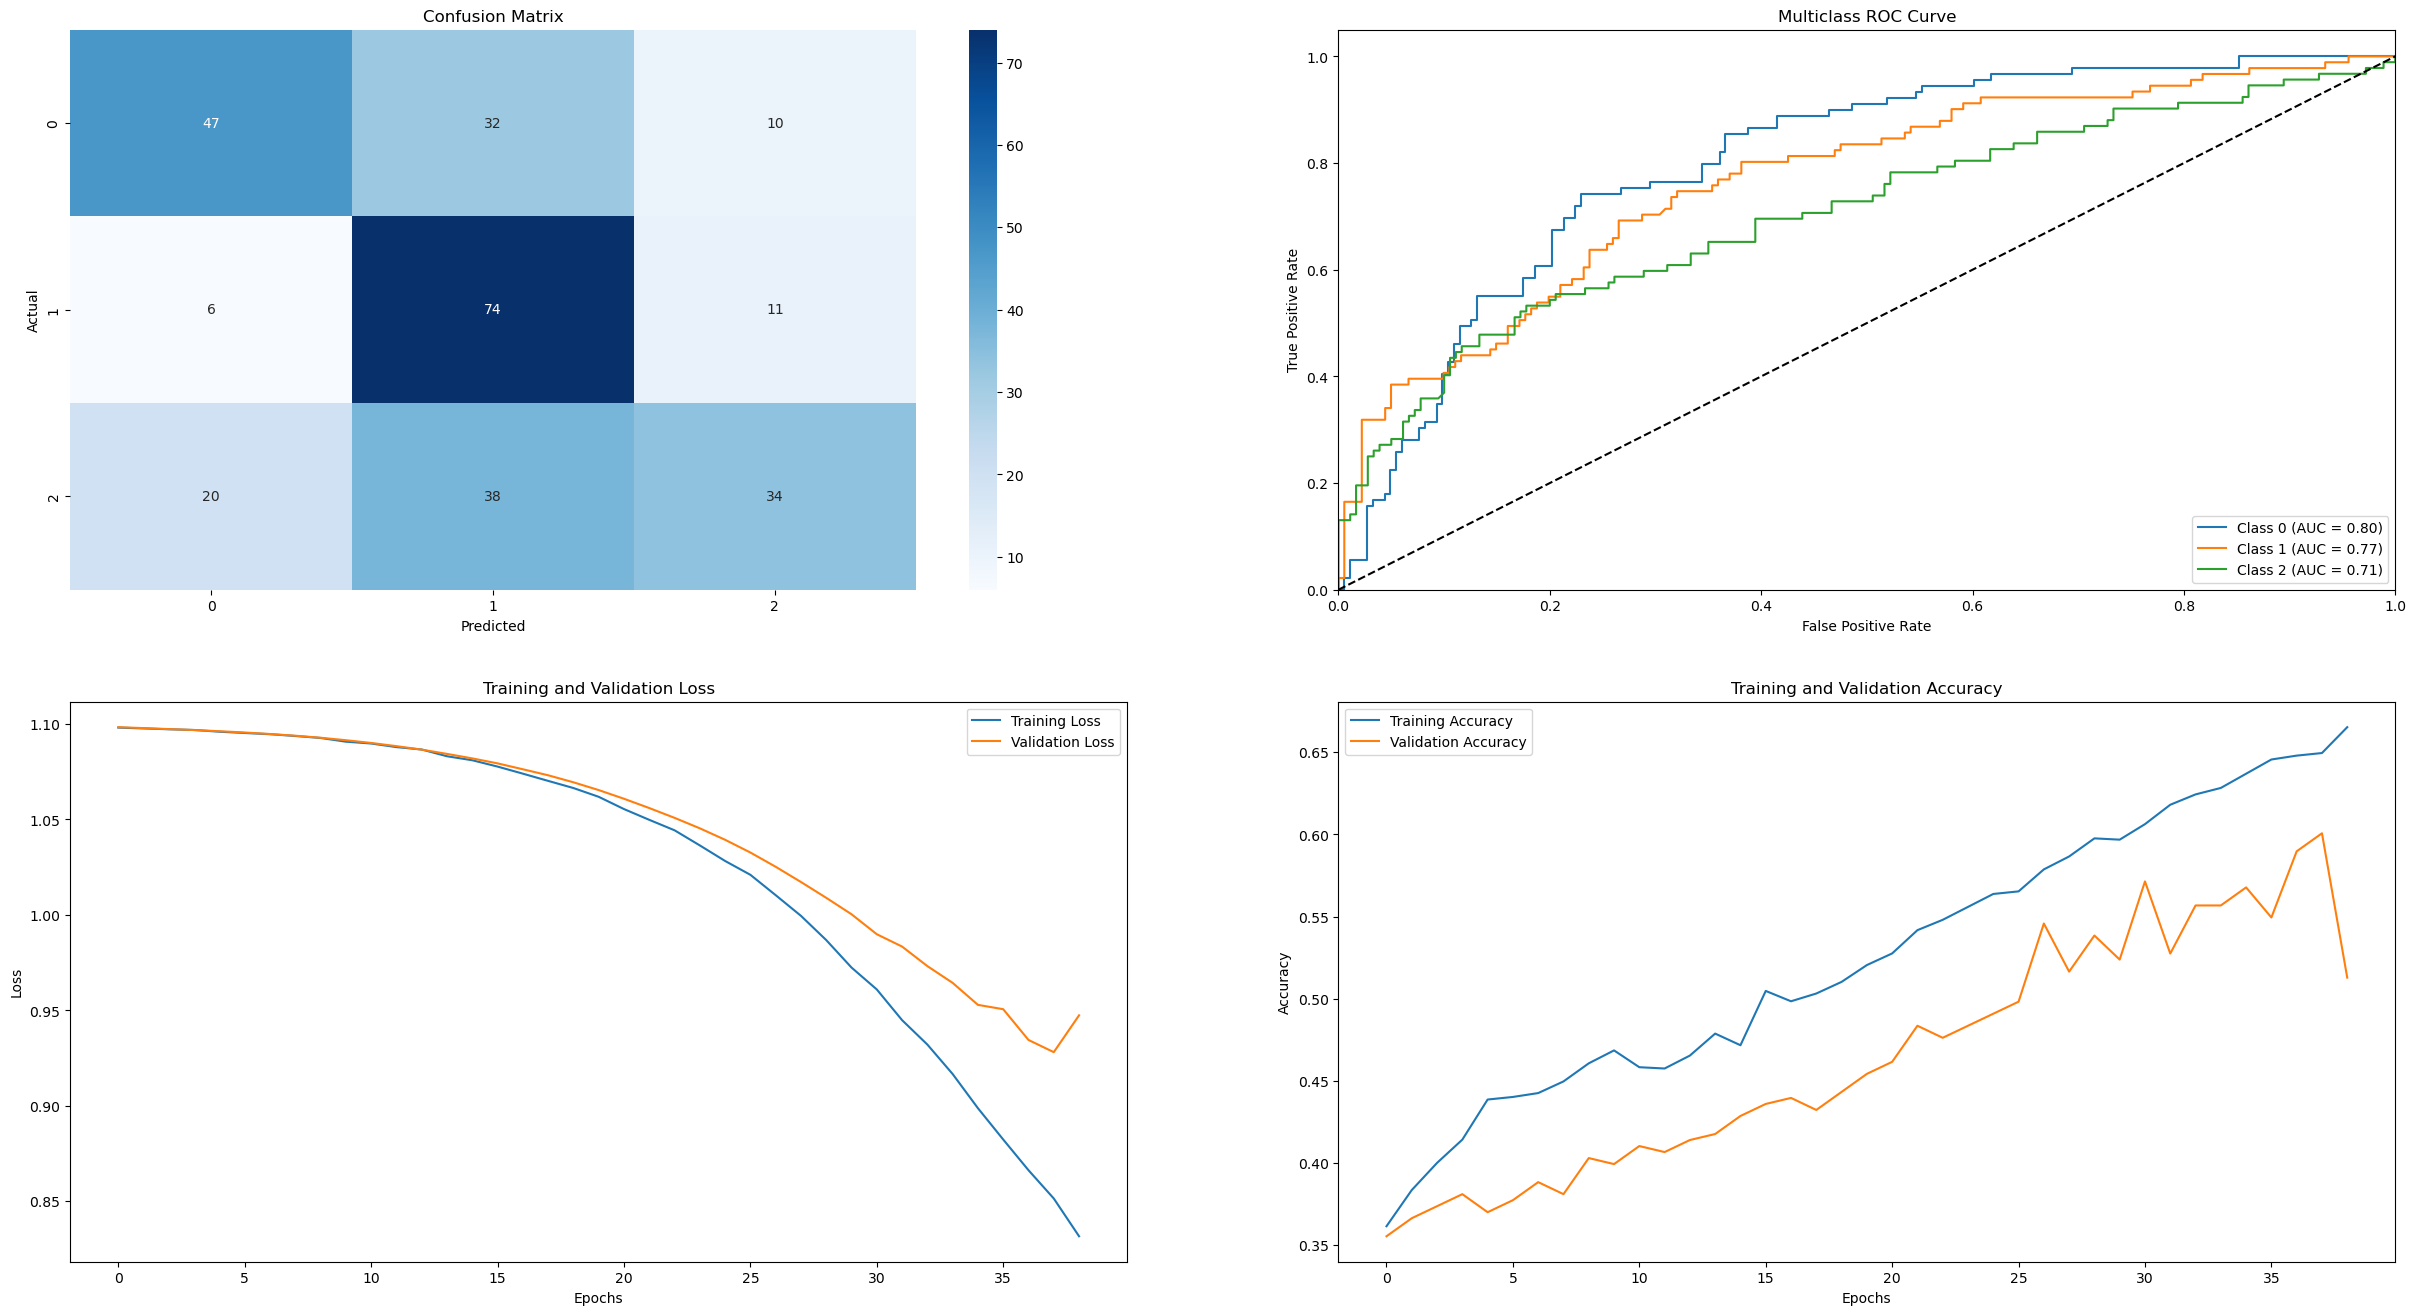

<Figure size 800x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [630]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
# Visualize confusion matrix
fig, axs= plt.subplots(2,2, figsize=(30,16))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0,0])
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')
axs[0,0].set_title('Confusion Matrix')

# Visualize ROC AUC
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(y_prediction[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoder[:, i], y_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_prediction[0])):
    axs[0,1].plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

axs[0,1].plot([0, 1], [0, 1], 'k--') 
axs[0,1].set_xlim([0.0, 1.0])
axs[0,1].set_ylim([0.0, 1.05])
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')
axs[0,1].set_title('Multiclass ROC Curve')
axs[0,1].legend(loc="lower right")

# Visualize training history - Loss
axs[1,0].plot(history.history['loss'], label='Training Loss')
axs[1,0].plot(history.history['val_loss'], label='Validation Loss')
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('Training and Validation Loss')
axs[1,0].legend()

# Visualize training history - Accuracy
plt.figure(figsize=(12, 8))
axs[1,1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1,1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Training and Validation Accuracy')
axs[1,1].legend()

plt.show()

In [631]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(256,name='FC1', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 300)          1595400   
                                                                 
 dropout_49 (Dropout)        (None, 300, 300)          0         
                                                                 
 lstm_12 (LSTM)              (None, 100)               160400    
                                                                 
 FC1 (Dense)                 (None, 256)               25856     
                                                                 
 dropout_50 (Dropout)        (None, 256)               0         
                                                                 
 dense_55 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,782,427
Trainable params: 187,027
Non

In [632]:
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [633]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='accuracy', min_delta=1e-4, patience=5)]

In [634]:
history = model.fit(sequences_matrix, y_train_encoder,
                    batch_size=128,
                    epochs=100,
                    validation_data=(valid_sequences_matrix, y_valid_encoder),
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/100
10/10 [==============================] - 83s 8s/step - loss: 1.0813 - accuracy: 0.3795 - val_loss: 1.0393 - val_accuracy: 0.4505 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 99s 10s/step - loss: 1.0439 - accuracy: 0.4598 - val_loss: 1.0067 - val_accuracy: 0.4835 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 175s 18s/step - loss: 1.0122 - accuracy: 0.4906 - val_loss: 0.9749 - val_accuracy: 0.5201 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 177s 18s/step - loss: 0.9827 - accuracy: 0.5000 - val_loss: 0.9694 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 178s 18s/step - loss: 0.9719 - accuracy: 0.5024 - val_loss: 0.9555 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 180s 18s/step - loss: 0.9720 - accuracy: 0.5276 - val_loss: 0.9675 - val_accuracy: 0.5238 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 181s 18s/step 

In [635]:
test_sequences = tok.texts_to_sequences(X_test_clean)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

In [636]:
y_prediction = model.predict(test_sequences_matrix)

9/9 [==============================] - 9s 1s/step


In [637]:
y_pred=argmax(y_prediction, axis=1)

In [638]:
y_test=argmax(y_test_encoder, axis=1)

In [639]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.66      0.57        89
           1       0.62      0.51      0.56        91
           2       0.51      0.45      0.48        92

    accuracy                           0.54       272
   macro avg       0.54      0.54      0.53       272
weighted avg       0.54      0.54      0.53       272



In [640]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[59 11 19]
 [25 46 20]
 [34 17 41]]


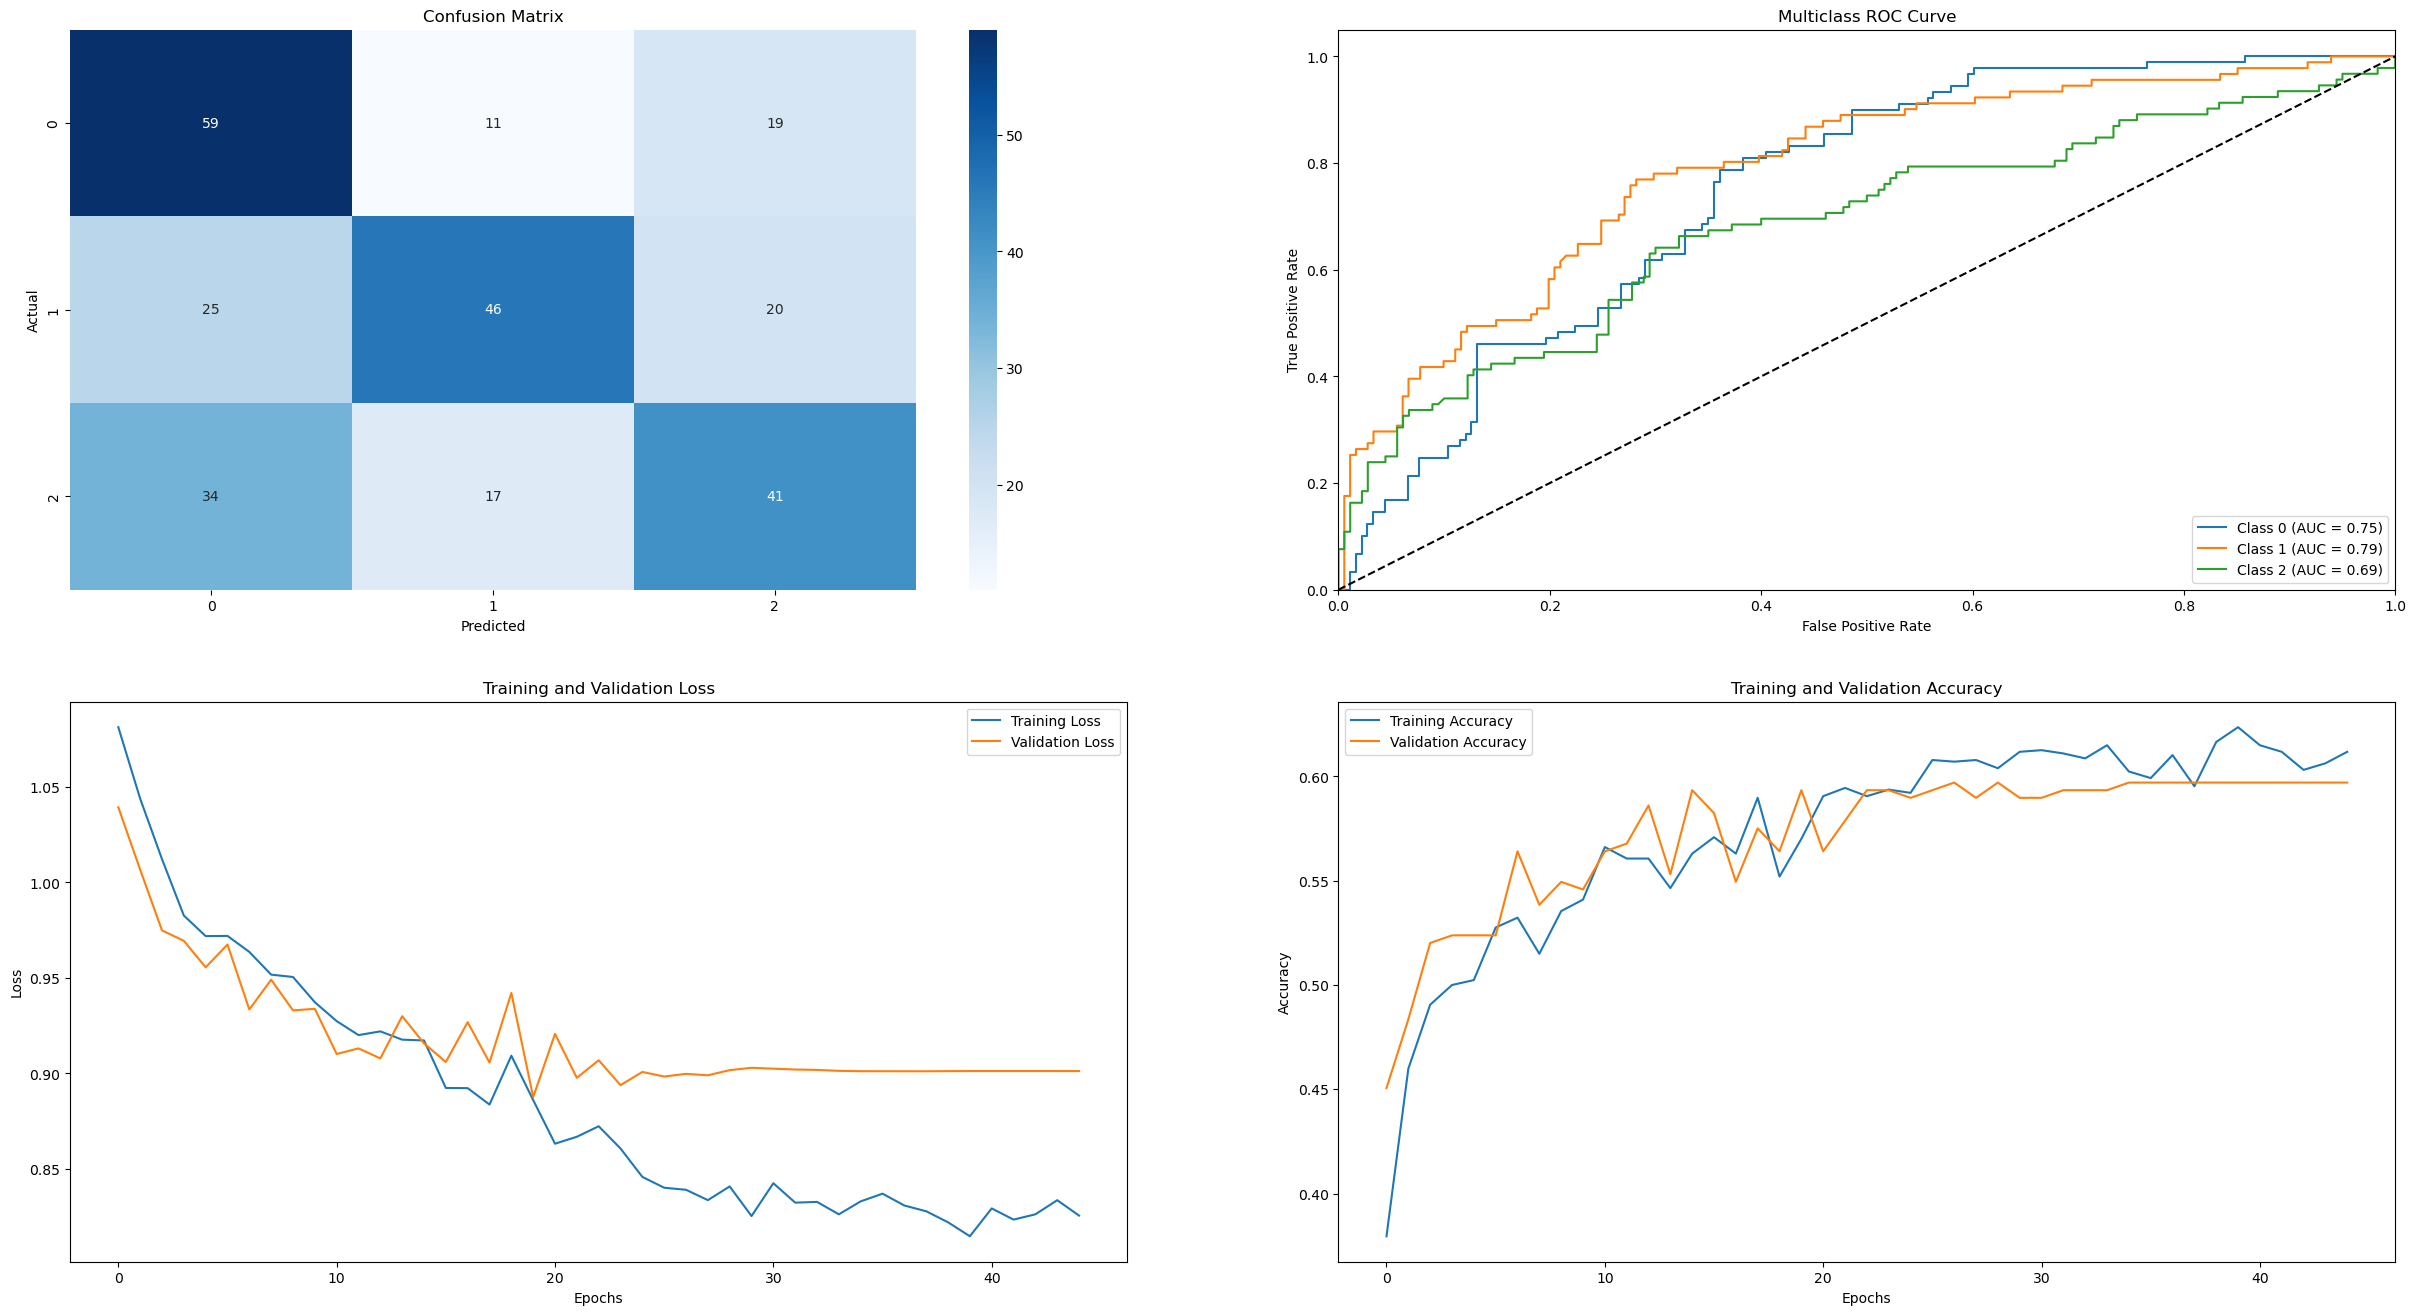

<Figure size 800x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [641]:
# Visualize confusion matrix
fig, axs= plt.subplots(2,2, figsize=(30,16))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0,0])
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')
axs[0,0].set_title('Confusion Matrix')

# Visualize ROC AUC
# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(y_prediction[0])):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoder[:, i], y_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(y_prediction[0])):
    axs[0,1].plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

axs[0,1].plot([0, 1], [0, 1], 'k--') 
axs[0,1].set_xlim([0.0, 1.0])
axs[0,1].set_ylim([0.0, 1.05])
axs[0,1].set_xlabel('False Positive Rate')
axs[0,1].set_ylabel('True Positive Rate')
axs[0,1].set_title('Multiclass ROC Curve')
axs[0,1].legend(loc="lower right")

# Visualize training history - Loss
axs[1,0].plot(history.history['loss'], label='Training Loss')
axs[1,0].plot(history.history['val_loss'], label='Validation Loss')
axs[1,0].set_xlabel('Epochs')
axs[1,0].set_ylabel('Loss')
axs[1,0].set_title('Training and Validation Loss')
axs[1,0].legend()

# Visualize training history - Accuracy
plt.figure(figsize=(12, 8))
axs[1,1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1,1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1,1].set_xlabel('Epochs')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_title('Training and Validation Accuracy')
axs[1,1].legend()

plt.show()

## FastText

In [642]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from gensim.models.fasttext import load_facebook_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer

In [643]:
# read data dari file CSV
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [644]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [645]:
X_train_clean = X_train['tweet_non_stopwords']
X_valid_clean = X_valid['tweet_non_stopwords']
X_test_clean = X_test['tweet_non_stopwords']

In [646]:
# Preprocess label into one-hot-encoder format
y_train_encoder = to_categorical(y_train)
y_valid_encoder = to_categorical(y_valid)
y_test_encoder = to_categorical(y_test)

In [647]:
import gensim
from gensim.models.fasttext import load_facebook_model
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load pre-trained FastText model
model_path = 'cc.id.300.bin'
ft_model = load_facebook_model(model_path)

# Function to vectorize sentences using FastText
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# vectorize sentences using FastText
X_train_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_train_clean])
X_valid_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_valid_clean])
X_test_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_test_clean])

# Preprocess label into one-hot-encoder format
y_train_encoder = to_categorical(y_train)
y_valid_encoder = to_categorical(y_valid)
y_test_encoder = to_categorical(y_test)

In [648]:
# Create LSTM model with FastText vectors
def create_model_lstm_fasttext(input_dim=300, n_units_lstm=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoder.shape[1], activation='softmax'))  
    return model

# Configure defined model
model = create_model_lstm_fasttext(input_dim=300)

# Compile model with hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Overview architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Training model
history = model.fit(X_train_vectors, y_train_encoder,
                    batch_size=32, epochs=200,
                    validation_data=(X_valid_vectors, y_valid_encoder),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 128)               38528     
                                                                 
 dropout_51 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dropout_52 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 3)                 195       
                                                                 
Total params: 46,979
Trainable params: 46,979
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
40/40 - 3s - loss: 1.0949 - accuracy:

In [649]:
# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(X_train_vectors, y_train_encoder, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_vectors, y_valid_encoder, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_vectors, y_test_encoder, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {valid_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.7425
Validation Accuracy: 0.6630
Test Accuracy: 0.5919


In [650]:
# Predict and evaluate
y_pred_train = np.argmax(model.predict(X_train_vectors), axis=1)
y_pred_valid = np.argmax(model.predict(X_valid_vectors), axis=1)
y_pred_test = np.argmax(model.predict(X_test_vectors), axis=1)

# Classification Reports
class_names = [str(cls) for cls in np.unique(y_train)]
print("\nTrain Classification Report:")
print(classification_report(np.argmax(y_train_encoder, axis=1), y_pred_train, target_names=class_names))

print("\nValidation Classification Report:")
print(classification_report(np.argmax(y_valid_encoder, axis=1), y_pred_valid, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(np.argmax(y_test_encoder, axis=1), y_pred_test, target_names=class_names))

9/9 [==============================] - 0s 4ms/step

Train Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.79       417
           1       0.78      0.66      0.71       425
           2       0.73      0.70      0.71       428

    accuracy                           0.74      1270
   macro avg       0.75      0.74      0.74      1270
weighted avg       0.75      0.74      0.74      1270


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.70        90
           1       0.67      0.60      0.64        91
           2       0.65      0.66      0.66        92

    accuracy                           0.66       273
   macro avg       0.66      0.66      0.66       273
weighted avg       0.66      0.66      0.66       273


Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75     

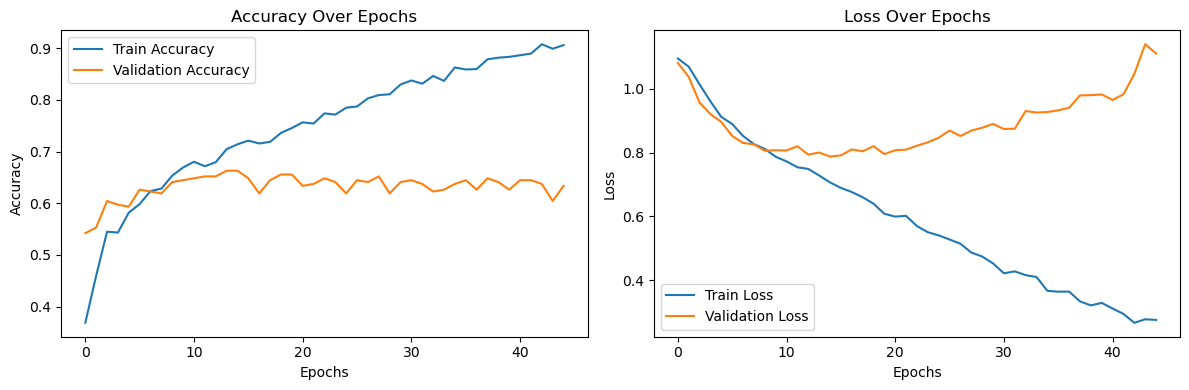

In [651]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

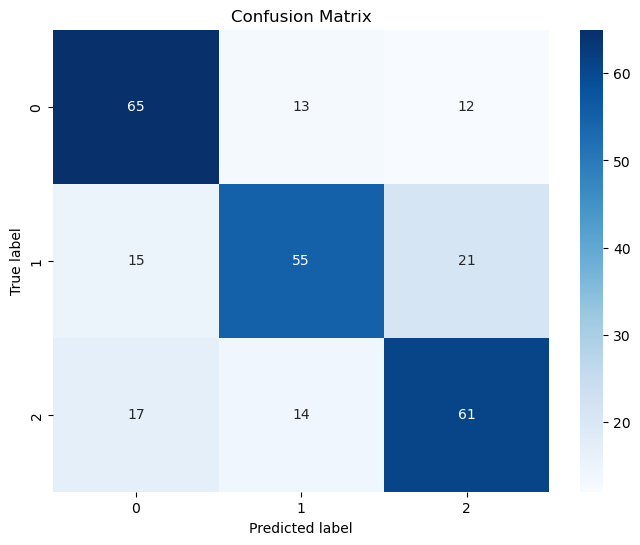

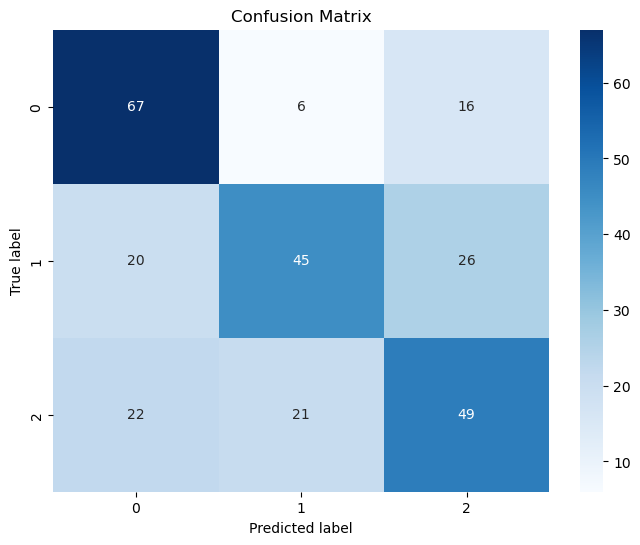

In [652]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot Confusion Matrix for Validation Data
plot_confusion_matrix(np.argmax(y_valid_encoder, axis=1), y_pred_valid, classes=class_names)

# Plot Confusion Matrix for Test Data
plot_confusion_matrix(np.argmax(y_test_encoder, axis=1), y_pred_test, classes=class_names)

## BiLSTM

In [653]:
# Verify shapes
print(f"Shape of X_train_vectors: {X_train_vectors.shape}")
print(f"Shape of X_valid_vectors: {X_valid_vectors.shape}")
print(f"Shape of X_test_vectors: {X_test_vectors.shape}")

Shape of X_train_vectors: (1270, 300)
Shape of X_valid_vectors: (273, 300)
Shape of X_test_vectors: (272, 300)


In [654]:
# Load pre-trained FastText model
model_path = 'cc.id.300.bin'
ft_model = load_facebook_model(model_path)

# Function to vectorize sentences using FastText
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Vectorize the datasets
X_train_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_train_clean])
X_valid_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_valid_clean])
X_test_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_test_clean])

# Add an additional dimension for timesteps (which is 1 in this case)
X_train_vectors = np.expand_dims(X_train_vectors, axis=1)
X_valid_vectors = np.expand_dims(X_valid_vectors, axis=1)
X_test_vectors = np.expand_dims(X_test_vectors, axis=1)

# Verify shapes
print(f"Shape of X_train_vectors: {X_train_vectors.shape}")
print(f"Shape of X_valid_vectors: {X_valid_vectors.shape}")
print(f"Shape of X_test_vectors: {X_test_vectors.shape}")

# Preprocess labels into one-hot-encoder format
y_train_encoder = to_categorical(y_train)
y_valid_encoder = to_categorical(y_valid)
y_test_encoder = to_categorical(y_test)

Shape of X_train_vectors: (1270, 1, 300)
Shape of X_valid_vectors: (273, 1, 300)
Shape of X_test_vectors: (272, 1, 300)


In [655]:
# Create BiLSTM model with FastText vectors
def create_model_bilstm_fasttext(input_dim=300, n_units_lstm=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(1, input_dim)))  
    model.add(Bidirectional(LSTM(n_units_lstm, return_sequences=False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoder.shape[1], activation='softmax')) 
    return model

# Configure defined model
model = create_model_bilstm_fasttext(input_dim=300)

# Compile model with hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Overview architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Training model
history = model.fit(X_train_vectors, y_train_encoder,
                    batch_size=32, epochs=200,
                    validation_data=(X_valid_vectors, y_valid_encoder),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_8 (Bidirectio  (None, 128)              186880    
 nal)                                                            
                                                                 
 dense_59 (Dense)            (None, 128)               16512     
                                                                 
 dropout_53 (Dropout)        (None, 128)               0         
                                                                 
 dense_60 (Dense)            (None, 64)                8256      
                                                                 
 dropout_54 (Dropout)        (None, 64)                0         
                                                                 
 dense_61 (Dense)            (None, 3)                 195       
                                                     

In [656]:
# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(X_train_vectors, y_train_encoder, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_vectors, y_valid_encoder, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_vectors, y_test_encoder, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {valid_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')



Train Accuracy: 0.7031
Validation Accuracy: 0.6337
Test Accuracy: 0.5956


In [657]:
# Predict and evaluate
y_pred_train = np.argmax(model.predict(X_train_vectors), axis=1)
y_pred_valid = np.argmax(model.predict(X_valid_vectors), axis=1)
y_pred_test = np.argmax(model.predict(X_test_vectors), axis=1)

# Classification Reports
class_names = [str(cls) for cls in np.unique(y_train)]  
print("\nTrain Classification Report:")
print(classification_report(np.argmax(y_train_encoder, axis=1), y_pred_train, target_names=class_names))

print("\nValidation Classification Report:")
print(classification_report(np.argmax(y_valid_encoder, axis=1), y_pred_valid, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(np.argmax(y_test_encoder, axis=1), y_pred_test, target_names=class_names))

9/9 [==============================] - 0s 8ms/step

Train Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       417
           1       0.70      0.69      0.70       425
           2       0.76      0.52      0.62       428

    accuracy                           0.70      1270
   macro avg       0.71      0.70      0.70      1270
weighted avg       0.71      0.70      0.69      1270


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.78      0.70        90
           1       0.57      0.65      0.61        91
           2       0.73      0.48      0.58        92

    accuracy                           0.63       273
   macro avg       0.65      0.63      0.63       273
weighted avg       0.65      0.63      0.63       273


Test Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.81     

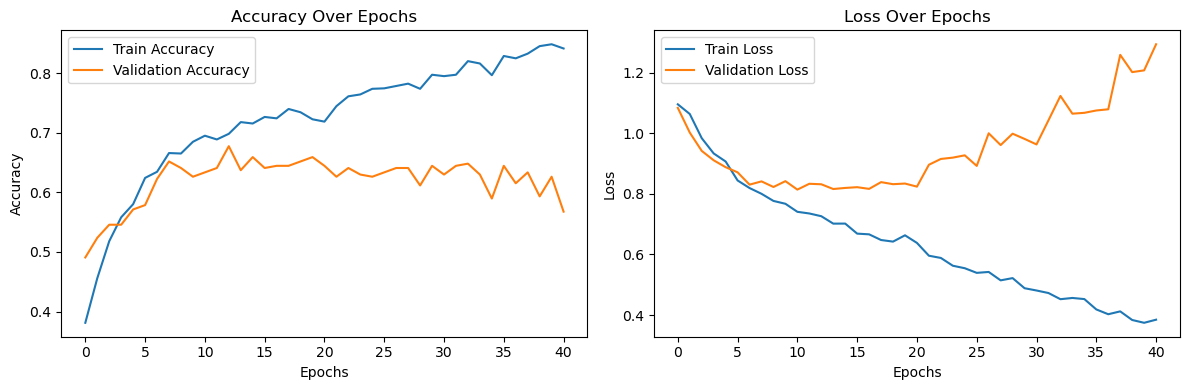

In [658]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

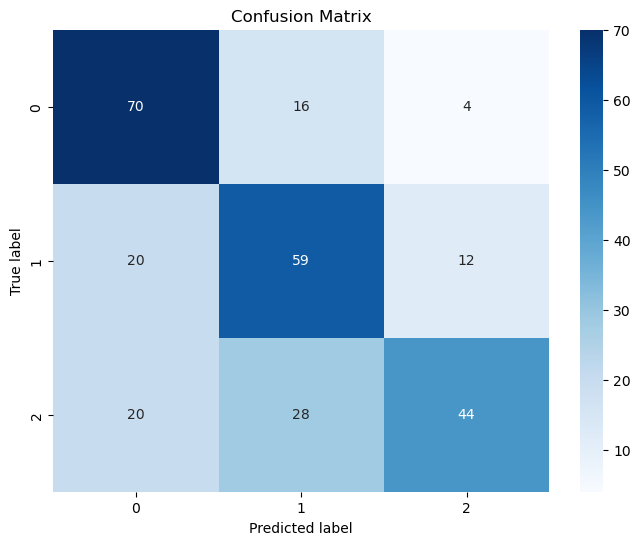

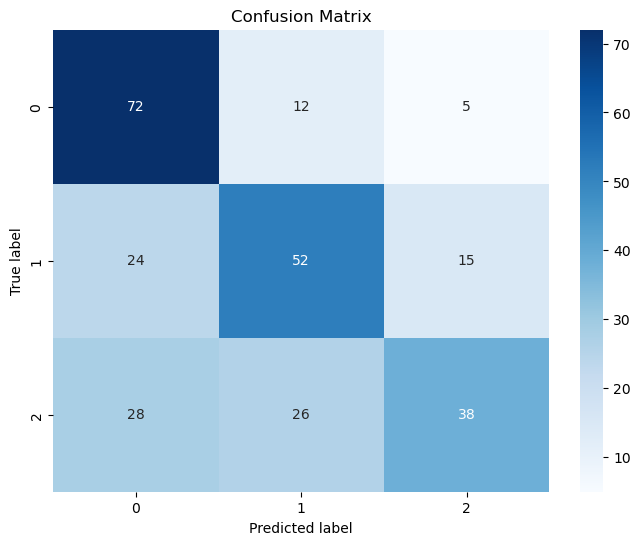

In [659]:
import seaborn as sns
# plot confusion matrix using seaborn
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot Confusion Matrix for Validation Data
plot_confusion_matrix(np.argmax(y_valid_encoder, axis=1), y_pred_valid, classes=class_names)

# Plot Confusion Matrix for Test Data
plot_confusion_matrix(np.argmax(y_test_encoder, axis=1), y_pred_test, classes=class_names)

## GRU

In [660]:
# Load pre-trained FastText model
model_path = 'cc.id.300.bin'  
ft_model = load_facebook_model(model_path)

# Function to vectorize sentences using FastText
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Vectorize the datasets
X_train_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_train_clean])
X_valid_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_valid_clean])
X_test_vectors = np.array([get_sentence_vector(text, ft_model) for text in X_test_clean])

# Add an additional dimension for timesteps (which is 1 in this case)
X_train_vectors = np.expand_dims(X_train_vectors, axis=1)
X_valid_vectors = np.expand_dims(X_valid_vectors, axis=1)
X_test_vectors = np.expand_dims(X_test_vectors, axis=1)

In [661]:
# Create GRU model with FastText vectors
def create_model_gru_fasttext(input_dim=300, n_units_gru=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(1, input_dim)))  
    model.add(Bidirectional(GRU(n_units_gru, return_sequences=False)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoder.shape[1], activation='softmax'))  
    return model

# Configure defined model
model = create_model_gru_fasttext(input_dim=300)

# Compile model with hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Overview architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Training model
history = model.fit(X_train_vectors, y_train_encoder,
                    batch_size=32, epochs=200,
                    validation_data=(X_valid_vectors, y_valid_encoder),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 128)              140544    
 nal)                                                            
                                                                 
 dense_62 (Dense)            (None, 128)               16512     
                                                                 
 dropout_55 (Dropout)        (None, 128)               0         
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dropout_56 (Dropout)        (None, 64)                0         
                                                                 
 dense_64 (Dense)            (None, 3)                 195       
                                                     

In [662]:
# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(X_train_vectors, y_train_encoder, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_vectors, y_valid_encoder, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_vectors, y_test_encoder, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {valid_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Train Accuracy: 0.7236
Validation Accuracy: 0.6484
Test Accuracy: 0.5919


In [663]:
# Predict and evaluate
y_pred_train = np.argmax(model.predict(X_train_vectors), axis=1)
y_pred_valid = np.argmax(model.predict(X_valid_vectors), axis=1)
y_pred_test = np.argmax(model.predict(X_test_vectors), axis=1)

# Classification Reports
class_names = [str(cls) for cls in np.unique(y_train)] 
print("\nTrain Classification Report:")
print(classification_report(np.argmax(y_train_encoder, axis=1), y_pred_train, target_names=class_names))

print("\nValidation Classification Report:")
print(classification_report(np.argmax(y_valid_encoder, axis=1), y_pred_valid, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(np.argmax(y_test_encoder, axis=1), y_pred_test, target_names=class_names))


9/9 [==============================] - 0s 12ms/step

Train Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       417
           1       0.82      0.59      0.69       425
           2       0.71      0.67      0.69       428

    accuracy                           0.72      1270
   macro avg       0.74      0.72      0.72      1270
weighted avg       0.74      0.72      0.72      1270


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.80      0.71        90
           1       0.67      0.48      0.56        91
           2       0.64      0.66      0.65        92

    accuracy                           0.65       273
   macro avg       0.65      0.65      0.64       273
weighted avg       0.65      0.65      0.64       273


Test Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.84    

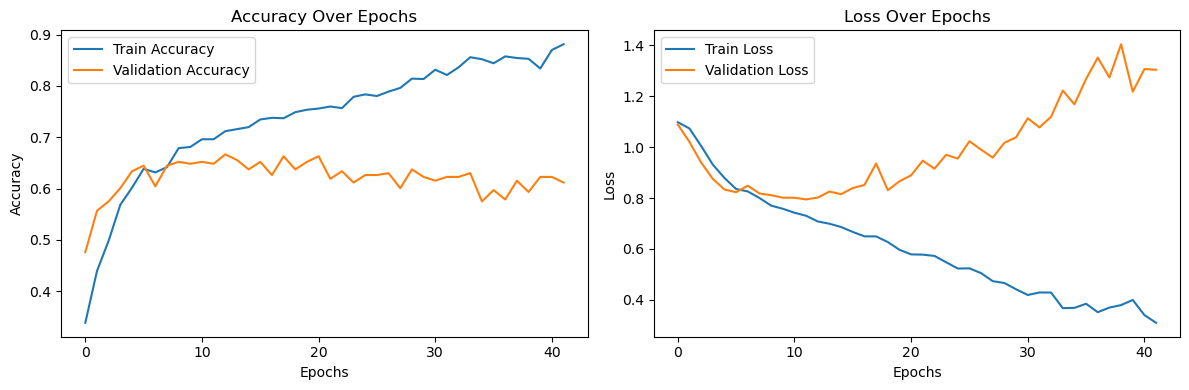

In [664]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()


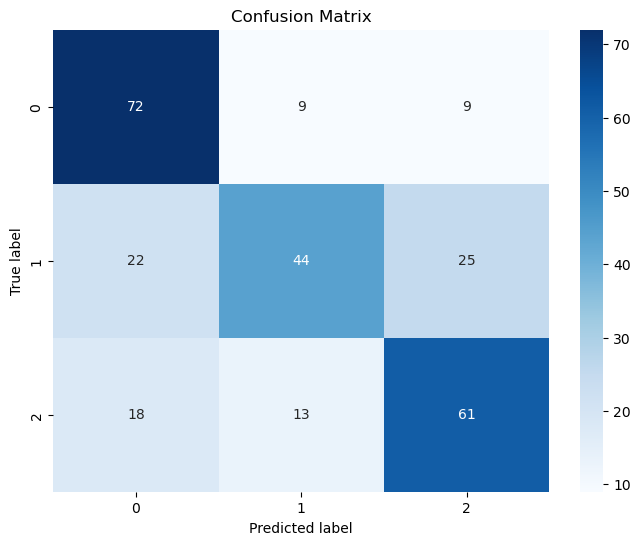

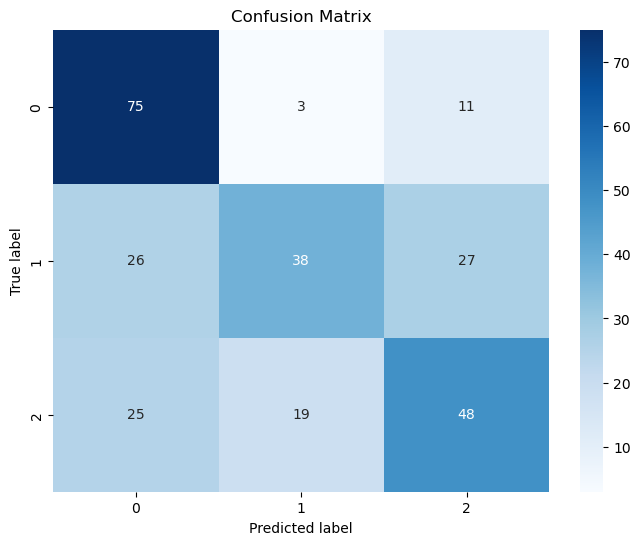

In [665]:
# plot confusion matrix using seaborn
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot Confusion Matrix for Validation Data
plot_confusion_matrix(np.argmax(y_valid_encoder, axis=1), y_pred_valid, classes=class_names)

# Plot Confusion Matrix for Test Data
plot_confusion_matrix(np.argmax(y_test_encoder, axis=1), y_pred_test, classes=class_names)

## LSTM biasa

In [666]:
# Create LSTM model with FastText vectors
def create_model_lstm_fasttext(input_dim=300, n_units_lstm=64, dropout_rate=0.3):
    model = Sequential()
    model.add(Input(shape=(1, input_dim)))  # Adjust input shape to have timesteps as 1
    model.add(LSTM(n_units_lstm, return_sequences=False))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_encoder.shape[1], activation='softmax'))  # Adjust number of classes dynamically
    return model

# Configure defined model
model = create_model_lstm_fasttext(input_dim=300)

# Compile model with hyperparameters
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Overview architecture
model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Training model
history = model.fit(X_train_vectors, y_train_encoder,
                    batch_size=32, epochs=200,
                    validation_data=(X_valid_vectors, y_valid_encoder),
                    callbacks=[early_stopping],
                    verbose=2)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 64)                93440     
                                                                 
 dense_65 (Dense)            (None, 128)               8320      
                                                                 
 dropout_57 (Dropout)        (None, 128)               0         
                                                                 
 dense_66 (Dense)            (None, 64)                8256      
                                                                 
 dropout_58 (Dropout)        (None, 64)                0         
                                                                 
 dense_67 (Dense)            (None, 3)                 195       
                                                                 
Total params: 110,211
Trainable params: 110,211
Non-t

In [667]:
# Evaluate the model on train, validation, and test data
train_loss, train_accuracy = model.evaluate(X_train_vectors, y_train_encoder, verbose=0)
valid_loss, valid_accuracy = model.evaluate(X_valid_vectors, y_valid_encoder, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_vectors, y_test_encoder, verbose=0)

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Validation Accuracy: {valid_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Train Accuracy: 0.7102
Validation Accuracy: 0.6557
Test Accuracy: 0.5882


In [668]:
# Predict and evaluate
y_pred_train = np.argmax(model.predict(X_train_vectors), axis=1)
y_pred_valid = np.argmax(model.predict(X_valid_vectors), axis=1)
y_pred_test = np.argmax(model.predict(X_test_vectors), axis=1)

# Classification Reports
class_names = [str(cls) for cls in np.unique(y_train)]  # Ensure class names are strings
print("\nTrain Classification Report:")
print(classification_report(np.argmax(y_train_encoder, axis=1), y_pred_train, target_names=class_names))

print("\nValidation Classification Report:")
print(classification_report(np.argmax(y_valid_encoder, axis=1), y_pred_valid, target_names=class_names))

print("\nTest Classification Report:")
print(classification_report(np.argmax(y_test_encoder, axis=1), y_pred_test, target_names=class_names))


9/9 [==============================] - 0s 5ms/step

Train Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77       417
           1       0.77      0.62      0.69       425
           2       0.67      0.68      0.67       428

    accuracy                           0.71      1270
   macro avg       0.71      0.71      0.71      1270
weighted avg       0.71      0.71      0.71      1270


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.70      0.68        90
           1       0.67      0.56      0.61        91
           2       0.64      0.71      0.67        92

    accuracy                           0.66       273
   macro avg       0.66      0.66      0.65       273
weighted avg       0.66      0.66      0.65       273


Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.71     

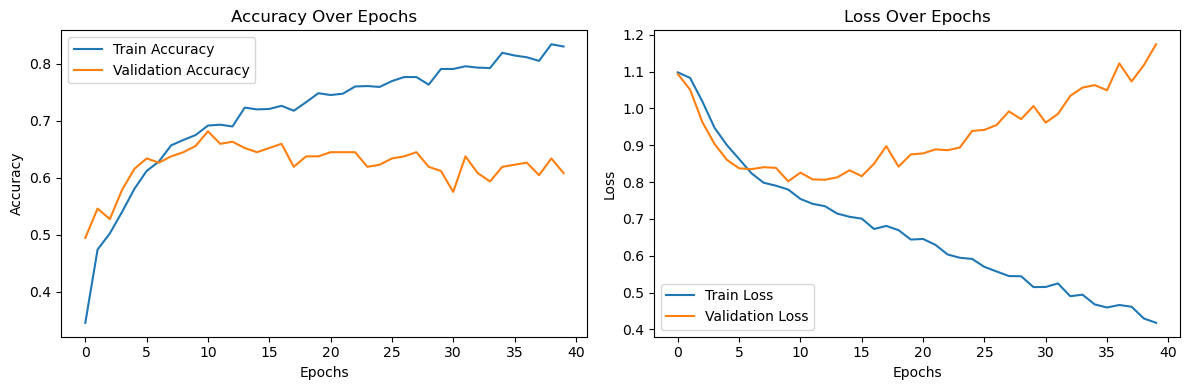

In [669]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

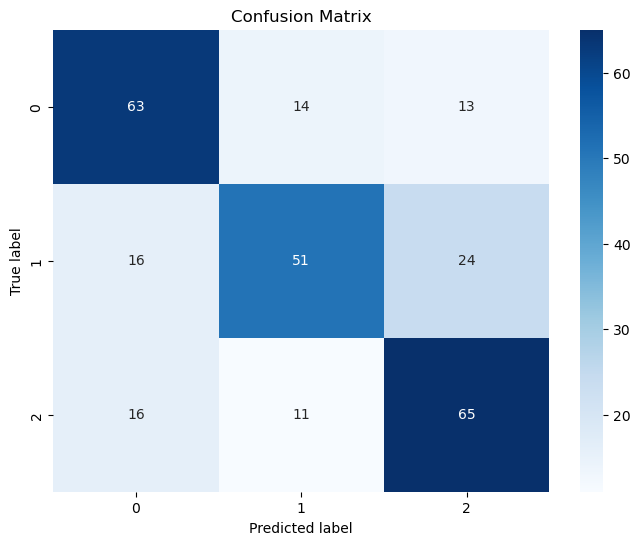

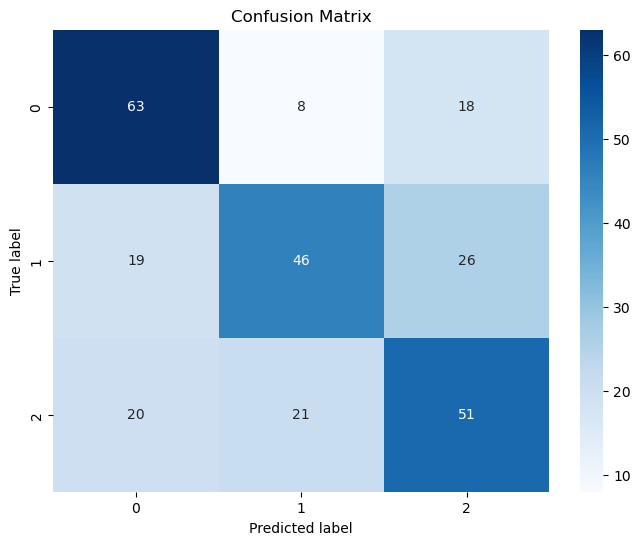

In [670]:
# function to plot confusion matrix using seaborn
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='d', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Plot Confusion Matrix for Validation Data
plot_confusion_matrix(np.argmax(y_valid_encoder, axis=1), y_pred_valid, classes=class_names)

# Plot Confusion Matrix for Test Data
plot_confusion_matrix(np.argmax(y_test_encoder, axis=1), y_pred_test, classes=class_names)

## BERT

In [671]:
# Importing libraries for data preparation and visualization
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# # Importing warnings to ignore them
# import warnings
# warnings.filterwarnings("ignore")

In [672]:
# read data dari file CSV
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [673]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [674]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, GRU, Activation, Dense, Dropout, Input, Embedding, Bidirectional , BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [675]:
from transformers import BertTokenizer
import torch
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.data import Dataset

In [676]:
X_train = X_train['tweet_non_stopwords']
X_valid = X_valid['tweet_non_stopwords']
X_test= X_test['tweet_non_stopwords']

In [677]:
y_train = torch.tensor(y_train)
y_valid = torch.tensor(y_valid)
y_test = torch.tensor(y_test)

In [678]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [679]:
max_length = 128
def tokenize_sentences(X):
    input_ids = []
    attention_masks = []

    for sent in X:
        encoded_dict = tokenizer.encode_plus(
                            sent,
                            add_special_tokens = True,
                            max_length = max_length,
                            pad_to_max_length = True,
                            return_attention_mask = True,
                            return_tensors = 'pt',
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks

In [680]:
# Tokenize training, validation, and test sets
X_train_ids, X_train_masks = tokenize_sentences(X_train)
X_valid_ids, X_valid_masks = tokenize_sentences(X_valid)
X_test_ids, X_test_masks = tokenize_sentences(X_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [681]:
# Split data into train, validation, and test sets
dataset_train = TensorDataset(X_train_ids, X_train_masks, y_train)
dataset_valid = TensorDataset(X_valid_ids, X_valid_masks, y_valid)
dataset_test = TensorDataset(X_test_ids, X_test_masks, y_test)

In [682]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [683]:
batch_size = 32
train_dataloader = DataLoader(dataset_train, sampler=torch.utils.data.RandomSampler(dataset_train), batch_size=batch_size)
val_dataloader = DataLoader(dataset_valid, sampler=torch.utils.data.SequentialSampler(dataset_valid), batch_size=batch_size)
test_dataloader = DataLoader(dataset_test, sampler=torch.utils.data.SequentialSampler(dataset_test), batch_size=batch_size)

In [684]:
# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=5e-5, eps=1e-8)
epochs = 5
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Define device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [685]:
model.train()

for epoch in range(epochs):
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2].long()}  

        model.zero_grad()

        outputs = model(**inputs)

        loss = outputs[0]
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

# Save the model
torch.save(model.state_dict(), 'bert_model_bert_nonstemm.bin')

In [686]:
# Evaluate on test data
model.eval()

y_true = []
y_pred = []

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)

    with torch.no_grad():
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1]}

        outputs = model(**inputs)
        logits = outputs.logits
        logits = logits.detach().cpu().numpy()
        label_ids = batch[2].cpu().numpy()

        y_pred.extend(logits.argmax(axis=-1))
        y_true.extend(label_ids)

# Convert predictions and true labels to text labels
label_map = {0: 'negatif', 1: 'netral', 2: 'positif'}
y_pred_text = [label_map[label] for label in y_pred]
y_true_text = [label_map[label] for label in y_true]

# Print classification report
print(classification_report(y_true_text, y_pred_text, target_names=['negatif', 'netral', 'positif']))

              precision    recall  f1-score   support

     negatif       0.51      0.81      0.62        89
      netral       0.58      0.58      0.58        91
     positif       0.71      0.29      0.42        92

    accuracy                           0.56       272
   macro avg       0.60      0.56      0.54       272
weighted avg       0.60      0.56      0.54       272



## Indobert

In [687]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import TensorDataset, DataLoader

In [688]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import TensorDataset, DataLoader

In [689]:
# read data dari file CSV
X_train = pd.read_csv('dataset/2_data_processed/X_train_stemm_cleaned.csv')
X_valid = pd.read_csv('dataset/2_data_processed/X_valid_stemm_cleaned.csv')
X_test = pd.read_csv('dataset/2_data_processed/X_test_stemm_cleaned.csv')

In [690]:
import pickle

with open('dataset/2_data_processed/y_train_encoded.pkl', 'rb') as file:
    y_train = pickle.load(file)

with open('dataset/2_data_processed/y_valid_encoded.pkl', 'rb') as file:
    y_valid = pickle.load(file)

with open('dataset/2_data_processed/y_test_encoded.pkl', 'rb') as file:
    y_test = pickle.load(file)

In [691]:
X_train = X_train['tweet_non_stopwords']
X_valid = X_valid['tweet_non_stopwords']
X_test= X_test['tweet_non_stopwords']

In [692]:
y_train = torch.tensor(y_train)
y_valid = torch.tensor(y_valid)
y_test = torch.tensor(y_test)

In [693]:
# Load the IndoBERT tokenizer
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1', do_lower_case=True)

# Tokenize sentences
max_length = 128

def tokenize_sentences(sentences, labels):
    input_ids = []
    attention_masks = []
    encoded_labels = []

    for sent, label in zip(sentences, labels):
        encoded_dict = tokenizer.encode_plus(
                            sent,
                            add_special_tokens = True,
                            max_length = max_length,
                            pad_to_max_length = True,
                            return_attention_mask = True,
                            return_tensors = 'pt',
                            truncation=True
                       )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
        encoded_labels.append(label)

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    encoded_labels = torch.tensor(encoded_labels, dtype=torch.long)

    return input_ids, attention_masks, encoded_labels

# Tokenize training, validation, and test sets
X_train_ids, X_train_masks, y_train_encoded = tokenize_sentences(X_train, y_train)
X_valid_ids, X_valid_masks, y_valid_encoded = tokenize_sentences(X_valid, y_valid)
X_test_ids, X_test_masks, y_test_encoded = tokenize_sentences(X_test, y_test)

# Create TensorDataset and DataLoader for train, validation, and test sets
batch_size = 16

train_data = TensorDataset(X_train_ids, X_train_masks, y_train_encoded)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

valid_data = TensorDataset(X_valid_ids, X_valid_masks, y_valid_encoded)
valid_loader = DataLoader(valid_data, batch_size=batch_size, shuffle=False)

test_data = TensorDataset(X_test_ids, X_test_masks, y_test_encoded)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [694]:
# Load pre-trained IndoBERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels=3)

# Define optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 2
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Function for evaluating model
def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            batch = tuple(t.to(device) for t in batch)

            inputs = {'input_ids': batch[0],
                      'attention_mask': batch[1],
                      'labels': batch[2]}  

            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            labels = inputs['labels'].cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    return all_preds, all_labels

# Training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
best_accuracy = 0.0

for epoch in range(epochs):
    model.train()
    total_loss = 0.0

    for step, batch in enumerate(train_loader):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        model.zero_grad()
        outputs = model(**inputs)
        loss = outputs[0]
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

    # Calculate average loss
    avg_train_loss = total_loss / len(train_loader)

    # Evaluate on validation data
    preds, labels = evaluate(model, valid_loader)
    val_accuracy = accuracy_score(labels, preds)

    print(f'Epoch {epoch + 1}/{epochs}')
    print(f'Training Loss: {avg_train_loss:.4f} | Validation Accuracy: {val_accuracy:.4f}')

    # Save the best model based on validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model_non_stemm.pt')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
Training Loss: 0.9346 | Validation Accuracy: 0.6337
Epoch 2/2
Training Loss: 0.6705 | Validation Accuracy: 0.6557


In [695]:
# Load the best model
model.load_state_dict(torch.load('best_model_non_stemm.pt'))

# Evaluate on test data
test_preds, test_labels = evaluate(model, test_loader)

In [696]:
# Print classification report
class_names = ['negatif', 'netral', 'positif']
print(classification_report(test_labels, test_preds, target_names=class_names))

              precision    recall  f1-score   support

     negatif       0.65      0.83      0.73        89
      netral       0.67      0.64      0.65        91
     positif       0.73      0.57      0.64        92

    accuracy                           0.68       272
   macro avg       0.68      0.68      0.67       272
weighted avg       0.68      0.68      0.67       272



In [697]:
# Optional: Save the model for future use
torch.save(model.state_dict(), 'final_model.pt')

In [698]:
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.6764705882352942


In [ ]:
# Evaluate on test data
valid_preds, valid_labels = evaluate(model, valid_loader)

In [ ]:
val_accuracy = accuracy_score(valid_labels, valid_preds)
print(f"Validation Accuracy: {val_accuracy}")

Validation Accuracy: 0.6703296703296703


In [ ]:
# Evaluate on test data
train_preds, train_labels = evaluate(model, train_loader)

In [ ]:
train_accuracy = accuracy_score(train_labels, train_preds)
print(f"train Accuracy: {train_accuracy}")

train Accuracy: 0.974015748031496
